# Load tools

In [1]:
import sys
sys.executable

'/Users/patrickmurphy/mambaforge/envs/jupyterenv/bin/python'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pydot
import gseapy
import networkx as nx
import glob
import os
from scipy.stats import zscore
from plotnine import ggplot, aes, geom_tile, scale_fill_gradientn
from gseapy import biomart
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF

# Load m2h and h2m human to mouse dictionaries

In [3]:
h2m_ENSEMBL = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/294_Data_Analysis_TardbpRenewal/h2m_ENSEMBL.txt", sep='\t', index_col=0)
m2h_ENSEMBL = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/294_Data_Analysis_TardbpRenewal/m2h_ENSEMBL.txt", sep='\t', index_col=0)


In [33]:
m2h_ENSEMBL

HumanGeneName         MouseGeneID      HumanGeneID
MouseGeneName                                                   
0610005C13Rik           NaN  ENSMUSG00000109644              NaN
0610006L08Rik           NaN  ENSMUSG00000108652              NaN
0610009E02Rik           NaN  ENSMUSG00000086714              NaN
0610009L18Rik           NaN  ENSMUSG00000043644              NaN
0610010K14Rik      C17orf49  ENSMUSG00000020831  ENSG00000258315
...                     ...                 ...              ...
NaN                     NaN  ENSMUSG00000121829              NaN
NaN                     NaN  ENSMUSG00000121821              NaN
NaN                     NaN  ENSMUSG00000121862              NaN
NaN                     NaN  ENSMUSG00000121869              NaN
NaN                     NaN  ENSMUSG00000121915              NaN

[63073 rows x 3 columns]

In [35]:
# Create a mapping dictionary
m2h_dict = m2h_ENSEMBL["HumanGeneName"].to_dict()
h2m_dict = h2m_ENSEMBL["MouseGeneName"].to_dict()


# Load DESeq2 results

In [4]:
# Specify the path to the directory
path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/*res*txt'

# Use glob to get all the .res files from the directory
files = glob.glob(path)

# Print the files to check if they are being detected
print("Detected Files:", files)

# Initialize an empty string to store the formatted text
formatted_text = ""

# Iterate over each file path
for file in files:
    # Extract the filename without extension to use as variable name
    var_name = os.path.splitext(os.path.basename(file))[0]
    # Format the text
    text = f"{var_name} = pd.read_csv(\"{file}\", sep=\" \")\n"
    # Append to the formatted_text
    formatted_text += text

# Now, formatted_text contains the formatted text for all files
# You can print it to the console
print(formatted_text)

Detected Files: ['/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/MusJCI_EC_KO_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Lig_WTvKO_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_TNF_KIvWT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHBEC_SI_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt', '/Users/patrickmurphy/Documents/UCONN/4_

In [67]:
InVitroMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt", sep=" ")
InVitroMsBrEC_K0_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_K0_v_WT_res.txt", sep=" ")
InVivoMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt", sep=" ")
InVivoMsBrEC_KO_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_res.txt", sep=" ")
InVitroHuBrEC_Inner_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_Inner_siTDP43vWT_res.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_outer_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_outer_res.txt", sep=" ")
InVitroHuBrEC_TNF_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_TNF_siTDP43vWT_res.txt", sep=" ")
InVitroHuHUVEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHUVEC_SI_v_WT_res.txt", sep=" ")
InVivoNuclei_Clust1v3_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/Capillary_c1v3.csv")

In [68]:
#Invert sign of carotid data (they are run with WT v KO)

# Columns to invert
columns_to_invert = ['log2FoldChange', 'stat']  # Add other column names as needed

# Inverting the sign
InvivoCarotid_Lig_WTvKO_res[columns_to_invert] = InvivoCarotid_Lig_WTvKO_res[columns_to_invert] * -1
InvivoCarotid_Contra_WTvKO_res[columns_to_invert] = InvivoCarotid_Contra_WTvKO_res[columns_to_invert] * -1

# Convert DEseq2 results from mouse to human (_res_HsGeneID)

In [69]:
InVitroMsBrEC_KI_v_WT_res

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
X0610005C13Rik     3.179151        0.813513  0.596352  1.364149  0.172521   
X0610006L08Rik     0.317445        0.774325  2.147881  0.360506  0.718468   
X0610009B22Rik   921.291126       -0.038530  0.166296 -0.231694  0.816776   
X0610009E02Rik    34.786652       -0.590343  0.770232 -0.766448  0.443410   
X0610009L18Rik    41.353547       -0.241785  0.340506 -0.710076  0.477657   
...                     ...             ...       ...       ...       ...   
Zyg11a             0.158409       -0.991949  3.059679 -0.324200  0.745786   
Zyg11b          1220.481218       -0.013288  0.154834 -0.085824  0.931606   
Zyx             9752.166948       -0.045955  0.149852 -0.306673  0.759092   
Zzef1           3270.052145        0.149254  0.123193  1.211542  0.225688   
Zzz3            1555.877175        0.053970  0.135174  0.399260  0.689702   

                    padj  
X0610005C13Rik  0.999194  
X0610006L08Rik  0.999194  
X0610009B22Rik  0.999194  
X0610009E02Rik  0.999194  
X0610009L18Rik  0.999194  
...                  ...  
Zyg11a          0.999194  
Zyg11b          0.999194  
Zyx             0.999194  
Zzef1           0.999194  
Zzz3            0.999194  

[48137 rows x 6 columns]

In [70]:
# Create a dictionary where keys are names and values are dataframes
dfs_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InvivoCarotid_Contra_WTvKO_res': InvivoCarotid_Contra_WTvKO_res,
    'InVitroMsBrEC_Inner_KIvWT_res': InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroMsBrEC_K0_v_WT_res': InVitroMsBrEC_K0_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res': InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res': InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res': InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res': InVivoMsBrEC_GrnKI_v_WT_res,
#    'Fak_Null_ECs_res' : Fak_Null_ECs_res
}

def transform_dataframe(df, m2h_ENSEMBL):
    df = df.reset_index()
    df.columns = ['GeneID', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj']
    
    # Ensure the index of m2h_ENSEMBL is unique by dropping duplicates
    m2h_ENSEMBL_unique = m2h_ENSEMBL[~m2h_ENSEMBL.index.duplicated(keep='first')]
    
    # Map mouse gene names to human gene names using the index and first column of m2h_ENSEMBL
    df['Human_GeneID'] = df['GeneID'].map(m2h_ENSEMBL_unique.iloc[:, 0])  # Using the first column for mapping
    
    # Set 'Human_GeneID' as the index and select only the 'Value' column
    df.set_index('Human_GeneID', inplace=True)
    transformed_df = df[['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj']]
    
    return transformed_df

# Apply the function to every dataframe in the dictionary
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, m2h_ENSEMBL)
    new_var_name = f"{df_name}_HsGeneID"
    globals()[new_var_name] = transformed_df

In [71]:
InVivoMsBrEC_KO_v_WT_res_HsGeneID

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Human_GeneID                                                              
GNAI3         5654.457481        0.044754  0.278951  0.160437  0.872537   
NaN              0.000000             NaN       NaN       NaN       NaN   
CDC45           84.898836        0.363681  1.570223  0.231611  0.816840   
NaN              0.000000             NaN       NaN       NaN       NaN   
SCML2            5.020636        6.091878  3.009857  2.023976  0.042973   
...                   ...             ...       ...       ...       ...   
NaN              0.000000             NaN       NaN       NaN       NaN   
NaN              0.000000             NaN       NaN       NaN       NaN   
NaN              0.000000             NaN       NaN       NaN       NaN   
NaN              4.868740        0.002801  0.973909  0.002876  0.997705   
NaN            128.164892       -1.179081  2.004702 -0.588158  0.556426   

                  padj  
Human_GeneID            
GNAI3         0.999272  
NaN                NaN  
CDC45         0.999272  
NaN                NaN  
SCML2         0.864587  
...                ...  
NaN                NaN  
NaN                NaN  
NaN                NaN  
NaN           0.999306  
NaN           0.999272  

[48440 rows x 6 columns]

# Convert DESeq2 human to mouse

In [72]:
h2m_ENSEMBL

MouseGeneName         MouseGeneID      HumanGeneID
HumanGeneName                                                   
MT-TF                   NaN                 NaN  ENSG00000210049
MT-RNR1                 NaN                 NaN  ENSG00000211459
MT-TV                   NaN                 NaN  ENSG00000210077
MT-RNR2                 NaN                 NaN  ENSG00000210082
MT-TL1                  NaN                 NaN  ENSG00000209082
...                     ...                 ...              ...
LINC01705               NaN                 NaN  ENSG00000232679
RNU6-403P           Gm22883  ENSMUSG00000088001  ENSG00000200033
LINC02474               NaN                 NaN  ENSG00000228437
LYST-AS1                NaN                 NaN  ENSG00000229463
LINC02768               NaN                 NaN  ENSG00000229291

[77647 rows x 3 columns]

In [73]:
def transform_dataframe(df, h2m_ENSEMBL):
    """
    Transforms a DataFrame by adding a new 'HumanGeneName' column, mapping it to the 'MouseGeneName'
    from the h2m_ENSEMBL DataFrame, handling duplicates based on 'baseMean' from df, and then setting 
    'MouseGeneName' as the new index.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame with human gene names as index and 'baseMean' column.
        h2m_ENSEMBL (pd.DataFrame): Mapping table with 'HumanGeneName' as the index and 'MouseGeneName' as a column.
    
    Returns:
        pd.DataFrame: Transformed DataFrame with 'MouseGeneName' as the index.
    """
    # Step 1: Copy the human gene names (index) to a new column called 'HumanGeneName'
    df['HumanGeneName'] = df.index
    
    # Step 2: Clean the mapping table (h2m_ENSEMBL)
    h2m_clean = h2m_ENSEMBL[['MouseGeneName']].dropna().copy()
    h2m_clean.index = h2m_clean.index.str.strip().str.upper()  # Clean HumanGeneName index
    
    # Step 3: Remove duplicate HumanGeneName from df, keeping the one with the highest baseMean
    # Group by HumanGeneName and keep the row with the highest baseMean
    df_sorted = df.sort_values('baseMean', ascending=False)  # Sort by baseMean in descending order
    df_unique = df_sorted.drop_duplicates('HumanGeneName', keep='first')  # Keep the first (highest baseMean)
    
    # Step 4: Clean the input DataFrame index (human gene names)
    df_unique['HumanGeneName'] = df_unique['HumanGeneName'].str.strip().str.upper()  # Clean human gene names
    
    # Step 5: Map 'HumanGeneName' to 'MouseGeneName' from h2m_ENSEMBL
    df_unique['MouseGeneName'] = df_unique['HumanGeneName'].map(dict(zip(h2m_clean.index, h2m_clean['MouseGeneName'])))
    
    # Step 6: Drop rows where MouseGeneName is NaN (no match)
    df_unique = df_unique.dropna(subset=['MouseGeneName'])
    
    # Step 7: Set 'MouseGeneName' as the new index
    df_unique.set_index('MouseGeneName', inplace=True)
    
    # Optional: Drop the 'HumanGeneName' column if no longer needed
    df_unique.drop(columns=['HumanGeneName'], inplace=True)
    
    return df_unique


In [74]:
dfs_dict = {
    'InVitroHuBrEC_Inner_siTDP43vWT_res': InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res': InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res': InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_res': InVitroHuBrEC_SI_v_WT_res,
    'InVitroHuHUVEC_SI_v_WT_res': InVitroHuHUVEC_SI_v_WT_res
}

# Initialize an empty dictionary for storing the mapped DataFrames
dfs_dict_mapped = {}

# Loop through the original dictionary and transform each DataFrame
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, h2m_ENSEMBL)
    # Add the transformed DataFrame to the new dictionary
    dfs_dict_mapped[f"{df_name}_MusGeneName"] = transformed_df
    # Create a global variable with the transformed DataFrame
    globals()[f"{df_name}_MusGeneName"] = transformed_df
    # Print the progress
    print(f"Transformed {df_name} -> {df_name}_MusGeneName with {len(transformed_df)} rows")

Transformed InVitroHuBrEC_Inner_siTDP43vWT_res -> InVitroHuBrEC_Inner_siTDP43vWT_res_MusGeneName with 17525 rows
Transformed InVitroHuBrEC_SI_v_WT_outer_res -> InVitroHuBrEC_SI_v_WT_outer_res_MusGeneName with 17525 rows
Transformed InVitroHuBrEC_TNF_siTDP43vWT_res -> InVitroHuBrEC_TNF_siTDP43vWT_res_MusGeneName with 17525 rows
Transformed InVitroHuBrEC_SI_v_WT_res -> InVitroHuBrEC_SI_v_WT_res_MusGeneName with 17525 rows
Transformed InVitroHuHUVEC_SI_v_WT_res -> InVitroHuHUVEC_SI_v_WT_res_MusGeneName with 17525 rows


In [75]:
InVitroHuHUVEC_SI_v_WT_res_MusGeneName

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
MouseGeneName                                                                
Serpine1       330167.256609        0.312665  0.586684  0.532935  0.594078   
Actb           313554.423498       -0.143892  0.279548 -0.514730  0.606741   
Fth1           184901.269204       -0.041027  0.399893 -0.102595  0.918285   
Mmp1b          168641.732815        0.066082  0.508426  0.129974  0.896587   
Thbs1          168170.166430       -0.202031  0.407271 -0.496060  0.619852   
...                      ...             ...       ...       ...       ...   
5430401F13Rik       0.000000             NaN       NaN       NaN       NaN   
Lrit2               0.000000             NaN       NaN       NaN       NaN   
Lrrc18              0.000000             NaN       NaN       NaN       NaN   
Lrrc14b             0.000000             NaN       NaN       NaN       NaN   
Lrrc10              0.000000             NaN       NaN       NaN       NaN   

                   padj  
MouseGeneName            
Serpine1       0.998009  
Actb           0.998009  
Fth1           0.998009  
Mmp1b          0.998009  
Thbs1          0.998009  
...                 ...  
5430401F13Rik       NaN  
Lrit2               NaN  
Lrrc18              NaN  
Lrrc14b             NaN  
Lrrc10              NaN  

[17525 rows x 6 columns]

# Convert mouse to human IDs

In [76]:
def transform_dataframe(df, m2h_ENSEMBL):
    """
    Transforms a DataFrame by adding a new 'MouseGeneName' column, mapping it to the 'HumanGeneName'
    from the m2h_ENSEMBL DataFrame, handling duplicates based on 'baseMean' from df, and then setting 
    'HumanGeneName' as the new index.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame with mouse gene names as index and 'baseMean' column.
        m2h_ENSEMBL (pd.DataFrame): Mapping table with 'MouseGeneName' as the index and 'HumanGeneName' as a column.
    
    Returns:
        pd.DataFrame: Transformed DataFrame with 'HumanGeneName' as the index.
    """
    # Step 1: Copy the mouse gene names (index) to a new column called 'MouseGeneName'
    df['MouseGeneName'] = df.index
    
    # Step 2: Clean the mapping table (m2h_ENSEMBL)
    m2h_clean = m2h_ENSEMBL[['HumanGeneName']].dropna().copy()
    m2h_clean.index = m2h_clean.index.str.strip().str.upper()  # Clean MouseGeneName index
    
    # Step 3: Remove duplicate MouseGeneName from df, keeping the one with the highest baseMean
    # Group by MouseGeneName and keep the row with the highest baseMean
    df_sorted = df.sort_values('baseMean', ascending=False)  # Sort by baseMean in descending order
    df_unique = df_sorted.drop_duplicates('MouseGeneName', keep='first')  # Keep the first (highest baseMean)
    
    # Step 4: Clean the input DataFrame index (mouse gene names)
    df_unique['MouseGeneName'] = df_unique['MouseGeneName'].str.strip().str.upper()  # Clean mouse gene names
    
    # Step 5: Map 'MouseGeneName' to 'HumanGeneName' from m2h_ENSEMBL
    df_unique['HumanGeneName'] = df_unique['MouseGeneName'].map(dict(zip(m2h_clean.index, m2h_clean['HumanGeneName'])))
    
    # Step 6: Drop rows where HumanGeneName is NaN (no match)
    df_unique = df_unique.dropna(subset=['HumanGeneName'])
    
    # Step 7: Set 'HumanGeneName' as the new index
    df_unique.set_index('HumanGeneName', inplace=True)
    
    # Optional: Drop the 'MouseGeneName' column if no longer needed
    df_unique.drop(columns=['MouseGeneName'], inplace=True)
    
    return df_unique


In [77]:
# Initialize an empty dictionary for storing the mapped DataFrames
dfs_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KI_v_WT_res': InVivoMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InVivoMsBrEC_KO_v_WT_res': InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res': InVivoMsBrEC_GrnKI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res': InvivoCarotid_Contra_WTvKO_res,
    'InVitroMsBrEC_Inner_KIvWT_res': InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroMsBrEC_K0_v_WT_res': InVitroMsBrEC_K0_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res': InVitroMsBrEC_Outer_KIvWT_res
}

# Loop through the original dictionary and transform each DataFrame
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, m2h_ENSEMBL)
    # Add the transformed DataFrame to the new dictionary
    dfs_dict_mapped[f"{df_name}_HumanGeneName"] = transformed_df
    # Create a global variable with the transformed DataFrame
    globals()[f"{df_name}_HumanGeneName"] = transformed_df
    # Print the progress
    print(f"Transformed {df_name} -> {df_name}_HumanGeneName with {len(transformed_df)} rows")

Transformed InVitroMsBrEC_KI_v_WT_res -> InVitroMsBrEC_KI_v_WT_res_HumanGeneName with 17869 rows
Transformed InVivoMsBrEC_KI_v_WT_res -> InVivoMsBrEC_KI_v_WT_res_HumanGeneName with 17869 rows
Transformed InvivoCarotid_Lig_WTvKO_res -> InvivoCarotid_Lig_WTvKO_res_HumanGeneName with 15413 rows
Transformed InVitroMsBrEC_TNF_KIvWT_res -> InVitroMsBrEC_TNF_KIvWT_res_HumanGeneName with 17869 rows
Transformed InVivoMsBrEC_KO_v_WT_res -> InVivoMsBrEC_KO_v_WT_res_HumanGeneName with 17869 rows
Transformed InVivoMsBrEC_GrnKI_v_WT_res -> InVivoMsBrEC_GrnKI_v_WT_res_HumanGeneName with 17869 rows
Transformed InvivoCarotid_Contra_WTvKO_res -> InvivoCarotid_Contra_WTvKO_res_HumanGeneName with 15413 rows
Transformed InVitroMsBrEC_Inner_KIvWT_res -> InVitroMsBrEC_Inner_KIvWT_res_HumanGeneName with 17869 rows
Transformed InVitroMsBrEC_K0_v_WT_res -> InVitroMsBrEC_K0_v_WT_res_HumanGeneName with 17869 rows
Transformed InVitroMsBrEC_Outer_KIvWT_res -> InVitroMsBrEC_Outer_KIvWT_res_HumanGeneName with 17869 r

# Volcano plots DESeq2 

In [78]:
InVivoMsBrEC_KO_v_WT_res

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gnai3           5654.457481        0.044754  0.278951  0.160437  0.872537   
Pbsn               0.000000             NaN       NaN       NaN       NaN   
Cdc45             84.898836        0.363681  1.570223  0.231611  0.816840   
H19                0.000000             NaN       NaN       NaN       NaN   
Scml2              5.020636        6.091878  3.009857  2.023976  0.042973   
...                     ...             ...       ...       ...       ...   
Gm45870            0.000000             NaN       NaN       NaN       NaN   
Gm9689             0.000000             NaN       NaN       NaN       NaN   
Gm17999            0.000000             NaN       NaN       NaN       NaN   
Gm45736            4.868740        0.002801  0.973909  0.002876  0.997705   
X1700012D14Rik   128.164892       -1.179081  2.004702 -0.588158  0.556426   

                    padj   MouseGeneName  
Gnai3           0.999272           Gnai3  
Pbsn                 NaN            Pbsn  
Cdc45           0.999272           Cdc45  
H19                  NaN             H19  
Scml2           0.864587           Scml2  
...                  ...             ...  
Gm45870              NaN         Gm45870  
Gm9689               NaN          Gm9689  
Gm17999              NaN         Gm17999  
Gm45736         0.999306         Gm45736  
X1700012D14Rik  0.999272  X1700012D14Rik  

[48440 rows x 7 columns]

## Run based on pvalue (not padj)

In [79]:
df1 = InVivoMsBrEC_KO_v_WT_res
df2 = InVivoMsBrEC_KI_v_WT_res
df3 = InVitroHuBrEC_SI_v_WT_res_MusGeneName

def find_shared_human_mus_downregulated_genes(df1, df2, df3, log2fc_threshold=-1, padj_threshold=0.05):
    global shared_genes_down_human_KI, shared_genes_down_human, shared_genes_down_KI
    
    """
    Find significantly downregulated genes shared between three DESeq2 result DataFrames.

    Parameters:
        df1, df2, df3 (pd.DataFrame): DESeq2 result DataFrames for each condition.
        log2fc_threshold (float): Threshold for log2FoldChange to define downregulation.
        padj_threshold (float): Threshold for adjusted p-value to define significance.

    Returns:
        shared_genes_down_human_KI (set): Set of downregulated genes shared between all three DataFrames.
        shared_genes_down_human (set): Set of downregulated genes shared between df1 and df2.
        shared_genes_down_KI (set): Set of downregulated genes shared between df1 and df3.
    """
    # Filter downregulated genes in each DataFrame
    df1_down = df1[(df1["log2FoldChange"] < log2fc_threshold) & (df1["pvalue"] < padj_threshold)]
    df2_down = df2[(df2["log2FoldChange"] < 0)]# & (df2["padj"] < padj_threshold)]
    df3_down = df3[(df3["log2FoldChange"] < 0)]# & (df3["padj"] < padj_threshold)]
    
    # Extract gene names (assuming the index contains gene IDs)
    genes_df1_down = set(df1_down.index)
    genes_df2_down = set(df2_down.index)
    genes_df3_down = set(df3_down.index)

    # Find overlapping downregulated genes
    shared_genes_down_human_KI = genes_df1_down.intersection(genes_df2_down).intersection(genes_df3_down)
    shared_genes_down_human = genes_df1_down.intersection(genes_df2_down)
    shared_genes_down_KI = genes_df1_down.intersection(genes_df3_down)

def find_shared_human_mus_upregulated_genes(df1, df2, df3, log2fc_threshold=1, padj_threshold=0.05):
    global shared_genes_up_human_KI, shared_genes_up_human, shared_genes_up_KI
    """
    Find significantly upregulated genes shared between three DESeq2 result DataFrames.

    Parameters:
        df1, df2, df3 (pd.DataFrame): DESeq2 result DataFrames for each condition.
        log2fc_threshold (float): Threshold for log2FoldChange to define upregulation.
        padj_threshold (float): Threshold for adjusted p-value to define significance.

    Returns:
        shared_genes_up (set): Set of upregulated genes shared between all three DataFrames.
    """
    # Filter upregulated genes in each DataFrame
    df1_up = df1[(df1["log2FoldChange"] > log2fc_threshold) & (df1["pvalue"] < padj_threshold)]
    df2_up = df2[(df2["log2FoldChange"] > 0)]# & (df2["padj"] < padj_threshold)]
    df3_up = df3[(df3["log2FoldChange"] > 0)]# & (df3["padj"] < padj_threshold)]
    
    # Extract gene names (assuming the index contains gene IDs)
    genes_df1_up = set(df1_up.index)
    genes_df2_up = set(df2_up.index)
    genes_df3_up = set(df3_up.index)

    # Find overlapping upregulated genes
    shared_genes_up_human_KI = genes_df1_up.intersection(genes_df2_up).intersection(genes_df3_up)
    shared_genes_up_human = genes_df1_up.intersection(genes_df2_up)
    shared_genes_up_KI = genes_df1_up.intersection(genes_df3_up)



In [80]:
# Running the function for downregulated genes
find_shared_human_mus_downregulated_genes(
    df1=InVivoMsBrEC_KO_v_WT_res,
    df2=InVivoMsBrEC_KI_v_WT_res,
    df3=InVitroHuBrEC_SI_v_WT_res_MusGeneName,
    log2fc_threshold=-1,  # Optional, can be adjusted
    padj_threshold=0.05   # Optional, can be adjusted
)

# Access the global variables
print(f"Shared downregulated genes (Human_KI): {shared_genes_down_human_KI}")
print(f"Shared downregulated genes (Human): {shared_genes_down_human}")
print(f"Shared downregulated genes (KI): {shared_genes_down_KI}")


Shared downregulated genes (Human_KI): {'Map3k6', 'Dnase1', 'Zfp28', 'Nemp1', 'Syt7', 'Plekha4', 'Prkar2b', 'Afap1l2', 'Traf3ip2', 'Wnt11', 'Zkscan1', 'Scrn2', 'Ctc1', 'Rfc1', 'Prrt2', 'Ttc5', 'Degs2', 'Araf', 'Fam124a', 'Eea1', 'Stra6', 'Bricd5', 'Eps8l2', 'Nbn', 'Sfi1', 'Osbpl5', 'Nrbp2', 'Vsig2', 'Abcc6', 'Gng7', 'Mlph', 'Brd9', 'Slc25a35', 'St6gal1', 'Gdpd3'}
Shared downregulated genes (Human): {'Rpl18.ps1', 'Gm4835', 'Gm16066', 'Trpc2', 'Gm38316', 'Gm26885', 'Zfp28', 'Gm42639', 'H3f3a.ps1', 'Plekha4', 'Gm12933', 'Pbp2', 'Gm38387', 'Hsp25.ps1', 'Gm14044', 'Gm13498', 'Nog', 'Gm13216', 'Mt2', 'Prrt2', 'Gm43518', 'Gm45552', 'Oas1b', 'Fam124a', 'X6330409D20Rik', 'Agr2', 'Gm5898', 'Twist1', 'Gm44899', 'X4930599N23Rik', 'Ccdc62', 'B230206H07Rik', 'Gm5937', 'X2900076A07Rik', 'Gm10766', 'Gm10247', 'Gm4468', 'Pcdh9', 'Vma21.ps', 'Ptger3', 'Gm15528', 'Slc25a35', 'Stard10', 'Moxd1', 'Gm12331', 'Gpr17', 'Gm11400', 'Pdlim3', 'Gm5406', 'Gm3203', 'Gm5855', 'Gm10718', 'Fbxo27', 'Traf3ip2', 'Gm9905

In [81]:
# Running the function for downregulated genes
find_shared_human_mus_upregulated_genes(
    df1=InVivoMsBrEC_KO_v_WT_res,
    df2=InVivoMsBrEC_KI_v_WT_res,
    df3=InVitroHuBrEC_SI_v_WT_res_MusGeneName,
    log2fc_threshold=1,  # Optional, can be adjusted
    padj_threshold=0.05   # Optional, can be adjusted
)

# Access the global variables
print(f"Shared upregulated genes (Human_KI): {shared_genes_up_human_KI}")
print(f"Shared upregulated genes (Human): {shared_genes_up_human}")
print(f"Shared upregulated genes (KI): {shared_genes_up_KI}")


Shared upregulated genes (Human_KI): {'Fscn1', 'Fam228a', 'Tube1', 'Nuf2', 'F2r', 'Pde3a', 'Rpusd2', 'Rims3', 'Apoa1', 'Tpx2', 'Cers6', 'Brca1', 'Mfsd9', 'Map1b', 'Slc16a5', 'Zic2', 'Pycr1', 'Adm', 'Adamts6', 'Tmem61', 'Sptbn2', 'Tab1', 'Cenpm', 'Phlda3', 'Hcar1', 'Cmtm3', 'Clspn', 'Lig3', 'Tpbgl', 'Zfp282', 'P2ry2', 'Parpbp', 'Dnph1', 'Racgap1', 'Thumpd1', 'Cxcr4', 'Ankle1', 'Ccna2', 'Sprn', 'Gosr1', 'Gas2l3', 'Atic', 'Plk4', 'Nrgn', 'Apln', 'Ube2c', 'Ckap2l', 'Bub1b', 'Knl1', 'Dapk2', 'Ado', 'Pclaf', 'Cenpw', 'Cenpf', 'Msmp', 'Birc5', 'Dpf1', 'Phf11c'}
Shared upregulated genes (Human): {'Kdm6a', 'AA467197', 'Prnd', 'Gm26901', 'Gpr82', 'Gm13840', 'Fam228a', 'Nuf2', 'Fgfbp1', 'Rims3', 'Gm17122', 'Cers6', 'Golga3', 'Mfsd9', 'Slc16a5', 'Rnu3b4.1', 'Grin2d', 'Pycr1', 'Adm', 'Caln1', 'Gm16759', 'Tab1', 'Gm12191', 'Lrrcc1', 'Cmtm3', 'Gm11839', 'Tpbgl', 'P2ry2', 'Gm20878', 'Adgrl3', 'Rnf183', 'Ccna2', 'Icosl', 'Sprn', 'Gosr1', 'Ifi204', 'Gm37946', 'Rgs11', 'Stab1', 'Ckap2l', 'Bub1b', 'Vsig8'

In [82]:
def plot_volcano(df, 
                 df_in_vivo, 
                 df_in_vitro, 
                 baseMean_threshold=10, 
                 log2fc_threshold=1, 
                 padj_threshold=0.05, 
                 title="Volcano Plot", 
                 save_path=None):
    # Filter the DataFrame based on the provided thresholds
    df_filtered = df.dropna(subset=["log2FoldChange", "pvalue"])
    df_filtered = df_filtered[df_filtered["baseMean"] >= baseMean_threshold]
    df_filtered["-log10(pvalue)"] = -np.log10(df_filtered["pvalue"])

    # Apply significance criteria
    df_filtered["significant"] = (abs(df_filtered["log2FoldChange"]) > log2fc_threshold) & (df_filtered["pvalue"] < padj_threshold)

    # Define red, pink, and purple gene sets
    red_genes = shared_genes_up_human_KI.union(shared_genes_down_human_KI)
    pink_genes = shared_genes_up_KI.union(shared_genes_down_KI)
    purple_genes = shared_genes_up_human.union(shared_genes_down_human)

    # Assign colors based on the predefined lists
    df_filtered["color"] = df_filtered.apply(color_points, axis=1, 
                                              red_genes=red_genes, 
                                              pink_genes=pink_genes, 
                                              purple_genes=purple_genes)

    # Create the plot
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_filtered, 
                    x="log2FoldChange", 
                    y="-log10(pvalue)", 
                    hue="color", 
                    palette={'red': 'red', 'pink': 'pink', 'purple': 'purple', 'grey': 'grey'},
                    alpha=0.7)

    # Add threshold lines
    plt.axhline(-np.log10(padj_threshold), color="blue", linestyle="--", linewidth=1)
    plt.axvline(-log2fc_threshold, color="blue", linestyle="--", linewidth=1)
    plt.axvline(log2fc_threshold, color="blue", linestyle="--", linewidth=1)

    # Define excluded region with both old and new criteria
    excluded_region = ((abs(df_filtered["log2FoldChange"]) <= 2) & (df_filtered["-log10(pvalue)"] < 5)) | \
                      ((abs(df_filtered["log2FoldChange"]) < 3) & (df_filtered["-log10(pvalue)"] < 2.5))

    # Get the genes in the excluded region
    excluded_genes = df_filtered[excluded_region]

    
    # Define genes outside the excluded region
    outside_region = ~excluded_region
    
    # Label significant genes that are NOT grey and NOT in the excluded region
    for gene, row in df_filtered[outside_region & (df_filtered["significant"]) & 
                                 (df_filtered["color"] != 'grey')].iterrows():
        plt.text(row["log2FoldChange"], row["-log10(pvalue)"] + 0.2, 
                 gene, fontsize=10, ha="center", color="black")
    
    # List of specific genes to label in the excluded region
    specific_genes_to_label = ['Vsig2', 'St6gal1', 'Brd9', 'Lama4', 'Fbln2', 'Pde3a', 'P2ry2', 'Nemp1', 'Slc25a35', 'Prkar2b', 'Klf2', 'Klf4', 'Cxcr4']  # Example specific genes
    
    # Label red dots and specific genes in the excluded region
    for gene, row in excluded_genes.iterrows():
        if gene in specific_genes_to_label:  # Label red dots or specific genes
            plt.text(row["log2FoldChange"], row["-log10(pvalue)"] + 0.2, 
                     gene, fontsize=10, ha="center", color="black")
            
    # Add a 'direction' column
    excluded_genes['Direction'] = excluded_genes['log2FoldChange'].apply(lambda x: 'Up' if x > 0 else 'Down')

    # Select relevant columns for the export
    excluded_genes_export = excluded_genes[['log2FoldChange', 'pvalue', 'color', 'Direction']]

    # Export the DataFrame to a CSV file
    excluded_genes_export.to_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission/InVitroHuBrEC_SI_v_WT_res_volcano_pval_excluded_genes.csv", index=True)
    print("Excluded genes DataFrame saved to 'excluded_genes.csv'")
        

    # Customize and display the plot
    plt.title(title, fontsize=16)
    plt.xlabel("log2 Fold Change", fontsize=12)
    plt.ylabel("-log10 p-value", fontsize=12)
    plt.legend(title="Regulation", loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # Set x-axis limit for log2FoldChange between -6 and 10
    plt.xlim(-6, 12)

    
    # Save the plot if needed
    if save_path:
        plt.savefig(save_path, format="pdf", bbox_inches="tight")
        print(f"Plot saved to {save_path}")

    plt.show()

def color_points(row, red_genes, pink_genes, purple_genes):
    """
    Assign a color based on whether the gene is in one of the specified gene sets.

    Parameters:
    - row: The row from the DataFrame
    - red_genes: Set of red genes
    - pink_genes: Set of pink genes
    - purple_genes: Set of purple genes

    Returns:
    - A string representing the color (e.g., 'red', 'pink', 'purple', 'gray')
    """
    gene_name = row.name  # Assuming the gene name is in the index
    
    if gene_name in red_genes:
        return 'red'
    elif gene_name in pink_genes:
        return 'pink'
    elif gene_name in purple_genes:
        return 'purple'
    else:
        return 'grey'  # Default color for genes not in any of the sets


/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_11236/557133501.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Excluded genes DataFrame saved to 'excluded_genes.csv'
Plot saved to /Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission/InVitroHuBrEC_SI_v_WT_res_volcano_pval.pdf


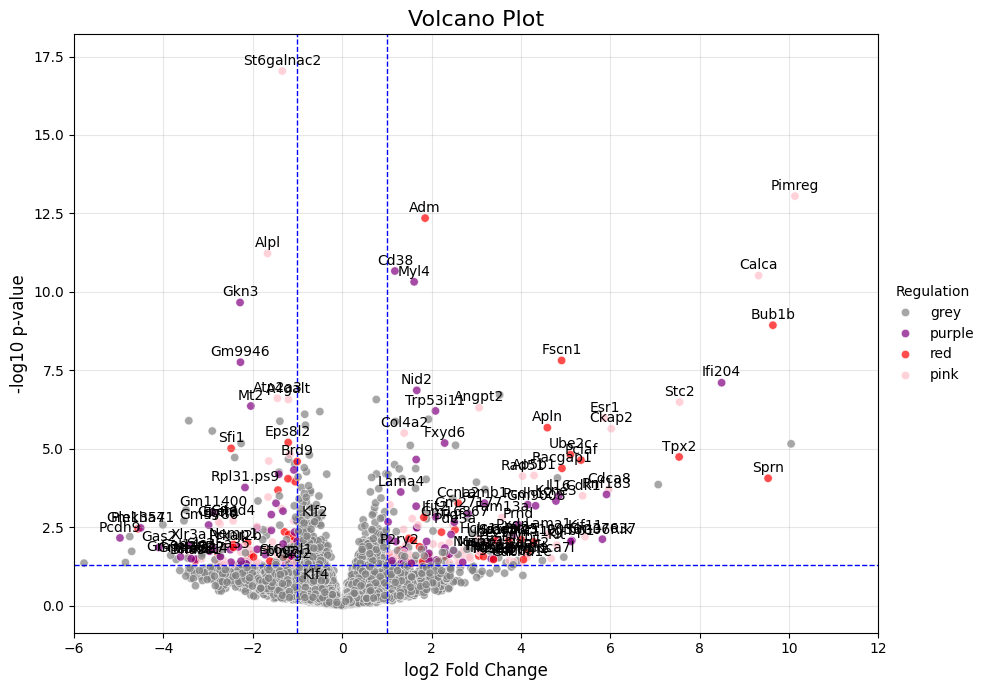

In [83]:
# Run the volcano plot
plot_volcano(
    df=InVivoMsBrEC_KO_v_WT_res,  # or any other DataFrame you want to plot
    df_in_vivo=InVivoMsBrEC_KO_v_WT_res,  # In vivo data
    df_in_vitro=InVitroHuBrEC_SI_v_WT_res_MusGeneName,  # In vitro data
    baseMean_threshold=50,  # Optional, can be adjusted
    log2fc_threshold=1,  # Optional, can be adjusted
    padj_threshold=0.05,  # Optional, can be adjusted
    title="Volcano Plot",  # Title of the plot
    save_path="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission/InVitroHuBrEC_SI_v_WT_res_volcano_pval.pdf"  # Path to save the plot as a PDF (optional)
)

## GSEA enrichr analysis of up and down genes 

In [84]:
from gseapy import get_library_name

# Fetch all available libraries from Enrichr
available_libraries = get_library_name()


### Get GSEA Custom datasets (and convert mouse to human, and human to mouse)

In [85]:
# Replace 'your_file.csv' with the path to your .csv file
file_path_human = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/CreationCustomGeneSetList/CustomGeneSetsHum2024.csv'

# Read the first three rows without considering them as headers
header_df = pd.read_csv(file_path_human, nrows=3, header=None)

# Merge the headers
merged_headers = ["_".join(header_df.iloc[:, col].astype(str)) for col in range(header_df.shape[1])]

# Read the rest of the file using the merged headers as column names, skipping the first four rows (including the original header)
df_human = pd.read_csv(file_path_human, skiprows=4, names=merged_headers)

# Initialize an empty dictionary
custom_endo_human_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_human.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_human_genesets[column] = df_human[column].dropna().tolist()

# custom_endo_genesets now contains your gene sets in the desired format

In [86]:
# Replace 'your_file.csv' with the path to your .csv file
file_path_mouse = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/CreationCustomGeneSetList/CustomGeneSetsMus2024.csv'

# Read the first three rows without considering them as headers
header_df = pd.read_csv(file_path_mouse, nrows=3, header=None)

# Merge the headers
merged_headers = ["_".join(header_df.iloc[:, col].astype(str)) for col in range(header_df.shape[1])]

# Read the rest of the file using the merged headers as column names, skipping the first four rows (including the original header)
df_mouse = pd.read_csv(file_path_mouse, skiprows=4, names=merged_headers)

# Initialize an empty dictionary
custom_endo_mus_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_mouse.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_mus_genesets[column] = df_mouse[column].dropna().tolist()

# custom_endo_genesets now contains your gene sets in the desired format

In [87]:
df_human

PMID38168276_Dementia_BrainEC_Up PMID38168276_Dementia_BrainEC_Down  \
0                               HMMR                              STAG3   
1                         AC008735.2                             TIMM21   
2                               AOX1                         AC231533.1   
3                              VGLL3                               FGGY   
4                              CENPU                          LINC02256   
..                               ...                                ...   
681                              NaN                         AL033504.1   
682                              NaN                               FOSB   
683                              NaN                         AC007611.1   
684                              NaN                         AL591518.1   
685                              NaN                          SH3TC2-DT   

    p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up  \
0                                 APCDD1   
1                                   DKK2   
2                                    LPL   
3                                  PCSK2   
4                                    LSR   
..                                   ...   
681                                  NaN   
682                                  NaN   
683                                  NaN   
684                                  NaN   
685                                  NaN   

    p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down HuAEC_TNF_Up HuAEC_TNF_Down  
0                                   COL1A1         CSF2          MMRN1  
1                                   COL1A2       IFITM1          PALD1  
2                                     THY1         TYMP           EMCN  
3                                   IGFBP5         RTP4          CHST1  
4                                      MME        RSAD2        CXorf36  
..                                     ...          ...            ...  
681                                    NaN          NaN            NaN  
682                                    NaN          NaN            NaN  
683                                    NaN          NaN            NaN  
684                                    NaN          NaN            NaN  
685                                    NaN          NaN            NaN  

[686 rows x 6 columns]

In [88]:
df_mouse

PMID29293084_LowFlowResponse_Up PMID29293084_LowFlowResponse_Down  \
0                            Angpt2                         Serpina1b   
1                             Cd177                             Klk10   
2                               Kit                             Cidea   
3                           Cd300lf                             Cox8b   
4                              Il1b                           Cyp2b10   
..                              ...                               ...   
197                            Cd68                             Plin4   
198                             NaN                               NaN   
199                             NaN                               NaN   
200                             NaN                               NaN   
201                             NaN                               NaN   

    PMID28239661_KLF2KLF4_deletion_Up PMID28239661_KLF2KLF4_deletion_Down  \
0                               Cxcl3                             Gm22245   
1                             Slc26a9                             Kcnd3os   
2                             Tmem212                       4732463B04Rik   
3                             Gm15340                              Cyp1a1   
4                                Gkn1                               Ces1e   
..                                ...                                 ...   
197                           Shroom2                               Anxa8   
198                             Oacyl                             Gm21747   
199                              Ccnf                                 NaN   
200                         Hist1h2bk                                 NaN   
201                             Cdca5                                 NaN   

    PMID34755601_bCatenin_BrainECms_Down PMID34755601_bCatenin_BrainECms_Up  
0                                 Raet1b                               Esr1  
1                                  Crhbp                             Grin2a  
2                               BC018473                             Cdkn2a  
3                                 Gm6654                               Fosb  
4                                  Lars2                             Gm4841  
..                                   ...                                ...  
197                                 Bmp2                               Aim2  
198                                  NaN                            Slc35f1  
199                                  NaN                                NaN  
200                                  NaN                                NaN  
201                                  NaN                                NaN  

[202 rows x 6 columns]

In [89]:
#Convert mouse gene id to human

def transform_gene_id(gene_id, mapping_dict):
    # Return the mapped gene ID or the original if not found in the mapping
    return mapping_dict.get(gene_id, gene_id)

def transform_dataframe(df_mouse, mapping_dict):
    # Apply transformation to each cell in the DataFrame
    return df_mouse.applymap(lambda x: transform_gene_id(x, mapping_dict))

# Apply the transformation
transformed_df = transform_dataframe(df_mouse, m2h_dict)

# Optionally, save the transformed DataFrame with a new variable name
df_mouse_HsGeneID = transformed_df


In [90]:
#Convert human gene id to mouse

def transform_gene_id(gene_id, mapping_dict):
    # Return the mapped gene ID or the original if not found in the mapping
    return mapping_dict.get(gene_id, gene_id)

def transform_dataframe(df_human, mapping_dict):
    # Apply transformation to each cell in the DataFrame
    return df_human.applymap(lambda x: transform_gene_id(x, mapping_dict))

# Example usage
# Assuming df_human is your DataFrame with human gene IDs
# And h2m_dict is your mapping dictionary from human to mouse gene IDs
transformed_df = transform_dataframe(df_human, h2m_dict)

# Optionally, save the transformed DataFrame with a new variable name
df_human_MmGeneID = transformed_df

In [91]:
df_mouse_HsGeneID

PMID29293084_LowFlowResponse_Up PMID29293084_LowFlowResponse_Down  \
0                            ANGPT2                          SERPINA1   
1                             CD177                             KLK10   
2                               KIT                             CIDEA   
3                           CD300LF                               NaN   
4                              IL1B                               NaN   
..                              ...                               ...   
197                             NaN                             PLIN4   
198                             NaN                               NaN   
199                             NaN                               NaN   
200                             NaN                               NaN   
201                             NaN                               NaN   

    PMID28239661_KLF2KLF4_deletion_Up PMID28239661_KLF2KLF4_deletion_Down  \
0                               CXCL3                          RNU6-1305P   
1                             SLC26A9                                 NaN   
2                             TMEM212                                 NaN   
3                                 NaN                              CYP1A1   
4                                GKN1                                 NaN   
..                                ...                                 ...   
197                           SHROOM2                             ANXA8L1   
198                               NaN                             Gm21747   
199                              CCNF                                 NaN   
200                         Hist1h2bk                                 NaN   
201                             CDCA5                                 NaN   

    PMID34755601_bCatenin_BrainECms_Down PMID34755601_bCatenin_BrainECms_Up  
0                                 Raet1b                               ESR1  
1                                  CRHBP                             GRIN2A  
2                                    NaN                                NaN  
3                                    NaN                               FOSB  
4                                  LARS2                                NaN  
..                                   ...                                ...  
197                                 BMP2                               AIM2  
198                                  NaN                            SLC35F1  
199                                  NaN                                NaN  
200                                  NaN                                NaN  
201                                  NaN                                NaN  

[202 rows x 6 columns]

In [92]:
df_human_MmGeneID

PMID38168276_Dementia_BrainEC_Up PMID38168276_Dementia_BrainEC_Down  \
0                               Hmmr                              Stag3   
1                         AC008735.2                             Timm21   
2                               Aox1                         AC231533.1   
3                              Vgll3                               Fggy   
4                              Cenpu                                NaN   
..                               ...                                ...   
681                              NaN                         AL033504.1   
682                              NaN                               Fosb   
683                              NaN                         AC007611.1   
684                              NaN                         AL591518.1   
685                              NaN                                NaN   

    p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up  \
0                                 Apcdd1   
1                                   Dkk2   
2                                    Lpl   
3                                  Pcsk2   
4                                    Lsr   
..                                   ...   
681                                  NaN   
682                                  NaN   
683                                  NaN   
684                                  NaN   
685                                  NaN   

    p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down HuAEC_TNF_Up HuAEC_TNF_Down  
0                                   Col1a1         Csf2          Mmrn1  
1                                   Col1a2       Ifitm6          Pald1  
2                                     Thy1         Tymp           Emcn  
3                                   Igfbp5         Rtp4          Chst1  
4                                      Mme        Rsad2        CXorf36  
..                                     ...          ...            ...  
681                                    NaN          NaN            NaN  
682                                    NaN          NaN            NaN  
683                                    NaN          NaN            NaN  
684                                    NaN          NaN            NaN  
685                                    NaN          NaN            NaN  

[686 rows x 6 columns]

In [93]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

df_mouse_HsGeneID

PMID29293084_LowFlowResponse_Up PMID29293084_LowFlowResponse_Down  \
0                            ANGPT2                          SERPINA1   
1                             CD177                             KLK10   
2                               KIT                             CIDEA   
3                           CD300LF                               NaN   
4                              IL1B                               NaN   
..                              ...                               ...   
197                             NaN                             PLIN4   
198                             NaN                               NaN   
199                             NaN                               NaN   
200                             NaN                               NaN   
201                             NaN                               NaN   

    PMID28239661_KLF2KLF4_deletion_Up PMID28239661_KLF2KLF4_deletion_Down  \
0                               CXCL3                          RNU6-1305P   
1                             SLC26A9                                 NaN   
2                             TMEM212                                 NaN   
3                                 NaN                              CYP1A1   
4                                GKN1                                 NaN   
..                                ...                                 ...   
197                           SHROOM2                             ANXA8L1   
198                               NaN                             Gm21747   
199                              CCNF                                 NaN   
200                         Hist1h2bk                                 NaN   
201                             CDCA5                                 NaN   

    PMID34755601_bCatenin_BrainECms_Down PMID34755601_bCatenin_BrainECms_Up  
0                                 Raet1b                               ESR1  
1                                  CRHBP                             GRIN2A  
2                                    NaN                                NaN  
3                                    NaN                               FOSB  
4                                  LARS2                                NaN  
..                                   ...                                ...  
197                                 BMP2                               AIM2  
198                                  NaN                            SLC35F1  
199                                  NaN                                NaN  
200                                  NaN                                NaN  
201                                  NaN                                NaN  

[202 rows x 6 columns]

### Run ENRICHR for individual gene sets

In [94]:
#Remove NaN

# Initialize an empty dictionary
custom_endo_mus_HsID_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_mouse_HsGeneID.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_mus_HsID_genesets[column] = df_mouse_HsGeneID[column].dropna().tolist()

    
    
# Initialize an empty dictionary
custom_endo_hum_MsID_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_human_MmGeneID.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_hum_MsID_genesets[column] = df_human_MmGeneID[column].dropna().tolist()



In [95]:
df=InVivoMsBrEC_KO_v_WT_res_HumanGeneName
save_prefix="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission"
enrichr_libraries = ["GO_Biological_Process_2023"]

#"KEGG_2021_Human"
#"GO_Biological_Process_2023" 

# Define the threshold for upregulation (example: Log2FC > 1 and p-value < 0.05)
upregulated_genes = df[(df['log2FoldChange'] > 0) & (df['pvalue'] < 0.05)].index.tolist()  # Use the index for gene names
downregulated_genes = df[(df['log2FoldChange'] < 0) & (df['pvalue'] < 0.05)].index.tolist()  # Use the index for gene names

# Run enrichment analysis using enrichr
enr_up = gseapy.enrichr(gene_list=upregulated_genes,
                        gene_sets=enrichr_libraries,
                        organism='Human',
                        outdir=None)

# Run enrichment analysis using enrichr
enr_down = gseapy.enrichr(gene_list=downregulated_genes,
                        gene_sets=enrichr_libraries,
                        organism='Human',
                        outdir=None)

In [96]:
enr_up.results.head(5)

Gene_set  \
0  GO_Biological_Process_2023   
1  GO_Biological_Process_2023   
2  GO_Biological_Process_2023   
3  GO_Biological_Process_2023   
4  GO_Biological_Process_2023   

                                                Term Overlap       P-value  \
0  Spindle Assembly Checkpoint Signaling (GO:0071...    9/26  2.257611e-09   
1  Mitotic Spindle Assembly Checkpoint Signaling ...    9/26  2.257611e-09   
2  Mitotic Spindle Checkpoint Signaling (GO:0071174)    9/26  2.257611e-09   
3  Negative Regulation Of Mitotic Metaphase/Anaph...    9/28  4.801505e-09   
4  Microtubule Cytoskeleton Organization Involved...   11/59  4.970734e-08   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.000002            0                     0   24.293289   
1          0.000002            0                     0   24.293289   
2          0.000002            0                     0   24.293289   
3          0.000003            0                     0   21.733877   
4          0.000020            0                     0   10.548693   

   Combined Score                                              Genes  
0      483.654092  CENPF;NUF2;PLK1;BUB1B;KLHL22;KNTC1;HASPIN;BUB1...  
1      483.654092  CENPF;NUF2;PLK1;BUB1B;KLHL22;KNTC1;HASPIN;BUB1...  
2      483.654092  CENPF;NUF2;PLK1;BUB1B;KLHL22;KNTC1;HASPIN;BUB1...  
3      416.297991  CENPF;NUF2;PLK1;BUB1B;KLHL22;KNTC1;HASPIN;BUB1...  
4      177.398565  CCNB1;NUF2;PLK1;NUSAP1;CDK1;BIRC5;CDCA8;KIF11;...

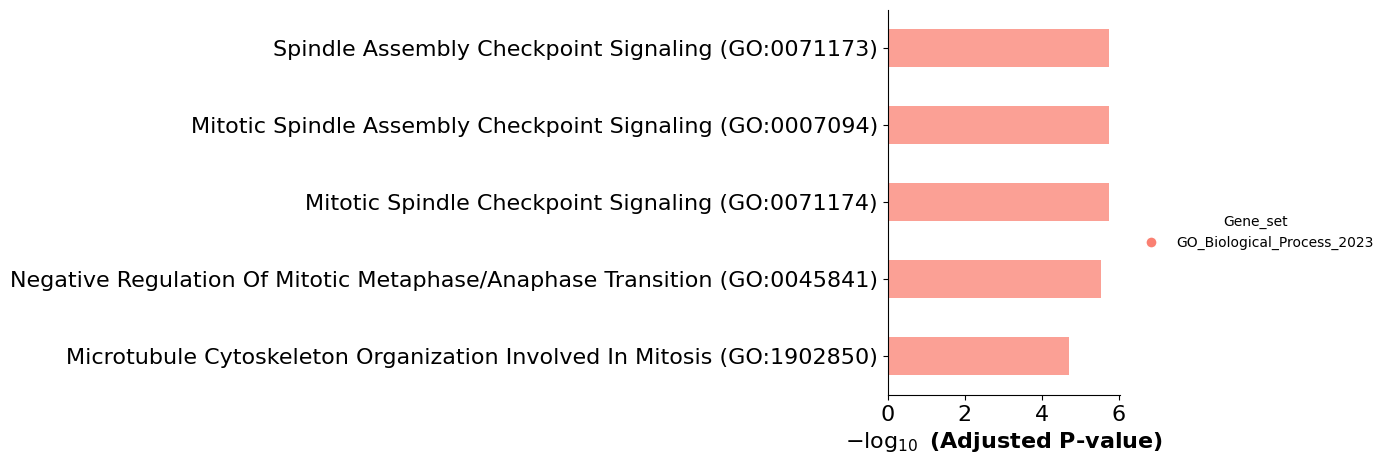

In [97]:
from gseapy import barplot

# Assuming enr_up contains the enrichment analysis results
# Make sure enr_up.results is a dictionary with results from different libraries

# Simple plotting function to visualize enrichment
ax = barplot(
    enr_up.results,               # Results from enrichr
    column="Adjusted P-value",     # Column to sort by (can use "Adjusted P-value" or other metrics)
    group='Gene_set',              # Grouping by Gene_set allows multi-sample/library comparison
    size=10,                       # Size of the bars
    top_term=5,                    # Top N terms to display
    figsize=(3, 5)                # Figure size
)


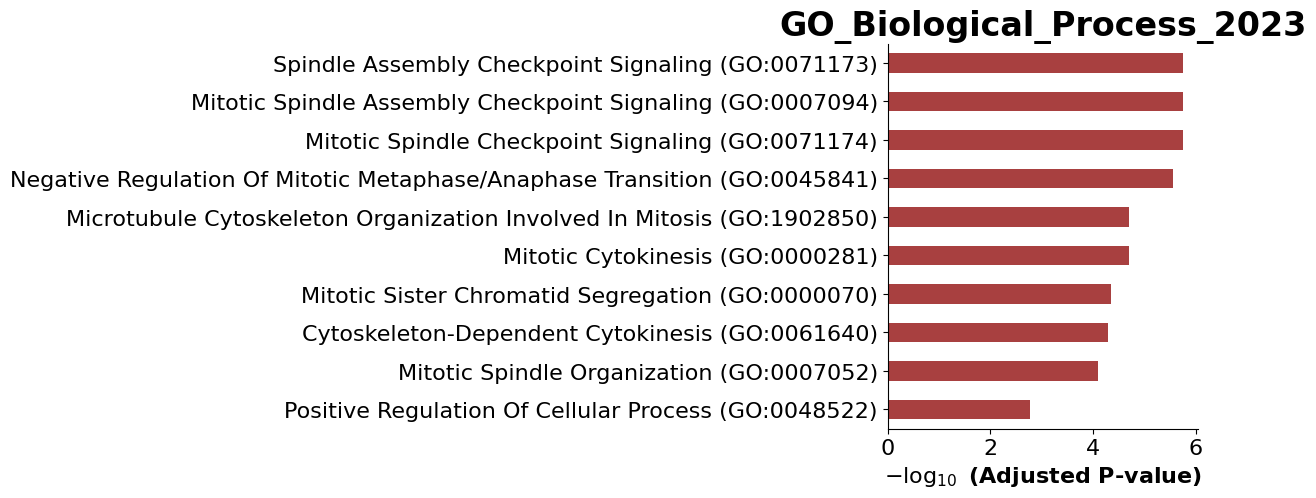

In [98]:
# to save your figure, make sure that ``ofname`` is not None
ax = barplot(enr_up.res2d,title='GO_Biological_Process_2023', figsize=(4, 5), color='darkred')

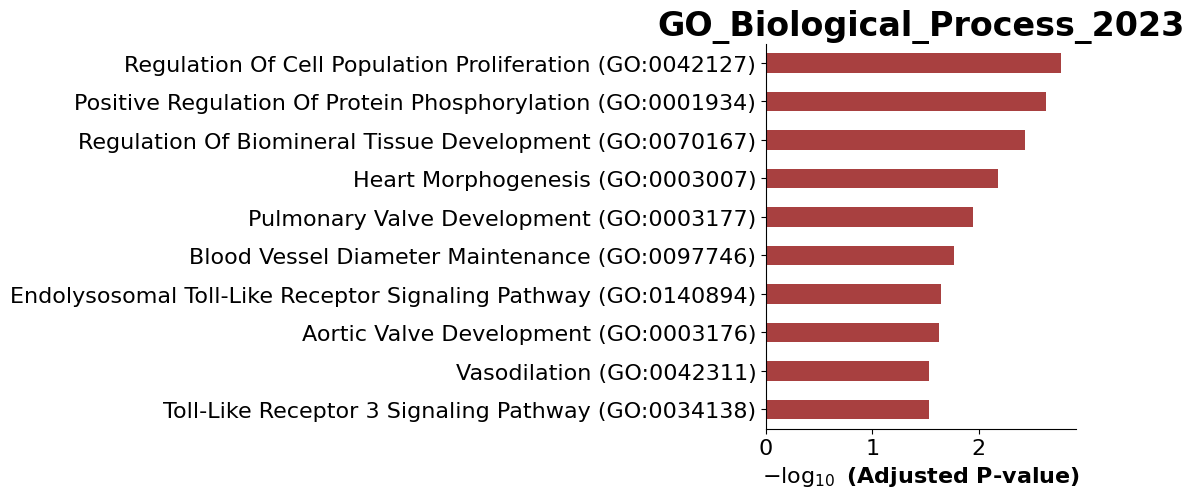

In [99]:
# to save your figure, make sure that ``ofname`` is not None
ax = barplot(enr_down.res2d,title='GO_Biological_Process_2023', figsize=(4, 5), color='darkred')

In [100]:
df=InVivoMsBrEC_KO_v_WT_res
save_prefix="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission"
enrichr_libraries = custom_endo_mus_genesets

#"KEGG_2021_Human"
#"GO_Biological_Process_2023" 

# Define the threshold for upregulation (example: Log2FC > 1 and p-value < 0.05)
upregulated_genes = df[(df['log2FoldChange'] > 0) & (df['pvalue'] < 0.05)].index.tolist()  # Use the index for gene names
downregulated_genes = df[(df['log2FoldChange'] < 0) & (df['pvalue'] < 0.05)].index.tolist()  # Use the index for gene names

# Run enrichment analysis using enrichr
enr_up_custom = gseapy.enrichr(gene_list=upregulated_genes,
                        gene_sets=enrichr_libraries,
                        organism='Human',
                        outdir=None)

# Run enrichment analysis using enrichr
enr_down_custom = gseapy.enrichr(gene_list=downregulated_genes,
                        gene_sets=enrichr_libraries,
                        organism='Human',
                        outdir=None)

In [101]:
enr_down_custom.results.head(5)

Gene_set                                  Term Overlap   P-value  \
0  gs_ind_0   PMID28239661_KLF2KLF4_deletion_Down  10/199  0.095363   
1  gs_ind_0     PMID28239661_KLF2KLF4_deletion_Up   2/202  0.994220   
2  gs_ind_0     PMID29293084_LowFlowResponse_Down  15/198  0.000608   
3  gs_ind_0       PMID29293084_LowFlowResponse_Up   3/198  0.969984   
4  gs_ind_0  PMID34755601_bCatenin_BrainECms_Down   2/198  0.993351   

   Adjusted P-value  Odds Ratio  Combined Score  \
0          0.190727    1.802383        4.235712   
1          0.994220    0.323671        0.001876   
2          0.003651    3.299572       24.431804   
3          0.994220    0.478176        0.014573   
4          0.994220    0.331654        0.002213   

                                               Genes  
0  Alpl;Ptprr;Prrt4;Nog;Lmntd1;Syt7;Serpina1e;Cyt...  
1                                           Mt2;Ptx3  
2  Aspg;Rasd1;Myrip;Ptprr;Prrt4;Serpina1e;Klf2;Sy...  
3                                   Cd300lf;Hck;Cd33  
4                                        Vsig2;Rps27

In [102]:
df=InVivoMsBrEC_KO_v_WT_res_HumanGeneName
save_prefix="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission"

#"KEGG_2021_Human"
#"GO_Biological_Process_2023" 

# Define the threshold for upregulation (example: Log2FC > 1 and p-value < 0.05)
upregulated_genes = df[(df['log2FoldChange'] > 0) & (df['pvalue'] < 0.05)].index.tolist()  # Use the index for gene names
downregulated_genes = df[(df['log2FoldChange'] < 0) & (df['pvalue'] < 0.05)].index.tolist()  # Use the index for gene names


# Define save prefix and libraries
save_prefix = "/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission"
predefined_libraries = ["GO_Biological_Process_2023"]  # List of predefined libraries
custom_library = custom_endo_human_genesets  # Custom library provided as a dictionary

# Define the threshold for upregulation (example: Log2FC > 1 and p-value < 0.05)
upregulated_genes = df[(df['log2FoldChange'] > 0) & (df['pvalue'] < 0.05)].index.tolist()
downregulated_genes = df[(df['log2FoldChange'] < 0) & (df['pvalue'] < 0.05)].index.tolist()

# Initialize dictionaries to store results
results_up = {}
results_down = {}

# Process predefined libraries
for library in predefined_libraries:
    print(f"Running Enrichment Analysis for Library: {library}")
    
    # Run enrichment analysis for upregulated genes
    enr_up = gseapy.enrichr(gene_list=upregulated_genes,
                            gene_sets=library,
                            organism='Human',
                            outdir=None)
    results_up[library] = enr_up
    
    # Run enrichment analysis for downregulated genes
    enr_down = gseapy.enrichr(gene_list=downregulated_genes,
                              gene_sets=library,
                              organism='Human',
                              outdir=None)
    results_down[library] = enr_down

# Process custom library
print("Running Enrichment Analysis for Custom Library")
enr_up_custom = gseapy.enrichr(gene_list=upregulated_genes,
                               gene_sets=custom_library,  # Pass the custom library directly
                               organism='Human',
                               outdir=None)
results_up["custom_endo_mus_genesets"] = enr_up_custom

enr_down_custom = gseapy.enrichr(gene_list=downregulated_genes,
                                 gene_sets=custom_library,  # Pass the custom library directly
                                 organism='Human',
                                 outdir=None)
results_down["custom_endo_mus_genesets"] = enr_down_custom

# Save or inspect results
print(f"Enrichment results (upregulated): {results_up}")
print(f"Enrichment results (downregulated): {results_down}")


Running Enrichment Analysis for Library: GO_Biological_Process_2023
Running Enrichment Analysis for Custom Library
Enrichment results (upregulated): {'GO_Biological_Process_2023': <gseapy.enrichr.Enrichr object at 0x16b3f8650>, 'custom_endo_mus_genesets': <gseapy.enrichr.Enrichr object at 0x16be93d90>}
Enrichment results (downregulated): {'GO_Biological_Process_2023': <gseapy.enrichr.Enrichr object at 0x16bb62310>, 'custom_endo_mus_genesets': <gseapy.enrichr.Enrichr object at 0x16baf5b10>}


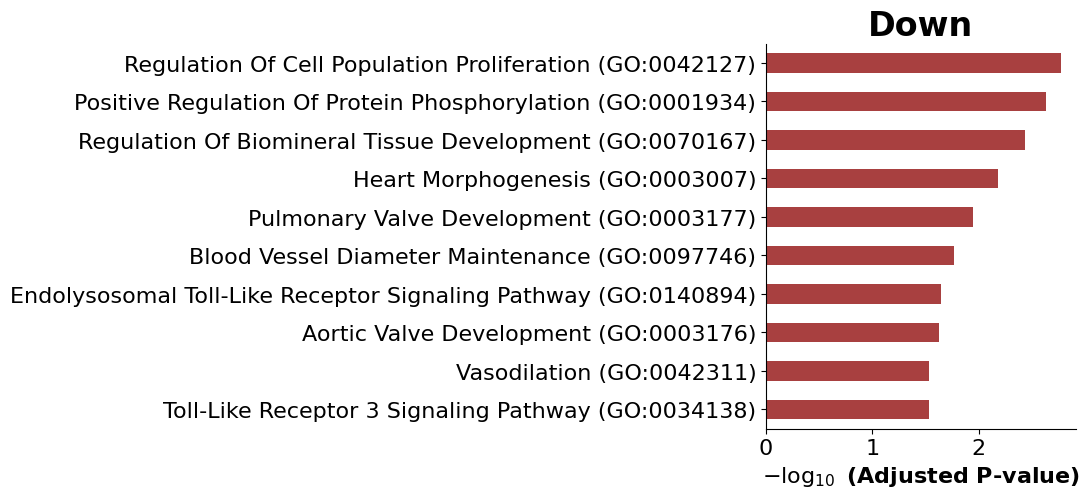

In [103]:
# to save your figure, make sure that ``ofname`` is not None
ax = barplot(enr_down.res2d,title='Down', figsize=(4, 5), color='darkred')

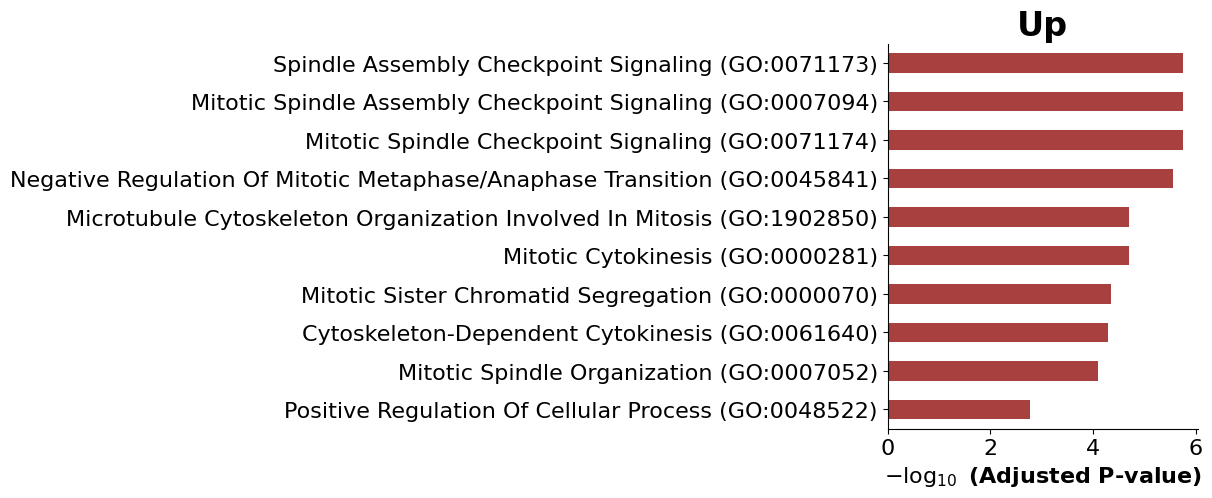

In [104]:
# to save your figure, make sure that ``ofname`` is not None
ax = barplot(enr_up.res2d,title='Up', figsize=(4, 5), color='darkred')

## Run enrichr for both Hallmark and Custom, and merge and then plot

In [105]:
InVivoMsBrEC_KO_v_WT_res

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gnai3           5654.457481        0.044754  0.278951  0.160437  0.872537   
Pbsn               0.000000             NaN       NaN       NaN       NaN   
Cdc45             84.898836        0.363681  1.570223  0.231611  0.816840   
H19                0.000000             NaN       NaN       NaN       NaN   
Scml2              5.020636        6.091878  3.009857  2.023976  0.042973   
...                     ...             ...       ...       ...       ...   
Gm45870            0.000000             NaN       NaN       NaN       NaN   
Gm9689             0.000000             NaN       NaN       NaN       NaN   
Gm17999            0.000000             NaN       NaN       NaN       NaN   
Gm45736            4.868740        0.002801  0.973909  0.002876  0.997705   
X1700012D14Rik   128.164892       -1.179081  2.004702 -0.588158  0.556426   

                    padj   MouseGeneName  
Gnai3           0.999272           Gnai3  
Pbsn                 NaN            Pbsn  
Cdc45           0.999272           Cdc45  
H19                  NaN             H19  
Scml2           0.864587           Scml2  
...                  ...             ...  
Gm45870              NaN         Gm45870  
Gm9689               NaN          Gm9689  
Gm17999              NaN         Gm17999  
Gm45736         0.999306         Gm45736  
X1700012D14Rik  0.999272  X1700012D14Rik  

[48440 rows x 7 columns]

In [109]:
# DataFrames
df_hum = InVivoMsBrEC_KO_v_WT_res_HumanGeneName
df_mus = InVivoMsBrEC_KO_v_WT_res

# Define save prefix and libraries
save_prefix = "/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission"
predefined_libraries = ["KEGG_2021_Human", "MSigDB_Hallmark_2020"]
custom_library = custom_endo_mus_genesets
custom_library2 = custom_endo_human_genesets

# Define thresholds for upregulated and downregulated genes
upregulated_genes_hum = df_hum[(df_hum['log2FoldChange'] > 0) & (df_hum['padj'] < 0.1)].index.tolist()
downregulated_genes_hum = df_hum[(df_hum['log2FoldChange'] < 0) & (df_hum['padj'] < 0.1)].index.tolist()

upregulated_genes_mus = df_mus[(df_mus['log2FoldChange'] > 0) & (df_mus['padj'] < 0.1)].index.tolist()
downregulated_genes_mus = df_mus[(df_mus['log2FoldChange'] < 0) & (df_mus['padj'] < 0.1)].index.tolist()

# Initialize lists to store results
up_results_predefined = []
down_results_predefined = []

# Run enrichment for each predefined library
for library in predefined_libraries:
    enr_up = gseapy.enrichr(gene_list=upregulated_genes_hum, gene_sets=library, organism='Human', outdir=None)
    enr_down = gseapy.enrichr(gene_list=downregulated_genes_hum, gene_sets=library, organism='Human', outdir=None)
    
    df_up = enr_up.results
    df_down = enr_down.results

    # Add library name
    df_up['Library'] = library
    df_down['Library'] = library

    up_results_predefined.append(df_up)
    down_results_predefined.append(df_down)

# Combine predefined results
df_enr_up_predefined = pd.concat(up_results_predefined, ignore_index=True)
df_enr_down_predefined = pd.concat(down_results_predefined, ignore_index=True)

# Run enrichment for custom library
enr_up_custom = gseapy.enrichr(gene_list=upregulated_genes_mus, gene_sets=custom_library, organism='Mouse', outdir=None)
enr_down_custom = gseapy.enrichr(gene_list=downregulated_genes_mus, gene_sets=custom_library, organism='Mouse', outdir=None)

df_enr_up_custom = enr_up_custom.results
df_enr_down_custom = enr_down_custom.results


# Run enrichment for custom library
enr_up_custom2 = gseapy.enrichr(gene_list=upregulated_genes_hum, gene_sets=custom_library2, organism='Human', outdir=None)
enr_down_custom2 = gseapy.enrichr(gene_list=downregulated_genes_hum, gene_sets=custom_library2, organism='Human', outdir=None)

df_enr_up_custom2 = enr_up_custom2.results
df_enr_down_custom2 = enr_down_custom2.results


# Add library name
df_enr_up_custom['Library'] = "custom_endo_mus_genesets"
df_enr_down_custom['Library'] = "custom_endo_mus_genesets"

df_enr_up_custom2['Library'] = "custom_endo_human_genesets"
df_enr_down_custom2['Library'] = "custom_endo_human_genesets"


# Merge results
merged_enr_up = pd.concat([df_enr_up_predefined, df_enr_up_custom], ignore_index=True)
merged_enr_down = pd.concat([df_enr_down_predefined, df_enr_down_custom], ignore_index=True)

# Save merged results
merged_enr_up.to_csv(f"{save_prefix}/merged_enr_up.results.csv", index=False)
merged_enr_down.to_csv(f"{save_prefix}/merged_enr_down.results.csv", index=False)

# Load merged results
merged_up = pd.read_csv(f"{save_prefix}/merged_enr_up.results.csv")
merged_down = pd.read_csv(f"{save_prefix}/merged_enr_down.results.csv")

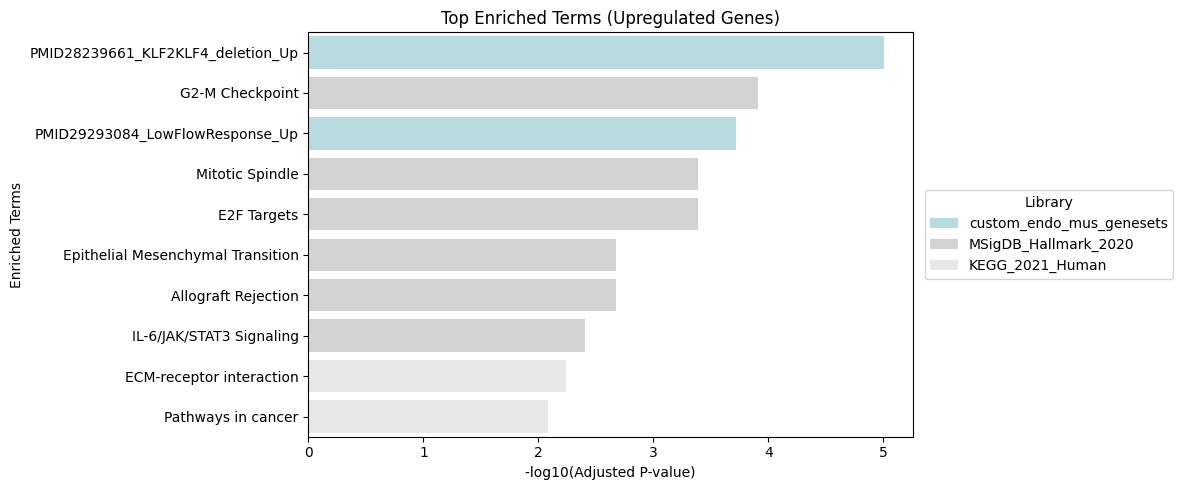

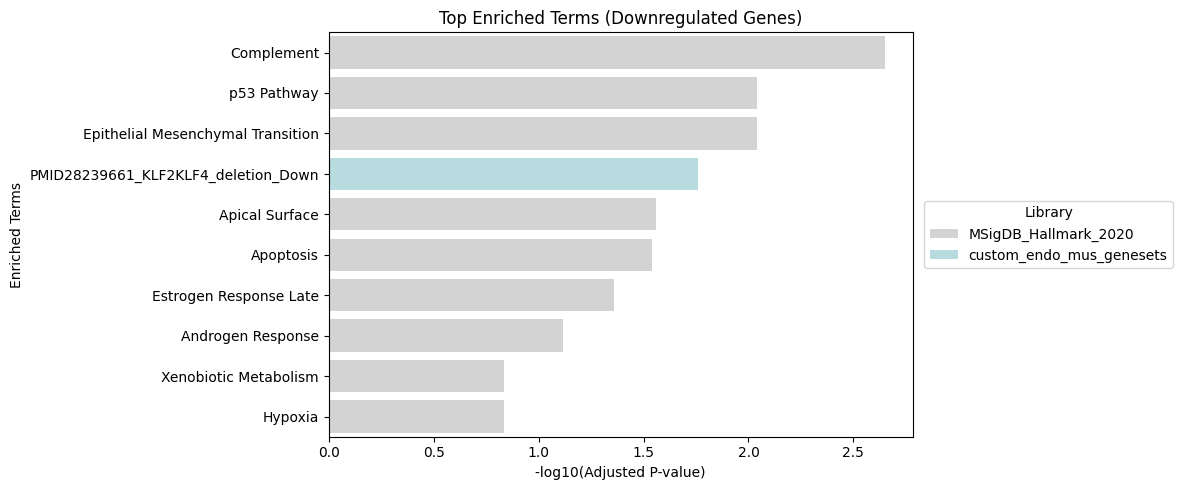

In [110]:
save_prefix = "/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission"


# Define custom colors for libraries
library_colors = {
    "KEGG_2021_Human": "#E8E8E8",  # Light salmon
    "MSigDB_Hallmark_2020": "#D3D3D3",  # Very light grey
    "custom_endo_mus_genesets": "#B0E0E6",  # Very light blue (PowderBlue)
    "custom_endo_human_genesets": "#B0E0E6"  # Very light blue (PowderBlue)
}

# Plot top terms for upregulated genes (log-transformed p-values)
merged_up['-log10(Adjusted P-value)'] = -np.log10(merged_up['Adjusted P-value'])
top_up = merged_up.nsmallest(10, 'Adjusted P-value')  # Select top 10 based on smallest p-values

# Save the plot as a PDF
plt.figure(figsize=(12, 5))
sns.barplot(
    data=top_up,
    x='-log10(Adjusted P-value)',
    y='Term',
    hue='Library',
    palette=library_colors  # Use custom colors
)
plt.title("Top Enriched Terms (Upregulated Genes)")
plt.xlabel("-log10(Adjusted P-value)")
plt.ylabel("Enriched Terms")
plt.legend(
    title="Library",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),  # Move legend outside the plot
    borderaxespad=0
)
plt.tight_layout()
plt.savefig(f"{save_prefix}/top_enriched_upregulated_terms.pdf", format="pdf")

# Plot top terms for downregulated genes (log-transformed p-values)
merged_down['-log10(Adjusted P-value)'] = -np.log10(merged_down['Adjusted P-value'])
top_down = merged_down.nsmallest(10, 'Adjusted P-value')  # Select top 10 based on smallest p-values

# Save the plot as a PDF
plt.figure(figsize=(12, 5))
sns.barplot(
    data=top_down,
    x='-log10(Adjusted P-value)',
    y='Term',
    hue='Library',
    palette=library_colors  # Use custom colors
)
plt.title("Top Enriched Terms (Downregulated Genes)")
plt.xlabel("-log10(Adjusted P-value)")
plt.ylabel("Enriched Terms")
plt.legend(
    title="Library",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),  # Move legend outside the plot
    borderaxespad=0
)
plt.tight_layout()
plt.savefig(f"{save_prefix}/top_enriched_downregulated_terms.pdf", format="pdf")

## Get list of strongest similarly regulated genes

In [111]:
# Merge the two DataFrames on their index (Gene)
merged_df = pd.merge(
    InVivoMsBrEC_KO_v_WT_res, 
    InVivoMsBrEC_KI_v_WT_res, 
    left_index=True, 
    right_index=True, 
    suffixes=('_sample1', '_sample2')
)

# Filter rows where log2FoldChange is in the same direction for both samples
same_direction = merged_df[
    ((merged_df['log2FoldChange_sample1'] > 0) & (merged_df['log2FoldChange_sample2'] > 0)) |
    ((merged_df['log2FoldChange_sample1'] < 0) & (merged_df['log2FoldChange_sample2'] < 0))
]

# Sort by pvalue in ascending order to get the lowest p-values
same_direction_sorted = same_direction.sort_values(by='pvalue_sample1', ascending=True)

# Display the top rows with the lowest p-values
top_low_pvalues = same_direction_sorted[['pvalue_sample1', 'log2FoldChange_sample1', 'pvalue_sample2', 'log2FoldChange_sample2']]

top_low_pvalues.to_excel('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/top_low_pvalues_KO_KI_in_vivo.xlsx', index=True)


In [112]:
# Merge the two DataFrames on their index (Gene)
merged_df = pd.merge(
    InVivoMsBrEC_KO_v_WT_res, 
    InVitroHuBrEC_SI_v_WT_res_MusGeneName, 
    left_index=True, 
    right_index=True, 
    suffixes=('_sample1', '_sample2')
)

# Filter rows where log2FoldChange is in the same direction for both samples
same_direction = merged_df[
    ((merged_df['log2FoldChange_sample1'] > 0) & (merged_df['log2FoldChange_sample2'] > 0)) |
    ((merged_df['log2FoldChange_sample1'] < 0) & (merged_df['log2FoldChange_sample2'] < 0))
]

# Sort by pvalue in ascending order to get the lowest p-values
same_direction_sorted = same_direction.sort_values(by='pvalue_sample1', ascending=True)

# Display the top rows with the lowest p-values
top_low_pvalues = same_direction_sorted[['pvalue_sample1', 'log2FoldChange_sample1', 'pvalue_sample2', 'log2FoldChange_sample2']]

top_low_pvalues.to_excel('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/top_low_pvalues_MouseInvivo_HumanInvitro_in_vivo.xlsx', index=True)


In [113]:
# List of genes for which you want to extract the data
genes_of_interest = ['St6galnac2', 'Klf2', 'Cxcr4']  # Replace with your actual list of genes

# DataFrames: InVitroHuBrEC_SI_v_WT_res_MusGeneName, InVivoMsBrEC_KO_v_WT_res, InVivoMsBrEC_KI_v_WT_res
# Ensure that the gene names are the index in each DataFrame

# Function to extract data for specific genes
def extract_gene_data(df, genes):
    # Filter the DataFrame by the list of genes of interest
    df_filtered = df.loc[genes, ['pvalue', 'padj', 'log2FoldChange']]
    return df_filtered

# Extract data for each DataFrame
df_invitro = extract_gene_data(InVitroHuBrEC_SI_v_WT_res_MusGeneName, genes_of_interest)
df_invivo_ko = extract_gene_data(InVivoMsBrEC_KO_v_WT_res, genes_of_interest)
df_invivo_ki = extract_gene_data(InVivoMsBrEC_KI_v_WT_res, genes_of_interest)

# Print the extracted data
print("InVitro Data:")
print(df_invitro)

print("\nInVivo KO Data:")
print(df_invivo_ko)

print("\nInVivo KI Data:")
print(df_invivo_ki)

InVitro Data:
                 pvalue      padj  log2FoldChange
MouseGeneName                                    
St6galnac2     0.000083  0.007633       -2.207852
Klf2           0.024402  0.247085       -1.143108
Cxcr4          0.000097  0.008375        1.277212

InVivo KO Data:
                  pvalue          padj  log2FoldChange
St6galnac2  9.125111e-18  1.053813e-13       -1.340190
Klf2        2.141435e-03  1.902335e-01       -0.616705
Cxcr4       8.545339e-03  4.337839e-01        3.727028

InVivo KI Data:
              pvalue      padj  log2FoldChange
St6galnac2  0.471395  0.999681        0.156088
Klf2        0.362532  0.999681        0.234546
Cxcr4       0.402151  0.999681        2.141639


# Load data for base mean (filtering for GSEA)

In [123]:
InVitroHuBrEC_Inner_siTDP43vWT_res

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj  \
A1BG         7.620484        1.181919  1.223058  0.966364  0.333862  0.985281   
A1BG.AS1    25.371923        0.208776  0.709386  0.294305  0.768525  0.985281   
A1CF              NaN             NaN       NaN       NaN       NaN       NaN   
A2M        125.005752       -2.561491  0.816496 -3.137176  0.001706  0.229844   
A2M.AS1      6.440535       -1.579687  1.448095 -1.090872  0.275329  0.985281   
...               ...             ...       ...       ...       ...       ...   
ZYG11AP1          NaN             NaN       NaN       NaN       NaN       NaN   
ZYG11B    1228.509420       -0.306604  0.277884 -1.103355  0.269873  0.985281   
ZYX       7328.625135        0.902937  0.361883  2.495109  0.012592  0.556271   
ZYXP1             NaN             NaN       NaN       NaN       NaN       NaN   
ZZEF1      516.310911       -0.730492  0.288101 -2.535538  0.011227  0.530225   

         HumanGeneName  
A1BG              A1BG  
A1BG.AS1      A1BG.AS1  
A1CF              A1CF  
A2M                A2M  
A2M.AS1        A2M.AS1  
...                ...  
ZYG11AP1      ZYG11AP1  
ZYG11B          ZYG11B  
ZYX                ZYX  
ZYXP1            ZYXP1  
ZZEF1            ZZEF1  

[58299 rows x 7 columns]

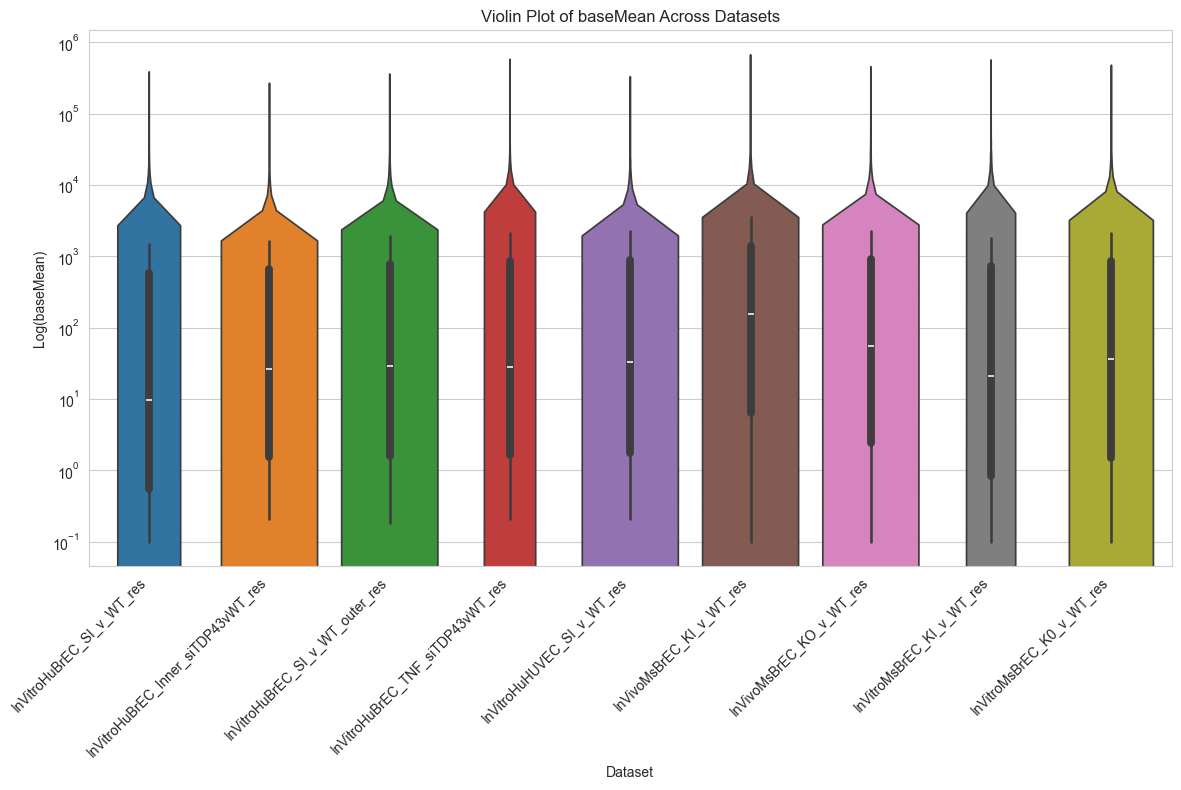

In [124]:
# Original DataFrame names and objects
df_dict = {
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res
}

# Updated DataFrame processing
processed_data = {}

for df_name, df in df_dict.items():
    if 'baseMean' in df.columns:
        # Make a copy of the DataFrame to avoid SettingWithCopyWarning
        df = df.copy()

        # Ensure 'baseMean' is numeric
        df['baseMean'] = pd.to_numeric(df['baseMean'], errors='coerce')

        # Replace 0 with NaN explicitly using a lambda
        df['baseMean'] = df['baseMean'].apply(lambda x: np.nan if x == 0 else x)

        # Drop rows where 'baseMean' is NaN
        df.dropna(subset=['baseMean'], inplace=True)

        # Ensure all values in 'baseMean' are at least 0.1
        df['baseMean'] = df['baseMean'].apply(lambda x: max(x, 0.1))

        # Save processed DataFrame back into the dictionary
        processed_data[df_name] = df

# Collect 'baseMean' columns for the violin plot
data = [df['baseMean'].values for df in processed_data.values()]

# Violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=data)
plt.yscale('log')
plt.xlabel('Dataset')
plt.ylabel('Log(baseMean)')
plt.title('Violin Plot of baseMean Across Datasets')
plt.xticks(ticks=range(len(processed_data)), labels=processed_data.keys(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create RNK files for GSEA

In [127]:
#Create RNK files for GSEA from DESeq2 data

# Original DataFrame names and objects
df_dict = {
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res
}

# New DataFrame dictionary
new_df_dict = {}

# Iterating through each item in the df_dict dictionary
for name, df in df_dict.items():
    # Filtering the DataFrame to keep only rows where baseMean >= 5
    df = df[df['baseMean'] >= 5]

    # If you want to ensure there is data after filtering you can add a check:
    if df.empty:
        print(f"No data in DataFrame {name} with baseMean >= 5")
        continue

    # Selecting only the 'log2FoldChange' column
    new_df = df[['log2FoldChange']]
    # Sorting the values based on 'log2FoldChange' in descending order
    new_df = new_df.sort_values(by='log2FoldChange', ascending=False)
    # Assigning no column names
    new_df.columns = ['']
    # Creating the new name by replacing 'res' with 'Log2FC' in the original name
    new_name = name.replace('_res', '_Log2FC')
    # Adding the new DataFrame to the new_df_dict dictionary with the new name
    new_df_dict[new_name] = new_df

# Assigning each DataFrame to a variable with its name
for name in new_df_dict:
    globals()[name] = new_df_dict[name]

In [128]:
#Create RNK files for DESeq2 from single nuclei analysis

# Original DataFrame names and objects
df_dict = {
    'InVivoNuclei_Clust1v3_res': InVivoNuclei_Clust1v3_res
}

new_df_dict = {}

# Iterating through each item in the df_dict dictionary
for name, df in df_dict.items():
    # Set '1_names' as the index
    df = df.set_index('1_names')
    
    # Selecting only the columns that contain 'logfoldchanges'
    selected_columns = [col for col in df.columns if 'logfoldchanges' in col.lower()]
    new_df = df[selected_columns]
    
    # If selected_columns is not empty, proceed to sort and other operations
    if selected_columns:
        # Sorting the values based on the selected column in descending order
        new_df = new_df.sort_values(by=selected_columns[0], ascending=False)
        
        # Assigning no column names
        new_df.columns = ['']
        
        # Creating the new name by replacing 'res' with 'Log2FC' in the original name
        new_name = name.replace('_res', '_Log2FC')
        
        # Adding the new DataFrame to the new_df_dict dictionary with the new name
        new_df_dict[new_name] = new_df
    
# Assigning each DataFrame to a variable with its name
for name in new_df_dict:
    globals()[name] = new_df_dict[name]

# Get GSEA Public Datasets

In [129]:
# Get all library names
all_names = gseapy.get_library_name()

# Filter names that contain the string "XXX"
filt_names = [name for name in all_names if "KEGG" in name]

# Display the first 10
print(filt_names[:10])

['KEGG_2013', 'KEGG_2015', 'KEGG_2016', 'KEGG_2019_Human', 'KEGG_2019_Mouse', 'KEGG_2021_Human']


In [130]:
from biomart import BiomartServer

# Initialize the Biomart server
server = BiomartServer( "http://www.ensembl.org/biomart" )
server.verbose = True

# Choose the dataset
dataset = server.datasets['mmusculus_gene_ensembl']

# Define the attributes you want to retrieve
attributes = ['external_gene_name', 'hsapiens_homolog_associated_gene_name']

# Query mouse to human mappings
response = dataset.search({
    'attributes': attributes
})

# Create a dictionary for mouse to human gene mappings
m2h_dict = {}

# Process the response line by line
for line in response.iter_lines():
    line = line.decode('utf-8')  # Convert bytes to string if necessary
    row = line.split("\t")
    # Check if any of the required fields is missing
    if len(row) == 2 and None not in row:
        mouse_gene, human_homolog = row
        m2h_dict[mouse_gene] = human_homolog

[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching datasets
[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching databases
[BiomartDatabase:'Ensembl Genes 113'] Fetching datasets
[BiomartDatabase:'Mouse strains 113'] Fetching datasets
[BiomartDatabase:'Sequence'] Fetching datasets
[BiomartDatabase:'Ontology'] Fetching datasets
[BiomartDatabase:'Genomic features 113'] Fetching datasets
[BiomartDatabase:'Ensembl Variation 113'] Fetching datasets
[BiomartDatabase:'Ensembl Regulation 113'] Fetching datasets
[BiomartDataset:'mmusculus_gene_ensembl'] Searching using following params:
{'attributes': ['external_gene_name', 'hsapiens_homolog_associated_gene_name']}
[BiomartDataset:'mmusculus_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="mmusculus_gene_ensembl" interface="default"><Attribute name="external_gene_n

In [131]:
# Choose the dataset
dataset = server.datasets['hsapiens_gene_ensembl']

# Define the attributes you want to retrieve
attributes = ['external_gene_name', 'mmusculus_homolog_associated_gene_name']

# Query mouse to human mappings
response = dataset.search({
    'attributes': attributes
})

# Create a dictionary for mouse to human gene mappings
h2m_dict = {}

# Process the response line by line
for line in response.iter_lines():
    line = line.decode('utf-8')  # Convert bytes to string if necessary
    row = line.split("\t")
    # Check if any of the required fields is missing
    if len(row) == 2 and None not in row:
        human_gene, mouse_homolog = row
        h2m_dict[human_gene] = mouse_homolog

[BiomartDataset:'hsapiens_gene_ensembl'] Searching using following params:
{'attributes': ['external_gene_name', 'mmusculus_homolog_associated_gene_name']}
[BiomartDataset:'hsapiens_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="hsapiens_gene_ensembl" interface="default"><Attribute name="external_gene_name" /><Attribute name="mmusculus_homolog_associated_gene_name" /></Dataset></Query>'


# Convert RNK files from mouse to human (and human to mouse)

In [132]:
# Create a dictionary where keys are names and values are dataframes
dfs_dict = {
    'InVitroMsBrEC_KI_v_WT_Log2FC': InVitroMsBrEC_KI_v_WT_Log2FC,
    'InVitroMsBrEC_K0_v_WT_Log2FC': InVitroMsBrEC_K0_v_WT_Log2FC,
    'InVivoMsBrEC_KI_v_WT_Log2FC': InVivoMsBrEC_KI_v_WT_Log2FC,
    'InVivoMsBrEC_KO_v_WT_Log2FC': InVivoMsBrEC_KO_v_WT_Log2FC,
}

def transform_dataframe(df, m2h_dict):
    df = df.reset_index()
    df.columns = ['GeneID', 'Value']
    df['Human_GeneID'] = df['GeneID'].map(m2h_dict)
    df.set_index('Human_GeneID', inplace=True)
    df = df[['Value']]
    return df

# Apply the function to every dataframe in the dictionary
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"
    globals()[new_var_name] = transformed_df

In [134]:
# Create a dictionary where keys are names and values are dataframes
dfs_dict = {
    'InVitroHuBrEC_SI_v_WT_Log2FC': InVitroHuBrEC_SI_v_WT_Log2FC,
    'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC': InVitroHuBrEC_Inner_siTDP43vWT_Log2FC,
    'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC': InVitroHuBrEC_TNF_siTDP43vWT_Log2FC,
    'InVitroHuBrEC_SI_v_WT_outer_Log2FC': InVitroHuBrEC_SI_v_WT_outer_Log2FC,
    'InVitroHuHUVEC_SI_v_WT_Log2FC': InVitroHuHUVEC_SI_v_WT_Log2FC
}

def transform_dataframe(df, m2h_dict):
    df = df.reset_index()
    df.columns = ['GeneID', 'Value']
    df['Mouse_GeneID'] = df['GeneID'].map(h2m_dict)
    df.set_index('Mouse_GeneID', inplace=True)
    df = df[['Value']]
    return df

# Apply the function to every dataframe in the dictionary
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, h2m_dict)
    new_var_name = f"{df_name}_MsGeneID"
    globals()[new_var_name] = transformed_df

# Convert DEseq2 results from mouse to human (_res_HsGeneID)

In [135]:
# Create a dictionary where keys are names and values are dataframes
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
}

def transform_dataframe(df, m2h_dict):
    old_index = df.index
    new_index = old_index.map(m2h_dict)  # map the old index to the new index
    df.index = new_index  # set the new index
    return df

# Apply the function to every dataframe in the dictionary
for df_name in df_dict:
    df = df_dict[df_name]
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"  # appending "_HsGeneID" to the variable name
    globals()[new_var_name] = transformed_df  # save the transformed DataFrame as a new global variable

# Convert DEseq2 results from mouse to human (_res_MsGeneID)

In [136]:
# Create a dictionary where keys are names and values are dataframes
df_dict = {
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res
}

def transform_dataframe(df, h2m_dict):
    old_index = df.index
    new_index = old_index.map(h2m_dict)  # map the old index to the new index
    df.index = new_index  # set the new index
    return df

# Apply the function to every dataframe in the dictionary
for df_name in df_dict:
    df = df_dict[df_name]
    transformed_df = transform_dataframe(df, h2m_dict)
    new_var_name = f"{df_name}_MsGeneID"  # appending "_HsGeneID" to the variable name
    globals()[new_var_name] = transformed_df  # save the transformed DataFrame as a new global variable

# Run GSEA (three searches, for Public, Custom Mouse and Custom Human Sets)

In [137]:
import gseapy

# List available gene set libraries
libraries = gseapy.get_library_name()
print(libraries)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and

In [138]:
#Convert KEGG and Hallmark to mouse IDs

#read gmt file into dict
KEGG_2023_Human = gseapy.read_gmt(path="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/c2.cp.kegg_legacy.v2023.2.Hs.symbols.gmt")

# Initialize a new dictionary for the converted gene sets
KEGG_2023_Human_Ms = {}

# Convert human gene IDs to mouse gene IDs
for set_name, genes in KEGG_2023_Human.items():
    mouse_genes = [h2m_dict.get(gene, gene) for gene in genes]
    KEGG_2023_Human_Ms[set_name] = mouse_genes
    
    

#read gmt file into dict
MSigDB_Hallmark_2023 = gseapy.read_gmt(path="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/h.all.v2023.2.Hs.symbols.gmt")

# Initialize a new dictionary for the converted gene sets
MSigDB_Hallmark_2023_Ms = {}

# Convert human gene IDs to mouse gene IDs
for set_name, genes in MSigDB_Hallmark_2023.items():
    mouse_genes = [h2m_dict.get(gene, gene) for gene in genes]
    MSigDB_Hallmark_2023_Ms[set_name] = mouse_genes

In [139]:
# Assume df_list is your list of DataFrames
df_list = [
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC 
            ]

# Corresponding list of names for the output
df_names = [
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC' 
            ]

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=custom_endo_mus_genesets,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_custom'] = results

2025-01-09 13:49:47,214 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2025-01-09 13:49:47,347 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2025-01-09 13:49:47,365 [INFO] Parsing data files for GSEA.............................
2025-01-09 13:49:47,366 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2025-01-09 13:49:47,367 [INFO] 0006 gene_sets used for further statistical testing.....
2025-01-09 13:49:47,367 [INFO] Start to run GSEA...Might take a while..................
2025-01-09 13:49:47,809 [INFO] Congratulations. GSEApy runs successfully................

2025-01-09 13:49:47,813 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2025-01-09 13:49:47,832 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2025-01-09 13:49:47,846 [INFO] Parsing data files for G

In [140]:
# Assume df_list is your list of DataFrames
df_list = [
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC 
            ]

# Corresponding list of names for the output
df_names = [
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC' 
            ]

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=custom_endo_hum_MsID_genesets,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_custom2'] = results

2025-01-09 13:50:08,051 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2025-01-09 13:50:08,092 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2025-01-09 13:50:08,117 [INFO] Parsing data files for GSEA.............................
2025-01-09 13:50:08,119 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2025-01-09 13:50:08,119 [INFO] 0006 gene_sets used for further statistical testing.....
2025-01-09 13:50:08,119 [INFO] Start to run GSEA...Might take a while..................
2025-01-09 13:50:08,656 [INFO] Congratulations. GSEApy runs successfully................

2025-01-09 13:50:08,660 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2025-01-09 13:50:08,681 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2025-01-09 13:50:08,698 [INFO] Parsing data files for G

In [145]:
# Assume df_list is your list of DataFrames
df_list = [
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC 
            ]

# Corresponding list of names for the output
df_names = [
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC' 
            ]

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=MSigDB_Hallmark_2023_Ms,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_hallmark'] = results

2025-01-09 13:54:42,220 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2025-01-09 13:54:42,267 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2025-01-09 13:54:42,287 [INFO] Parsing data files for GSEA.............................
2025-01-09 13:54:42,289 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2025-01-09 13:54:42,289 [INFO] 0050 gene_sets used for further statistical testing.....
2025-01-09 13:54:42,290 [INFO] Start to run GSEA...Might take a while..................
2025-01-09 13:54:43,291 [INFO] Congratulations. GSEApy runs successfully................

2025-01-09 13:54:43,300 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2025-01-09 13:54:43,321 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2025-01-09 13:54:43,334 [INFO] Parsing data files for G

In [146]:
# Assume df_list is your list of DataFrames
df_list = [
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC 
            ]

# Corresponding list of names for the output
df_names = [
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC' 
            ]

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=KEGG_2023_Human_Ms,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_kegg'] = results

2025-01-09 13:54:54,492 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2025-01-09 13:54:54,536 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2025-01-09 13:54:54,555 [INFO] Parsing data files for GSEA.............................
2025-01-09 13:54:54,558 [INFO] 0002 gene_sets have been filtered out when max_size=1000 and min_size=5
2025-01-09 13:54:54,558 [INFO] 0184 gene_sets used for further statistical testing.....
2025-01-09 13:54:54,558 [INFO] Start to run GSEA...Might take a while..................
2025-01-09 13:54:56,933 [INFO] Congratulations. GSEApy runs successfully................

2025-01-09 13:54:56,939 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2025-01-09 13:54:56,959 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2025-01-09 13:54:56,972 [INFO] Parsing data files for G

# Merge GSEA results (and Cat into a single saved csv file)

In [148]:
gsea_result_kegg = {
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuBrEC_InnerFlow_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuBrEC_OuterFlow_SI_v_WT' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg,
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg 
}

# The result dataframe
merged_GSEA_df_kegg = None

for df_name, gsea_res in gsea_result_kegg.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val', 'Lead_genes']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df_kegg is None:
        merged_GSEA_df_kegg = df
    else:
        merged_GSEA_df_kegg = pd.merge(merged_GSEA_df_kegg, df, on='Term', how='outer')

In [149]:
gsea_result_hallmark = {
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuBrEC_InnerFlow_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuBrEC_OuterFlow_SI_v_WT' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark,
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark 
}

# The result dataframe
merged_GSEA_df_hallmark = None

for df_name, gsea_res in gsea_result_hallmark.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val', 'Lead_genes']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df_hallmark is None:
        merged_GSEA_df_hallmark = df
    else:
        merged_GSEA_df_hallmark = pd.merge(merged_GSEA_df_hallmark, df, on='Term', how='outer')

In [150]:
gsea_result_custom = {
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_InnerFlow_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_OuterFlow_SI_v_WT' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom,
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom 
}

merged_GSEA_df_custom = None

for df_name, gsea_res in gsea_result_custom.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val', 'Lead_genes']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # Merge with existing merged_GSEA_df_custom
    if merged_GSEA_df_custom is None:
        merged_GSEA_df_custom = df
    else:
        merged_GSEA_df_custom = pd.merge(merged_GSEA_df_custom, df, on='Term', how='outer')

In [151]:
gsea_result_custom2 = {
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_InnerFlow_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_OuterFlow_SI_v_WT' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2,
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2 
}

merged_GSEA_df_custom2 = None

for df_name, gsea_res in gsea_result_custom2.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val', 'Lead_genes']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # Merge with existing merged_GSEA_df_custom
    if merged_GSEA_df_custom2 is None:
        merged_GSEA_df_custom2 = df
    else:
        merged_GSEA_df_custom2 = pd.merge(merged_GSEA_df_custom2, df, on='Term', how='outer')

In [152]:
merged_GSEA_df_custom2

Term NES_InVitroHuBrEC_SI_v_WT  \
0                          HuAEC_TNF_Down                 -2.140426   
1                            HuAEC_TNF_Up                  1.753065   
2    p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up                 -1.667083   
3      PMID38168276_Dementia_BrainEC_Down                 -1.587102   
4  p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down                 -1.413076   
5        PMID38168276_Dementia_BrainEC_Up                       1.0   

  NOM p-val_InVitroHuBrEC_SI_v_WT FDR q-val_InVitroHuBrEC_SI_v_WT  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                        0.001065                         0.00104   
3                             0.0                        0.001618   
4                        0.010395                        0.014563   
5                             1.0                         0.49569   

  FWER p-val_InVitroHuBrEC_SI_v_WT  \
0                              0.0   
1                              0.0   
2                            0.003   
3                            0.007   
4                            0.082   
5                             0.11   

                    Lead_genes_InVitroHuBrEC_SI_v_WT  \
0  Postn;Bgn;Clu;Gpr146;Sult1e1;Ace;Rnase1;Vwf;Cr...   
1  Lamc2;Slc7a2;Rspo3;Inhba;Lypd1;Adtrp;Tnfrsf9;C...   
2  Mmp28;Abcg3;Col3a1;Cyp1a1;Apcdd1;Ace;Dpep1;Vwf...   
3  Pknox2;Jph4;Clec3b;Ace;Dpep2;Rp1;Rassf9;Zfp467...   
4  Postn;Thy1;Clu;Col1a2;Npr1;Fxyd6;Timp3;Col1a1;...   
5  Aox1;Slc6a15;Adam12;Tgfbi;Lpar1;Plau;Slit2;Ccb...   

  NES_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0                           -2.075977   
1                            2.418998   
2                           -1.524528   
3                           -1.686646   
4                            1.492924   
5                            2.229388   

  NOM p-val_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0                                       0.0   
1                                       0.0   
2                                  0.006912   
3                                       0.0   
4                                       0.0   
5                                       0.0   

  FDR q-val_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0                                       0.0   
1                                       0.0   
2                                  0.005566   
3                                  0.000557   
4                                       0.0   
5                                       0.0   

  FWER p-val_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0                                        0.0   
1                                        0.0   
2                                       0.03   
3                                      0.002   
4                                        0.0   
5                                        0.0   

          Lead_genes_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0  Clu;Bgn;Sult1e1;Vwf;Postn;Gpr146;Ace;Rnase1;Cr...   
1  Rspo3;Fst;Adtrp;Slc7a2;Lamc2;Abi3bp;Cldn14;Tra...   
2  Mmp28;Abcg3;Cyp1a1;Vwf;Insr;Dpep1;Ace;Col3a1;A...   
3  Clec3b;Pknox2;Dpep2;Jph4;Ace;Kif26a;Tspan18;Zf...   
4  Id4;Dkk1;Sirpa;Plau;Gins2;Asf1b;Cd44;Uhrf1;Myb...   
5  Aox1;Slc6a15;Lpar1;Adam12;Ccbe1;Tgfbi;Plau;Mnd...   

  NES_InVitroHuBrEC_TNF_SI_v_WT NOM p-val_InVitroHuBrEC_TNF_SI_v_WT  \
0                     -2.000216                                 0.0   
1                     -1.738984                                 0.0   
2                     -1.788496                                 0.0   
3                     -1.385049                            0.017585   
4                     -1.204016                            0.120919   
5                      1.383795                                 0.0   

  FDR q-val_InVitroHuBrEC_TNF_SI_v_WT FWER p-val_InVitroHuBrEC_TNF_SI_v_WT  \
0                                 0.0                                  0.0   
1                            0.000329                          

In [153]:
merged_GSEA_df_custom

Term NES_InVitroHuBrEC_SI_v_WT  \
0     PMID28239661_KLF2KLF4_deletion_Up                   2.48756   
1    PMID34755601_bCatenin_BrainECms_Up                 -1.883303   
2       PMID29293084_LowFlowResponse_Up                  1.678559   
3     PMID29293084_LowFlowResponse_Down                  -1.58428   
4  PMID34755601_bCatenin_BrainECms_Down                   1.44677   
5   PMID28239661_KLF2KLF4_deletion_Down                 -1.431139   

  NOM p-val_InVitroHuBrEC_SI_v_WT FDR q-val_InVitroHuBrEC_SI_v_WT  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                        0.002013   
3                        0.008197                         0.00942   
4                             0.0                         0.01745   
5                        0.063052                        0.034253   

  FWER p-val_InVitroHuBrEC_SI_v_WT  \
0                              0.0   
1                              0.0   
2                            0.001   
3                            0.032   
4                            0.013   
5                            0.167   

                    Lead_genes_InVitroHuBrEC_SI_v_WT  \
0  Ptchd1;Ccin;Tnfrsf9;Cxcl5;Il1a;Sh2d5;Nipal1;Cl...   
1  Neurl1b;Postn;Sparcl1;Enpp2;Clu;Kcnn3;Mn1;Mgp;...   
2  Tgfbi;Nckap1l;Mmp9;Samsn1;Sh2d5;Coro1a;Adamts4...   
3  Gpihbp1;Gpx3;Tspan11;St6galnac2;Bcam;Lyve1;Adh...   
4  Gja3;Slc6a15;Npw;Inhba;Dlx2;Krt7;B3galt1;Arhgd...   
5  Cyp1a1;Rtn4r;Prickle4;Syt7;Ablim2;Myo5c;Spink5...   

  NES_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0                            3.046932   
1                           -1.861664   
2                            2.437742   
3                           -1.400942   
4                            1.643306   
5                           -1.446065   

  NOM p-val_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                  0.053503   
4                                       0.0   
5                                  0.063536   

  FDR q-val_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0                                       0.0   
1                                  0.003724   
2                                       0.0   
3                                  0.045107   
4                                  0.003428   
5                                  0.049969   

  FWER p-val_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0                                        0.0   
1                                   0.006006   
2                                        0.0   
3                                   0.192192   
4                                      0.004   
5                                   0.144144   

          Lead_genes_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0  Ptchd1;Ccin;Cxcl5;Tnc;Nipal1;Sh2d5;Il1a;Asf1b;...   
1  Neurl1b;Clu;Enpp2;Postn;Sparcl1;Nostrin;Amt;Kc...   
2  Il1b;Adam8;Clec7a;Tgfbi;Sh2d5;Mmp9;Coro1a;Birc...   
3  Cmklr1;Gpx3;Gpihbp1;Syt7;Igf2;Bcam;Tspan11;Adh...   
4  Npw;Dhrs9;Slc6a15;B3galt1;Krt7;Msx2;Dlx2;Inhba...   
5  Cyp1a1;Syt7;Prickle4;Rtn4r;Myo5c;Ablim2;Coro6;...   

  NES_InVitroHuBrEC_TNF_SI_v_WT NOM p-val_InVitroHuBrEC_TNF_SI_v_WT  \
0                      2.376795                                 0.0   
1                     -1.630125                            0.001299   
2                     -1.214978                            0.159061   
3                     -1.047282                            0.391667   
4                      1.852161                                 0.0   
5                      1.160244                            0.198142   

  FDR q-val_InVitroHuBrEC_TNF_SI_v_WT FWER p-val_InVitroHuBrEC_TNF_SI_v_WT  \
0                                 0.0                                  0.0   
1                            0.013366                              0.02002 

In [154]:
# Ensure that merged_GSEA_df_custom2 also has the same columns as merged_GSEA_df
merged_GSEA_df_custom2 = merged_GSEA_df_custom2.reindex(columns=merged_GSEA_df_kegg.columns)

# Concatenate the custom DataFrames along rows
merged_GSEA_df_custom_final = pd.concat([merged_GSEA_df_custom, merged_GSEA_df_custom2], axis=0, ignore_index=True)

In [155]:
# Concatenate the DataFrames along rows
combined_df = pd.concat([merged_GSEA_df_custom_final, merged_GSEA_df_hallmark, merged_GSEA_df_kegg], axis=0, ignore_index=True)

# Assuming InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA.res2d is your DataFrame
combined_df.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/GSEA_2023_mouse_custom.csv', header=True, index=True)

# Import GSEA results and plot heatmap

In [156]:
combined_df = pd.read_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/GSEA_2023_mouse_custom.csv', index_col=0)

In [157]:
combined_df

Term  NES_InVitroHuBrEC_SI_v_WT  \
0       PMID28239661_KLF2KLF4_deletion_Up                   2.487560   
1      PMID34755601_bCatenin_BrainECms_Up                  -1.883303   
2         PMID29293084_LowFlowResponse_Up                   1.678559   
3       PMID29293084_LowFlowResponse_Down                  -1.584280   
4    PMID34755601_bCatenin_BrainECms_Down                   1.446770   
..                                    ...                        ...   
242    KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY                  -0.661203   
243           KEGG_MTOR_SIGNALING_PATHWAY                  -0.597767   
244          KEGG_CIRCADIAN_RHYTHM_MAMMAL                   0.542229   
245               KEGG_ALZHEIMERS_DISEASE                  -0.472404   
246       KEGG_AUTOIMMUNE_THYROID_DISEASE                        NaN   

     NOM p-val_InVitroHuBrEC_SI_v_WT  FDR q-val_InVitroHuBrEC_SI_v_WT  \
0                           0.000000                         0.000000   
1                           0.000000                         0.000000   
2                           0.000000                         0.002013   
3                           0.008197                         0.009420   
4                           0.000000                         0.017450   
..                               ...                              ...   
242                         0.914174                         0.939064   
243                         0.963795                         0.969190   
244                         0.971264                         0.982573   
245                         1.000000                         0.992867   
246                              NaN                              NaN   

     FWER p-val_InVitroHuBrEC_SI_v_WT  \
0                               0.000   
1                               0.000   
2                               0.001   
3                               0.032   
4                               0.013   
..                                ...   
242                             1.000   
243                             1.000   
244                             1.000   
245                             1.000   
246                               NaN   

                      Lead_genes_InVitroHuBrEC_SI_v_WT  \
0    Ptchd1;Ccin;Tnfrsf9;Cxcl5;Il1a;Sh2d5;Nipal1;Cl...   
1    Neurl1b;Postn;Sparcl1;Enpp2;Clu;Kcnn3;Mn1;Mgp;...   
2    Tgfbi;Nckap1l;Mmp9;Samsn1;Sh2d5;Coro1a;Adamts4...   
3    Gpihbp1;Gpx3;Tspan11;St6galnac2;Bcam;Lyve1;Adh...   
4    Gja3;Slc6a15;Npw;Inhba;Dlx2;Krt7;B3galt1;Arhgd...   
..                                                 ...   
242                              Il33;Ccl5;Cxcl10;Il18   
243  Vegfd;Ddit4;Vegfa;Pik3r3;Akt3;Ulk1;Rps6ka2;Ulk...   
244                                 Bhlhe40;Nr1d1;Per1   
245                                    Lrp1;Apoe;Plcb4   
246                                                NaN   

     NES_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0                               3.046932   
1                              -1.861664   
2                               2.437742   
3                              -1.400942   
4                               1.643306   
..                                   ...   
242                             1.349060   
243                            -0.777572   
244                            -0.855397   
245                             1.324426   
246                                  NaN   

     NOM p-val_InVitroHuBrEC_InnerFlow_SI_v_WT  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000000   
3                                     0.053503   
4                                     0.000000   
..                                         ...   
242                                   0.106667   
243                                   0.795610   
244                                   0.650794   
245                                   0.007299   
246                       

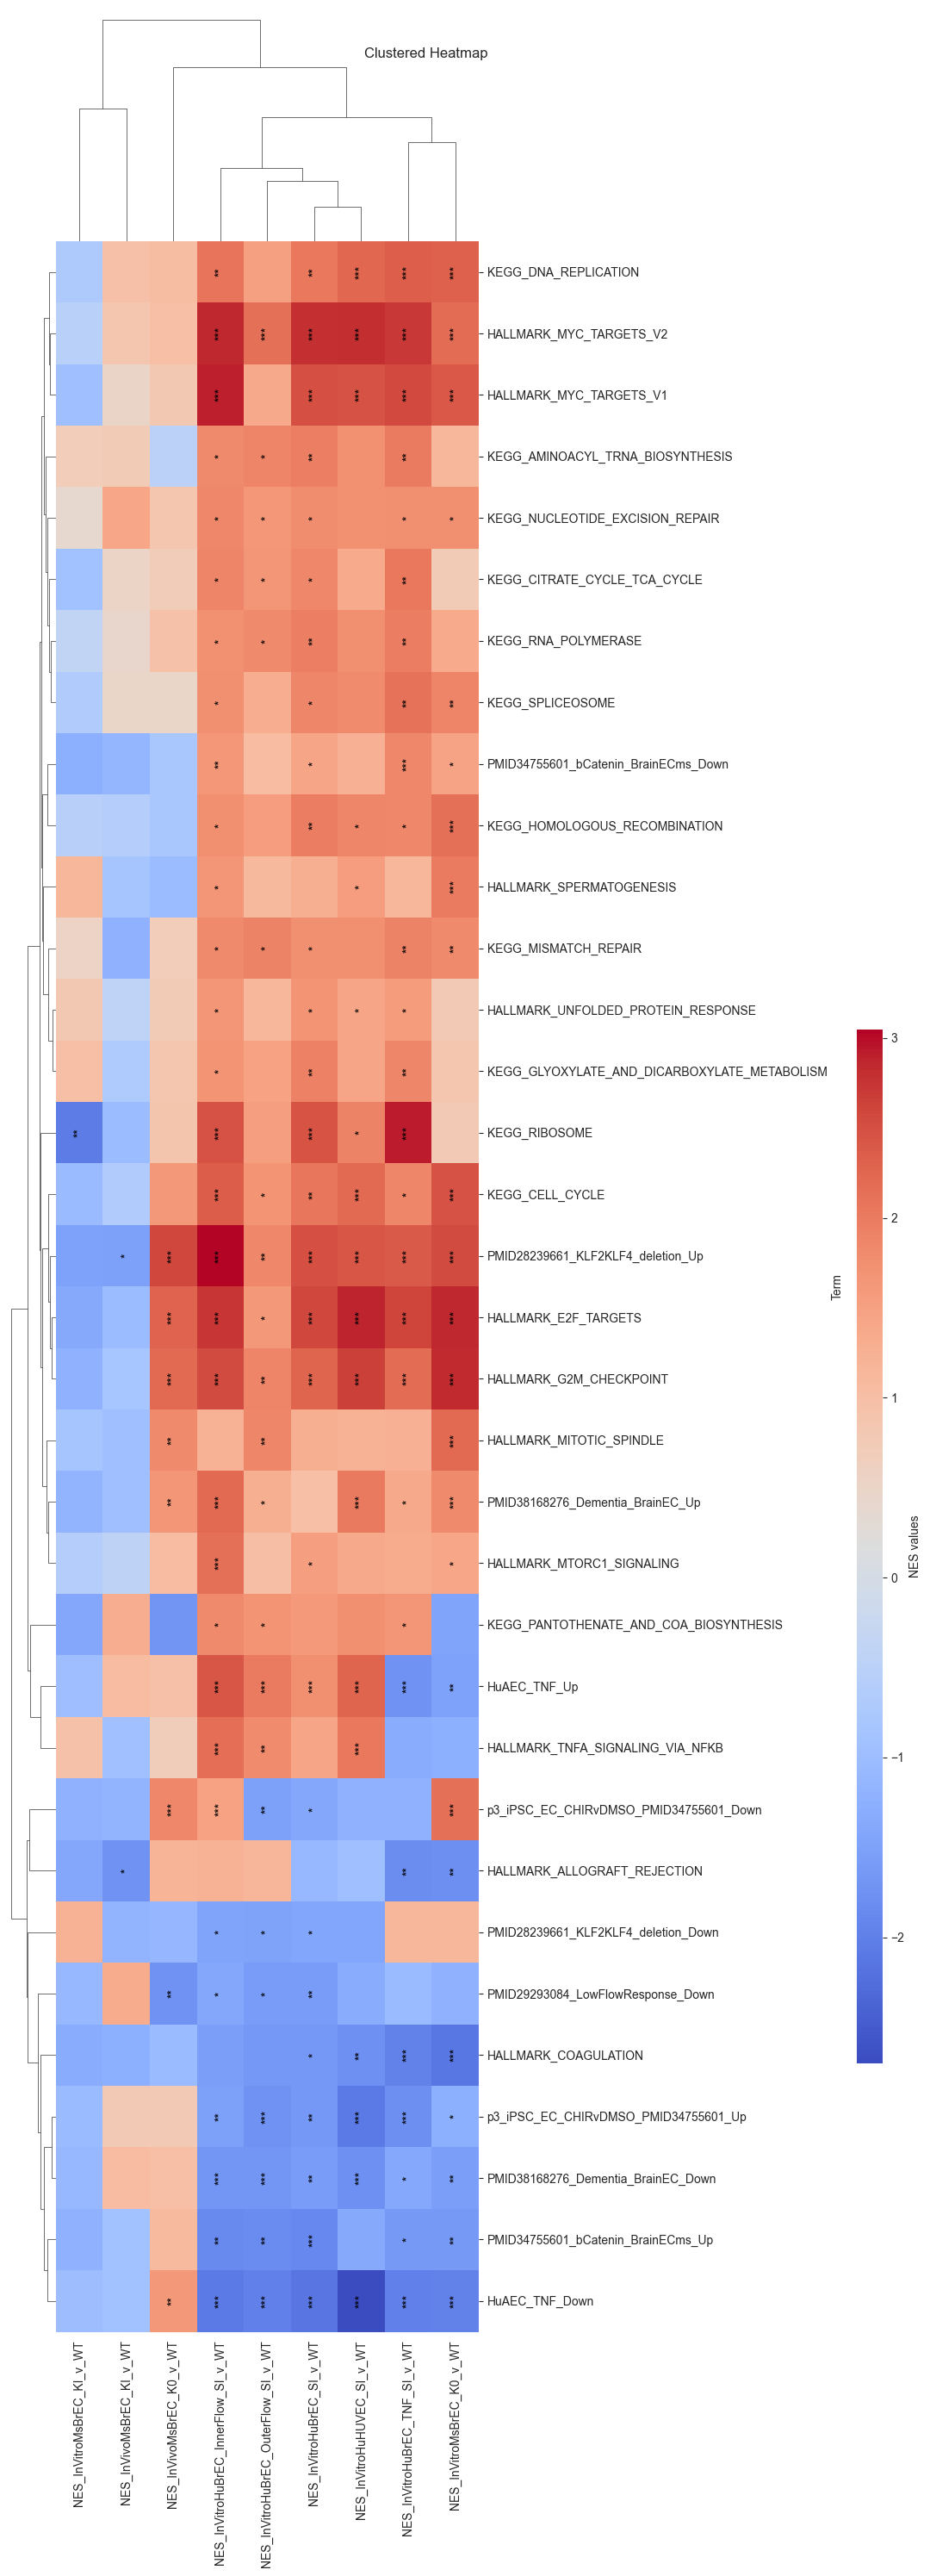

In [158]:
#This is all of the data, and used for string diagram

# List of FWER columns in the merged dataframe
fw_cols = [col for col in combined_df.columns if 'q-val' in col]

# List of direction columns (assuming they are 'NES' columns for example)
direction_cols = [col for col in combined_df.columns if 'NES' in col]

# Create a mask for rows with q-value < 0.1 in at least one datasets
qval_mask = (combined_df[fw_cols] < 0.05).sum(axis=1) >= 3

# For direction, count the number of positive and negative values in direction_cols
positive_counts = (combined_df[direction_cols] > 0).sum(axis=1)
negative_counts = (combined_df[direction_cols] < 0).sum(axis=1)

# Create masks for rows where the count of positive values or negative values is greater than 12
positive_direction_mask = positive_counts > 5
negative_direction_mask = negative_counts > 5

# Combine the two masks using bitwise OR operator
direction_mask = positive_direction_mask | negative_direction_mask

# Combine the two masks using bitwise AND operator
final_mask = qval_mask & direction_mask

# Filter the DataFrame based on the combined mask and specific terms
#filter_strings = ["KEGG", "MSigDB", "BrainEC_TardbpSI", "p3", "p1", "CardiacEC", "CarotidEC", "BrainEC_TardbpKO", "BrainEC_TardbpECKO", "BrainEC_TardbpKO", "HuAEC"]  # Replace with your specific strings
#string_mask = combined_df['Term'].str.contains('|'.join(filter_strings))
#final_mask = final_mask & string_mask
filtered_GSEA_df = combined_df[final_mask]

# Example threshold for significance
significance_threshold = 0.05
threshold_1 = 0.01  # Less than this value will get two asterisks
threshold_2 = 0.001  # Less than this value will get three asterisks

# Columns that contain p-values or q-values
pval_qval_columns = [col for col in filtered_GSEA_df.columns if 'q-val' in col]

# Corrected part for creating the significance matrix
significance_matrix = pd.DataFrame(index=filtered_GSEA_df.index, columns=direction_cols)  # Only NES columns needed

# Corrected part for creating the significance matrix
for col in pval_qval_columns:
    q_values = filtered_GSEA_df[col]
    corresponding_nes_col = col.replace('FDR q-val', 'NES')  # Assuming FDR q-val column names map directly to NES
    
    # Assign asterisks based on significance levels
    significance_matrix[corresponding_nes_col] = q_values.apply(
        lambda x: '***' if x < threshold_2 else ('**' if x < threshold_1 else ('*' if x < significance_threshold else '')))

# Select only the NES columns
# Assuming your DataFrame merged_GSEA_df has columns like 'NES_filename'
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols]

# Replace NaN values with 0
data_for_heatmap = data_for_heatmap.fillna(0)

# Transpose the data
transposed_data_for_heatmap = data_for_heatmap.T

# Create the clustered heatmap
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='coolwarm', 
    figsize=(10, 30),
    cbar_kws={"label": "NES values", "shrink": 0.5},
    xticklabels=True, 
    yticklabels=True,
    dendrogram_ratio=(.1, .1),  # Adjust the size of the dendrogram
    cbar_pos=(1, .2, .03, .4)   # Adjust the position of the colorbar
)

# Get the order of rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the significance matrix to match the clustered heatmap
reordered_significance_matrix = significance_matrix.iloc[row_order, col_order]

# Add asterisks to the heatmap
for y in range(data_for_heatmap.shape[0]):
    for x in range(data_for_heatmap.shape[1]):
        asterisks = reordered_significance_matrix.iloc[y, x]
        if asterisks:  # Only add text if there are asterisks
            g.ax_heatmap.text(x + 0.5, y + 0.5, asterisks, ha='center', va='center', color='black', fontsize=10, rotation=90)

# Save the figure to a PDF file
file_path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/DataGSEA.pdf'
with PdfPages(file_path) as pdf:
    g.fig.suptitle('Clustered Heatmap')  # Add a title if needed
    pdf.savefig(g.fig, dpi=600, bbox_inches='tight')

# Display the plot
plt.show()

# Plot overlap in terms

In [159]:
# Find the length of the longest list
max_lengthKEGG = max(len(lst) for lst in KEGG_2023_Human_Ms.values())
max_lengthHallmark = max(len(lst) for lst in MSigDB_Hallmark_2023_Ms.values())

# Pad shorter lists with NaN
for key in KEGG_2023_Human_Ms.keys():
    length_difference = max_lengthKEGG - len(KEGG_2023_Human_Ms[key])
    if length_difference > 0:
        KEGG_2023_Human_Ms[key].extend([float('nan')] * length_difference)

for key in MSigDB_Hallmark_2023_Ms.keys():
    length_difference = max_lengthHallmark - len(MSigDB_Hallmark_2023_Ms[key])
    if length_difference > 0:
        MSigDB_Hallmark_2023_Ms[key].extend([float('nan')] * length_difference)
        
# Convert dict to df
df_KEGG_2023_Human_Ms = pd.DataFrame.from_dict(KEGG_2023_Human_Ms)
df_MSigDB_Hallmark_2023_Ms = pd.DataFrame.from_dict(MSigDB_Hallmark_2023_Ms)

# Combine custom dataframes
GSEAterms_df = pd.concat([df_mouse, df_human_MmGeneID, df_KEGG_2023_Human_Ms, df_MSigDB_Hallmark_2023_Ms], axis=1)

# Get the list of index values from data_for_heatmap
index_values_to_keep = data_for_heatmap.index.tolist()

# Filter GSEAterms_df to include only columns whose names match the terms
GSEAterms_df_filtered = GSEAterms_df[GSEAterms_df.columns.intersection(index_values_to_keep)]

In [160]:
data_for_heatmap

NES_InVitroHuBrEC_SI_v_WT  \
Term                                                                      
PMID28239661_KLF2KLF4_deletion_Up                              2.487560   
PMID34755601_bCatenin_BrainECms_Up                            -1.883303   
PMID29293084_LowFlowResponse_Down                             -1.584280   
PMID34755601_bCatenin_BrainECms_Down                           1.446770   
PMID28239661_KLF2KLF4_deletion_Down                           -1.431139   
HuAEC_TNF_Down                                                -2.140426   
HuAEC_TNF_Up                                                   1.753065   
p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up                          -1.667083   
PMID38168276_Dementia_BrainEC_Down                            -1.587102   
p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down                        -1.413076   
PMID38168276_Dementia_BrainEC_Up                               1.000000   
HALLMARK_MYC_TARGETS_V2                                        2.798651   
HALLMARK_E2F_TARGETS                                           2.587688   
HALLMARK_MYC_TARGETS_V1                                        2.494546   
HALLMARK_G2M_CHECKPOINT                                        2.269373   
HALLMARK_UNFOLDED_PROTEIN_RESPONSE                             1.691261   
HALLMARK_COAGULATION                                          -1.651300   
HALLMARK_MTORC1_SIGNALING                                      1.525180   
HALLMARK_TNFA_SIGNALING_VIA_NFKB                               1.445155   
HALLMARK_SPERMATOGENESIS                                       1.294135   
HALLMARK_MITOTIC_SPINDLE                                       1.288645   
HALLMARK_ALLOGRAFT_REJECTION                                  -1.107036   
KEGG_RIBOSOME                                                  2.452557   
KEGG_CELL_CYCLE                                                2.068879   
KEGG_DNA_REPLICATION                                           2.051167   
KEGG_HOMOLOGOUS_RECOMBINATION                                  1.983000   
KEGG_RNA_POLYMERASE                                            1.959492   
KEGG_AMINOACYL_TRNA_BIOSYNTHESIS                               1.958373   
KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM                   1.931656   
KEGG_SPLICEOSOME                                               1.871557   
KEGG_CITRATE_CYCLE_TCA_CYCLE                                   1.835806   
KEGG_NUCLEOTIDE_EXCISION_REPAIR                                1.771194   
KEGG_MISMATCH_REPAIR                                           1.757705   
KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS                         1.594207   

                                              NES_InVitroHuBrEC_InnerFlow_SI_v_WT  \
Term                                                                                
PMID28239661_KLF2KLF4_deletion_Up                                        3.046932   
PMID34755601_bCatenin_BrainECms_Up                                      -1.861664   
PMID29293084_LowFlowResponse_Down                                       -1.400942   
PMID34755601_bCatenin_BrainECms_Down                                     1.643306   
PMID28239661_KLF2KLF4_deletion_Down                                     -1.446065   
HuAEC_TNF_Down                                                          -2.075977   
HuAEC_TNF_Up                                                             2.418998   
p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up                                    -1.524528   
PMID38168276_Dementia_BrainEC_Down                                      -1.686646   
p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down                                   1.492924   
PMID38168276_Dementia_BrainEC_Up                                         2.229388   
HALLMARK_MYC_TARGETS_V2                                                  2.858558   
HALLMARK_E2F_TARGETS                                                     2.734433   
HALLMARK_MYC_TARGETS_V1                                               

In [161]:
GSEAterms_df_filtered

PMID29293084_LowFlowResponse_Down PMID28239661_KLF2KLF4_deletion_Up  \
0                           Serpina1b                             Cxcl3   
1                               Klk10                           Slc26a9   
2                               Cidea                           Tmem212   
3                               Cox8b                           Gm15340   
4                             Cyp2b10                              Gkn1   
..                                ...                               ...   
681                               NaN                               NaN   
682                               NaN                               NaN   
683                               NaN                               NaN   
684                               NaN                               NaN   
685                               NaN                               NaN   

    PMID28239661_KLF2KLF4_deletion_Down PMID34755601_bCatenin_BrainECms_Down  \
0                               Gm22245                               Raet1b   
1                               Kcnd3os                                Crhbp   
2                         4732463B04Rik                             BC018473   
3                                Cyp1a1                               Gm6654   
4                                 Ces1e                                Lars2   
..                                  ...                                  ...   
681                                 NaN                                  NaN   
682                                 NaN                                  NaN   
683                                 NaN                                  NaN   
684                                 NaN                                  NaN   
685                                 NaN                                  NaN   

    PMID34755601_bCatenin_BrainECms_Up PMID38168276_Dementia_BrainEC_Up  \
0                                 Esr1                             Hmmr   
1                               Grin2a                       AC008735.2   
2                               Cdkn2a                             Aox1   
3                                 Fosb                            Vgll3   
4                               Gm4841                            Cenpu   
..                                 ...                              ...   
681                                NaN                              NaN   
682                                NaN                              NaN   
683                                NaN                              NaN   
684                                NaN                              NaN   
685                                NaN                              NaN   

    PMID38168276_Dementia_BrainEC_Down p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up  \
0                                Stag3                               Apcdd1   
1                               Timm21                                 Dkk2   
2                           AC231533.1                                  Lpl   
3                                 Fggy                                Pcsk2   
4                                  NaN                                  Lsr   
..                                 ...                                  ...   
681                         AL033504.1                                  NaN   
682                               Fosb                                  NaN   
683                         AC007611.1                                  NaN   
684                         AL591518.1                                  NaN   
685                                NaN                                  NaN   

    p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down HuAEC_TNF_Up HuAEC_TNF_Down  \
0                                   Col1a1         Csf2          Mmrn1   
1                                   Col1a2       Ifitm6          Pald1   
2                                     Thy1         Tymp           Emcn

In [162]:
# Create an empty dictionary with current column names as keys
column_mapping = {col: None for col in GSEAterms_df_filtered.columns}

# Print the dictionary with both key and value in quotes on a new line
for key, value in column_mapping.items():
    print(f'"{key}": "{value}",')

"PMID29293084_LowFlowResponse_Down": "None",
"PMID28239661_KLF2KLF4_deletion_Up": "None",
"PMID28239661_KLF2KLF4_deletion_Down": "None",
"PMID34755601_bCatenin_BrainECms_Down": "None",
"PMID34755601_bCatenin_BrainECms_Up": "None",
"PMID38168276_Dementia_BrainEC_Up": "None",
"PMID38168276_Dementia_BrainEC_Down": "None",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up": "None",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down": "None",
"HuAEC_TNF_Up": "None",
"HuAEC_TNF_Down": "None",
"KEGG_AMINOACYL_TRNA_BIOSYNTHESIS": "None",
"KEGG_CELL_CYCLE": "None",
"KEGG_CITRATE_CYCLE_TCA_CYCLE": "None",
"KEGG_DNA_REPLICATION": "None",
"KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM": "None",
"KEGG_HOMOLOGOUS_RECOMBINATION": "None",
"KEGG_MISMATCH_REPAIR": "None",
"KEGG_NUCLEOTIDE_EXCISION_REPAIR": "None",
"KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS": "None",
"KEGG_RIBOSOME": "None",
"KEGG_RNA_POLYMERASE": "None",
"KEGG_SPLICEOSOME": "None",
"HALLMARK_ALLOGRAFT_REJECTION": "None",
"HALLMARK_COAGULATION": "None",
"HALLMARK_

In [163]:
# Create a dictionary to map old column names to new column names
column_mapping = {"PMID29293084_LowFlowResponse_Down": "PMID29293084_LowFlowResponse_Down",
"PMID28239661_KLF2KLF4_deletion_Up": "PMID28239661_KLF2KLF4_deletion_Up",
"PMID34755601_bCatenin_BrainECms_Down": "PMID34755601_bCatenin_BrainECms_Down",
"PMID34755601_bCatenin_BrainECms_Up": "PMID34755601_bCatenin_BrainECms_Up",
"PMID34755601_bCatenin_BrainEC_Up": "PMID34755601_bCatenin_BrainEC_Up",
"PMID34755601_bCatenin_p3_iPSC_Up": "PMID34755601_bCatenin_p3_iPSC_Up",
"PMID34755601_bCatenin_p1_iPSC_Up": "PMID34755601_bCatenin_p1_iPSC_Up",
"PMID34755601_bCatenin_p3_iPSC_Down": "PMID34755601_bCatenin_p3_iPSC_Down",
"PMID34755601_bCatenin_p1_iPSC_Down": "PMID34755601_bCatenin_p1_iPSC_Down",
"GSE25145_ErkOE_HUVEC_Up": "GSE25145_ErkOE_HUVEC_Up",
"PMID16341264_KLF2OE_HUVEC_Up": "PMID16341264_KLF2OE_HUVEC_Up",
"PMID38168276_Dementia_BrainEC_Down": "PMID38168276_Dementia_BrainEC_Down",
"KEGG_AMINOACYL_TRNA_BIOSYNTHESIS": "KEGG_AMINOACYL_TRNA_BIOSYNTHESIS",
"KEGG_BASE_EXCISION_REPAIR": "KEGG_BASE_EXCISION_REPAIR",
"KEGG_CELL_CYCLE": "KEGG_CELL_CYCLE",
"KEGG_CITRATE_CYCLE_TCA_CYCLE": "KEGG_CITRATE_CYCLE_TCA_CYCLE",
"KEGG_DNA_REPLICATION": "KEGG_DNA_REPLICATION",
"KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM": "KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM",
"KEGG_HOMOLOGOUS_RECOMBINATION": "KEGG_HOMOLOGOUS_RECOMBINATION",
"KEGG_LYSOSOME": "KEGG_LYSOSOME",
"KEGG_MISMATCH_REPAIR": "KEGG_MISMATCH_REPAIR",
"KEGG_NUCLEOTIDE_EXCISION_REPAIR": "KEGG_NUCLEOTIDE_EXCISION_REPAIR",
"KEGG_OOCYTE_MEIOSIS": "KEGG_OOCYTE_MEIOSIS",
"KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS": "KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS",
"KEGG_RIBOSOME": "KEGG_RIBOSOME",
"KEGG_RNA_POLYMERASE": "KEGG_RNA_POLYMERASE",
"KEGG_SPLICEOSOME": "KEGG_SPLICEOSOME",
"HALLMARK_ALLOGRAFT_REJECTION": "HALLMARK_ALLOGRAFT_REJECTION",
"HALLMARK_COAGULATION": "HALLMARK_COAGULATION",
"HALLMARK_E2F_TARGETS": "HALLMARK_E2F_TARGETS",
"HALLMARK_G2M_CHECKPOINT": "HALLMARK_G2M_CHECKPOINT",
"HALLMARK_MITOTIC_SPINDLE": "HALLMARK_MITOTIC_SPINDLE",
"HALLMARK_MYC_TARGETS_V1": "HALLMARK_MYC_TARGETS_V1",
"HALLMARK_MYC_TARGETS_V2": "HALLMARK_MYC_TARGETS_V2",
"HALLMARK_SPERMATOGENESIS": "HALLMARK_SPERMATOGENESIS",
"HALLMARK_TNFA_SIGNALING_VIA_NFKB": "HALLMARK_TNFA_SIGNALING_VIA_NFKB",
"HALLMARK_UNFOLDED_PROTEIN_RESPONSE": "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"}

# Create a copy of GSEAterms_df_filtered
GSEAterms_df_filtered_copy = GSEAterms_df_filtered.copy()

# Use the rename method to replace column names in the copy
GSEAterms_df_filtered_copy.rename(columns=column_mapping, inplace=True)

In [164]:
GSEAterms_df_filtered_copy

PMID29293084_LowFlowResponse_Down PMID28239661_KLF2KLF4_deletion_Up  \
0                           Serpina1b                             Cxcl3   
1                               Klk10                           Slc26a9   
2                               Cidea                           Tmem212   
3                               Cox8b                           Gm15340   
4                             Cyp2b10                              Gkn1   
..                                ...                               ...   
681                               NaN                               NaN   
682                               NaN                               NaN   
683                               NaN                               NaN   
684                               NaN                               NaN   
685                               NaN                               NaN   

    PMID28239661_KLF2KLF4_deletion_Down PMID34755601_bCatenin_BrainECms_Down  \
0                               Gm22245                               Raet1b   
1                               Kcnd3os                                Crhbp   
2                         4732463B04Rik                             BC018473   
3                                Cyp1a1                               Gm6654   
4                                 Ces1e                                Lars2   
..                                  ...                                  ...   
681                                 NaN                                  NaN   
682                                 NaN                                  NaN   
683                                 NaN                                  NaN   
684                                 NaN                                  NaN   
685                                 NaN                                  NaN   

    PMID34755601_bCatenin_BrainECms_Up PMID38168276_Dementia_BrainEC_Up  \
0                                 Esr1                             Hmmr   
1                               Grin2a                       AC008735.2   
2                               Cdkn2a                             Aox1   
3                                 Fosb                            Vgll3   
4                               Gm4841                            Cenpu   
..                                 ...                              ...   
681                                NaN                              NaN   
682                                NaN                              NaN   
683                                NaN                              NaN   
684                                NaN                              NaN   
685                                NaN                              NaN   

    PMID38168276_Dementia_BrainEC_Down p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up  \
0                                Stag3                               Apcdd1   
1                               Timm21                                 Dkk2   
2                           AC231533.1                                  Lpl   
3                                 Fggy                                Pcsk2   
4                                  NaN                                  Lsr   
..                                 ...                                  ...   
681                         AL033504.1                                  NaN   
682                               Fosb                                  NaN   
683                         AC007611.1                                  NaN   
684                         AL591518.1                                  NaN   
685                                NaN                                  NaN   

    p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down HuAEC_TNF_Up HuAEC_TNF_Down  \
0                                   Col1a1         Csf2          Mmrn1   
1                                   Col1a2       Ifitm6          Pald1   
2                                     Thy1         Tymp           Emcn

In [165]:
# Check for duplicate column names
duplicate_columns = GSEAterms_df_filtered.columns[GSEAterms_df_filtered.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)


Duplicate columns: Index([], dtype='object')


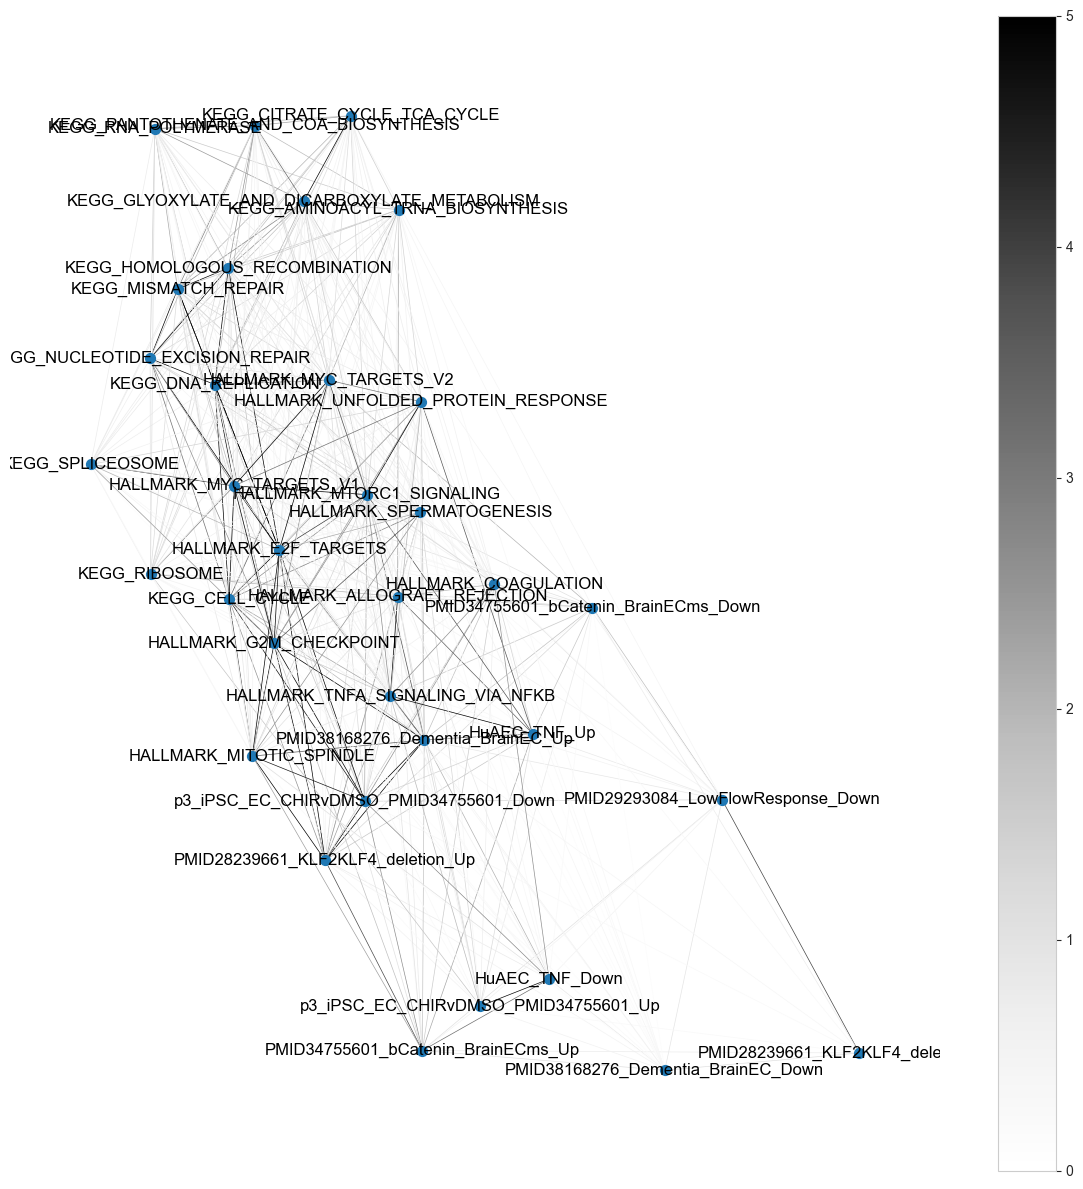

In [166]:
# Create a dictionary to store the mapping between node numbers and term names
node_names = {i: termgsea for i, termgsea in enumerate(GSEAterms_df_filtered_copy.columns)}

G = nx.Graph()

# Add nodes to the graph with numbering and store the mapping
for node, termgsea in node_names.items():
    G.add_node(node, label=termgsea)  # Add node with number and term label

    
# Add edges to the graph based on gene similarities
for i, term1 in enumerate(GSEAterms_df_filtered_copy.columns):
    for j, term2 in enumerate(GSEAterms_df_filtered_copy.columns):
        if i < j:  # Avoid self-loop and redundant connections
            genes1 = set(GSEAterms_df_filtered_copy[term1].dropna())
            genes2 = set(GSEAterms_df_filtered_copy[term2].dropna())
            common_genes = genes1.intersection(genes2)
            total_genes = genes1.union(genes2)
            num_total_genes = len(total_genes)
            num_common_genes = len(common_genes)
            if num_total_genes > 0:  # Avoid division by zero
                percent_overlap = (num_common_genes / num_total_genes) * 100
                if percent_overlap > 0:
                    G.add_edge(i, j, weight=percent_overlap, width=percent_overlap)

    
# Remove isolated nodes (those not connected to any other node)
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

for node in list(G.nodes()):
    if G.degree(node) <= 1:
        G.remove_node(node)

# After modifying the graph (adding/removing nodes and edges)
pos = nx.spring_layout(G)  # Recalculate positions for the updated graph

# Update node_labels only for nodes present in the updated graph
node_labels = {node: node_names[node] for node in G.nodes()}
        
# Now you can draw the graph
fig, ax = plt.subplots(figsize=(15, 15))

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Extracting weights from the graph for edge colors
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Normalize the weights to a fixed range between 0 and 100 for coloring
norm = mcolors.Normalize(vmin=0, vmax=5)  # set fixed scale here

# Choose a colormap
cmap = plt.cm.Greys  # using Greys colormap for black and grey color scale

# Draw the graph with term labels
node_labels = {node: label for node, label in node_names.items()}
nx.draw(G, pos, labels=node_labels, with_labels=True,
        font_size=12,  # Adjust font size as needed
        edge_color=[cmap(norm(w)) for w in weights],
        width=0.5,  # Fixed thin width
        node_size=50,  # Adjust node size as needed
        ax=ax)

# Optionally, you can add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax)

# Save the figure to a file on your desktop
file_path = f'/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/Networkx_DataGSEA.pdf'
plt.savefig(file_path, dpi=600, format='pdf')

# Display the plot
plt.show()

In [167]:
node_labels

{0: 'PMID29293084_LowFlowResponse_Down',
 1: 'PMID28239661_KLF2KLF4_deletion_Up',
 2: 'PMID28239661_KLF2KLF4_deletion_Down',
 3: 'PMID34755601_bCatenin_BrainECms_Down',
 4: 'PMID34755601_bCatenin_BrainECms_Up',
 5: 'PMID38168276_Dementia_BrainEC_Up',
 6: 'PMID38168276_Dementia_BrainEC_Down',
 7: 'p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up',
 8: 'p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down',
 9: 'HuAEC_TNF_Up',
 10: 'HuAEC_TNF_Down',
 11: 'KEGG_AMINOACYL_TRNA_BIOSYNTHESIS',
 12: 'KEGG_CELL_CYCLE',
 13: 'KEGG_CITRATE_CYCLE_TCA_CYCLE',
 14: 'KEGG_DNA_REPLICATION',
 15: 'KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM',
 16: 'KEGG_HOMOLOGOUS_RECOMBINATION',
 17: 'KEGG_MISMATCH_REPAIR',
 18: 'KEGG_NUCLEOTIDE_EXCISION_REPAIR',
 19: 'KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS',
 20: 'KEGG_RIBOSOME',
 21: 'KEGG_RNA_POLYMERASE',
 22: 'KEGG_SPLICEOSOME',
 23: 'HALLMARK_ALLOGRAFT_REJECTION',
 24: 'HALLMARK_COAGULATION',
 25: 'HALLMARK_E2F_TARGETS',
 26: 'HALLMARK_G2M_CHECKPOINT',
 27: 'HALLMARK_MITOTIC_SPINDLE',
 

# Show individual GSEA plots

In [58]:
###NOTE to plot GSEA terms, need to use the correct results (from merging above)

## Run gsea on pval filtered data

In [168]:
# Define a dictionary of DataFrames
df_dict = {
    #'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    #'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    #'InVitroHuBrEC_SI_v_WT_res': InVitroHuBrEC_SI_v_WT_res,
    #'InVitroHuBrEC_Inner_siTDP43vWT_res': InVitroHuBrEC_Inner_siTDP43vWT_res,
    #'InVitroHuBrEC_TNF_siTDP43vWT_res': InVitroHuBrEC_TNF_siTDP43vWT_res,
    #'InVitroHuBrEC_SI_v_WT_outer_res': InVitroHuBrEC_SI_v_WT_outer_res,
    #'InVitroHuHUVEC_SI_v_WT_res': InVitroHuHUVEC_SI_v_WT_res,
    #'InVivoMsBrEC_KI_v_WT_res': InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res': InVivoMsBrEC_KO_v_WT_res,
}

# Initialize a new dictionary for ranked DataFrames
new_df_dict = {}

# Iterating through each DataFrame in the original dictionary
for name, df in df_dict.items():
    # Filter DataFrame based on `baseMean` and `pvalue`
    filtered_df = df[(df['baseMean'] >= 5) & (df['pvalue'] <= 0.05)]
    
    # Check if the filtered DataFrame has data
    if filtered_df.empty:
        print(f"No data in DataFrame {name} after filtering with baseMean >= 5 and pvalue <= 0.05")
        continue
    
    # Sort by 'log2FoldChange' in descending order
    ranked_df = filtered_df[['log2FoldChange']].sort_values(by='log2FoldChange', ascending=False)
    
    # Remove the column name (for GSEA format)
    ranked_df.columns = ['']
    
    # Generate a new name for the DataFrame
    new_name = name.replace('_res', '_Log2FC_pval')
    
    # Add the ranked DataFrame to the new dictionary
    new_df_dict[new_name] = ranked_df

# Assign each DataFrame in `new_df_dict` to a variable with its name
for name, df in new_df_dict.items():
    globals()[name] = df

In [169]:
InVivoMsBrEC_KO_v_WT_Log2FC_pval

DBH      26.021822
SHCBP1   23.050606
PIMREG   10.132118
ACKR2    10.045726
BUB1B     9.638707
...            ...
ACTG2    -7.672951
PPP1R3G  -8.655772
SBK2    -20.981423
HCK     -21.358838
PTGER3  -22.315282

[1149 rows x 1 columns]

In [170]:
# Assume df_list is your list of DataFrames
df_list = [
            InVivoMsBrEC_KO_v_WT_Log2FC_pval, 
    ]

# Corresponding list of names for the output
df_names = [
            'InVivoMsBrEC_KO_v_WT_Log2FC_pval', 
    ]

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=MSigDB_Hallmark_2023,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_hallmark_pval'] = results

2025-01-09 13:59:36,131 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2025-01-09 13:59:36,139 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2025-01-09 13:59:36,147 [INFO] Parsing data files for GSEA.............................
2025-01-09 13:59:36,149 [INFO] 0012 gene_sets have been filtered out when max_size=1000 and min_size=5
2025-01-09 13:59:36,149 [INFO] 0038 gene_sets used for further statistical testing.....
2025-01-09 13:59:36,150 [INFO] Start to run GSEA...Might take a while..................
2025-01-09 13:59:36,230 [INFO] Congratulations. GSEApy runs successfully................



## Plot GSEA results

Top 5 Upregulated Pathways (with NES < 0 and >20 genes):

Pathway: PMID28239661_KLF2KLF4_deletion_Up
FDR q-value: 0.0
Leading-edge genes: Shcbp1;Cdca5;Cep55;Parpbp;Troap;Hmmr;Kntc1;Tpx2;Melk;Disp2;Dlgap5;Neil3;Ska1;Anln;Vsig8;Kif18b;Cdca8;Aurkb;Kif11;Cdk1;Cenpf;Plk1;Ube2c;AA467197;Bub1;Nuf2;Apln;Vdr;Kif2c;Ckap2l;Efcab11;Tnfrsf9;Birc5;Mki67;Ccnf;Spag5;Cdkn3;Rhbdl2;Ttk;Cenpw;Prc1;Dbn1;Kif15;Gas2l3;Ccnb1;Pbk;Ccna2;Kif20a;Ccnb2;Pgf;Mgarp;Mastl;Ncapg;Slc16a6;Pif1;Top2a;Serpine1;Prr11;Kif22;C330027C09Rik;Sh2d5;Aurka;Fam167a;Depdc1a

Pathway: PMID34755601_bCatenin_BrainECms_Up
FDR q-value: 0.2916514764855997
Leading-edge genes: Gm4841;Ces2c;Col6a3;Lgi4;Fam19a3;Esr1;Cenpf;Slc15a3;Kif20b;Mki67;Cxcr4;Slfn9;Doc2b;Bhlhe41;Kif15;Aspm;Top2a;Gda;Postn;Nr5a2;Fam167a


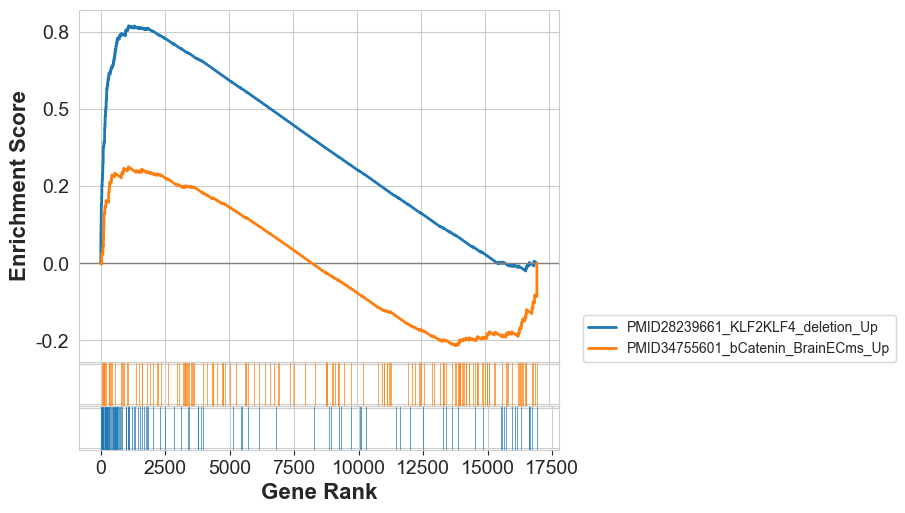

In [171]:
df = InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom

# Extract the number of genes in each set from the "Tag %" column
df.res2d["Gene_Count"] = (
    df.res2d["Tag %"]
    .str.extract(r"(\d+)/\d+")[0]  # Extract the number of genes found
    .astype(int)                    # Convert to integer
)

# Filter for pathways with NES < 0 and more than 20 genes
filtered_results = df.res2d[
    (df.res2d["NES"] > 0) &
    (df.res2d["Gene_Count"] > 10)
]

# Sort the results by "NOM p-val" in ascending order (smaller values indicate higher significance)
sorted_results = filtered_results.sort_values(by="NOM p-val", ascending=True)

# Select the top 5 pathways
top_upregulated = sorted_results.head(10)

# Extract and print the leading-edge genes and FDR for each pathway
print("Top 5 Upregulated Pathways (with NES < 0 and >20 genes):")
for index, row in top_upregulated.iterrows():
    pathway_name = row["Term"]
    leading_genes = row["Lead_genes"].split(",")  # Adjust delimiter if needed
    fdr_value = row["FDR q-val"]
    print(f"\nPathway: {pathway_name}")
    print(f"FDR q-value: {fdr_value}")
    print(f"Leading-edge genes: {', '.join(leading_genes)}")

# Plot the top 5 pathways
terms_to_plot = top_upregulated["Term"]
axs = df.plot(
    terms_to_plot,
    show_ranking=False,
    legend_kws={'loc': (1.05, 0)}
)

Top 5 Downregulated Pathways (with NES < 0 and >10 genes):

Pathway: PMID29293084_LowFlowResponse_Down
FDR q-value: 0.009824992324224747
Leading-edge genes: Aspg;Serpina1e;Plin5;Adra2a;Dnaic1;Adcy5;C1qtnf2;Ppp1r1a;Fam47e;Sema3d;Ptgs1;Tppp;Cyp2e1;Thpo;Arhgef16;Tcf23;Kctd1;Hr;Obscn;Cytl1;Ppp2r2b;Gpx3;Igf2;Cd19;Stmn2;Adhfe1;Prrt4;Atp2b2;Plekha6;Sycp3;Cabp1;St6galnac2;Igfbp5;Rbp7;Chrd;Pparg;Stra6;Syt7;Mustn1;Gpd1;Hspa12a;Mgll;Serpina1b;Ip6k3;Fam107a;Id4;Atp1a2;Amigo2;Myrip;Apoc1;Fgf18;Mettl7a1;Spon1;Ptprj;Fgfr3;Cryab;Pthlh;Icam4;Sult1a1

Pathway: PMID29293084_LowFlowResponse_Up
FDR q-value: 0.04728277556033159
Leading-edge genes: Trem1;Il1rn;Hck;Cd177;Slfn1;Mmp9;Cxcr2;Fgr;Cd300lf;Cd33;S100a9;S100a8;Clec7a;Cyp4f18;Ccr1;Ncf4;Csf3r;Slpi;Pilra;Gpr183;Cd53;Ptpn6;Il1b;Arg2;F630028O10Rik;Ptprc;Tlr13;Fcgr3;Sell;Tubb3;Ngf

Pathway: PMID28239661_KLF2KLF4_deletion_Down
FDR q-value: 0.3143997543751919
Leading-edge genes: Serpina1e;Mlxipl;Stk32b;Nog;Mylk4;Cfap61;Lmntd1;Myadml2os;Tcf23;Cytl1;Gucy2d;Sbsp

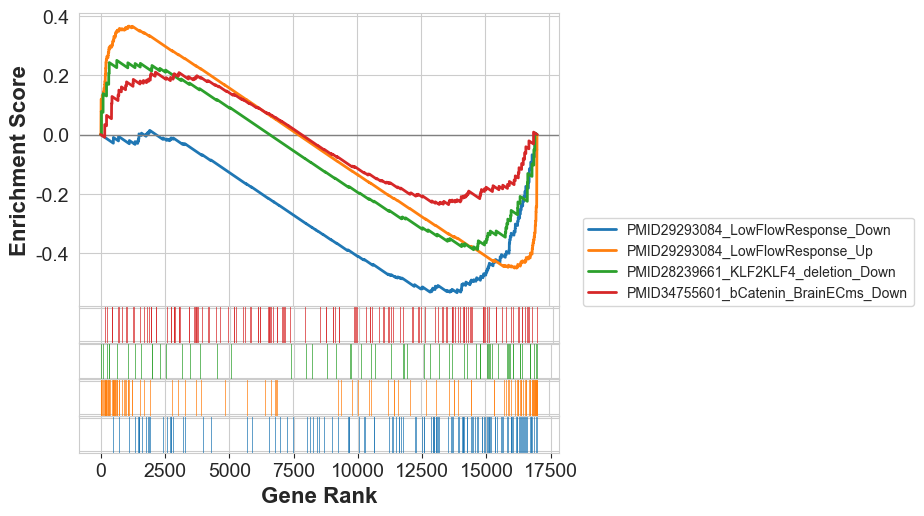

In [172]:
df=InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom

# Extract the number of genes in each set from the "Tag %" column
df.res2d["Gene_Count"] = (
    df.res2d["Tag %"]
    .str.extract(r"(\d+)/\d+")[0]  # Extract the number of genes found
    .astype(int)                    # Convert to integer
)

# Filter for pathways with NES < 0 and more than 10 genes
filtered_results = df.res2d[
    (df.res2d["NES"] < 0) &  # Focus on downregulated pathways
    (df.res2d["Gene_Count"] > 5)
]

# Sort the results by "NOM p-val" in ascending order (smaller values indicate higher significance)
sorted_results = filtered_results.sort_values(by="NOM p-val", ascending=True)

# Select the top 5 pathways
top_downregulated = sorted_results.head(10)

# Display results: Leading-edge genes and FDR for each pathway
print("Top 5 Downregulated Pathways (with NES < 0 and >10 genes):")
for index, row in top_downregulated.iterrows():
    pathway_name = row["Term"]
    leading_genes = row["Lead_genes"].split(",")  # Adjust delimiter if needed
    fdr_value = row["FDR q-val"]
    print(f"\nPathway: {pathway_name}")
    print(f"FDR q-value: {fdr_value}")
    print(f"Leading-edge genes: {', '.join(leading_genes)}")

# Plot the top 5 pathways
terms_to_plot = top_downregulated["Term"]
axs = df.plot(
    terms_to_plot,
    show_ranking=False,
    legend_kws={'loc': (1.05, 0)}  # Adjust legend position if needed
)

Top 5 Upregulated Pathways (with NES < 0 and >20 genes):

Pathway: p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down
NES_value: 1.8408299827467012
FDR q-value: 0.0
Leading-edge genes: Shcbp1;Bub1b;Cep55;Hmmr;Pcsk6;Tpx2;Melk;Dlgap5;Cdca8;Aurkb;Kif11;Cdk1;Plk1;Ube2c;Racgap1;Kit;Bub1;F2rl3;Dtl;Rad51;Mki67;Ccnf;C1qtnf6;Spag5;Nusap1;Prc1;Itga4;Ccnb1;Trip13;Ccna2;Kif20a;Ccnb2;Oaf;Kdelr3;Sirpa;Creb3l1;Fxyd6;Ncapg;Top2a;Adgrl3;Pcdh10;Postn

Pathway: PMID38168276_Dementia_BrainEC_Up
NES_value: 1.6729755796985004
FDR q-value: 0.0011450381679389313
Leading-edge genes: Shcbp1;Cdca5;Bub1b;Cep55;Troap;Hmmr;Tpx2;Melk;Slco4a1;Itgbl1;Dlgap5;Neil3;Adamts6;Kif18b;Col6a3;Aurkb;Kif11;Cdk1;F8;Pclaf;Cenpf;Plk1;Racgap1;Bub1;Knl1;Lama1;Nuf2;Kif2c;Ckap2l;F2rl3;Adamts2;Dtl;Rad51;Birc5;Kif20b;Mki67;Pxdn;Cd276;Ptk7;Lamb1;Nusap1;Hcls1;Ttk;Rab27b;Cdca2;Upp1;Fanca;Ccnb1;Pbk;Pde3a;Fign;Creb3l1;Atic;Cd74;Ncapg;Cdca3;Gtse1;Aspm;Ifit2;Top2a;Meis2;Ubash3b;Mybl1;Nudt15;Serpine1;Prr11;Fancb;Aurka;Depdc1a;Bicc1;Tk1;Diaph2;Sparc;Cenpq;T

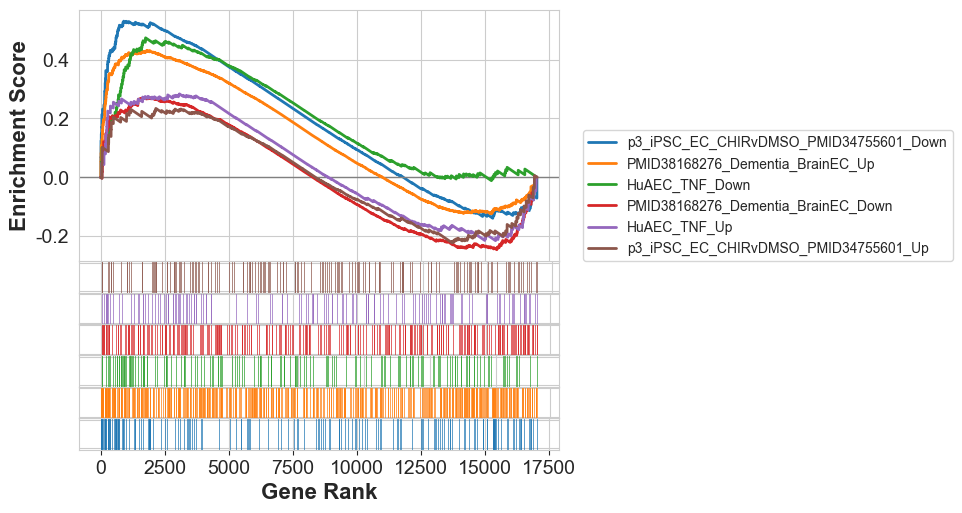

In [173]:
df = InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2

# Extract the number of genes in each set from the "Tag %" column
df.res2d["Gene_Count"] = (
    df.res2d["Tag %"]
    .str.extract(r"(\d+)/\d+")[0]  # Extract the number of genes found
    .astype(int)                    # Convert to integer
)

# Filter for pathways with NES < 0 and more than 20 genes
filtered_results = df.res2d[
    (df.res2d["NES"] > 0) &
    (df.res2d["Gene_Count"] > 10)
]

# Sort the results by "NOM p-val" in ascending order (smaller values indicate higher significance)
sorted_results = filtered_results.sort_values(by="NOM p-val", ascending=True)

# Select the top 5 pathways
top_upregulated = sorted_results.head(10)

# Extract and print the leading-edge genes and FDR for each pathway
print("Top 5 Upregulated Pathways (with NES < 0 and >20 genes):")
for index, row in top_upregulated.iterrows():
    pathway_name = row["Term"]
    leading_genes = row["Lead_genes"].split(",")  # Adjust delimiter if needed
    fdr_value = row["FDR q-val"]
    NES_value = row["NES"]
    print(f"\nPathway: {pathway_name}")
    print(f"NES_value: {NES_value}")
    print(f"FDR q-value: {fdr_value}")
    print(f"Leading-edge genes: {', '.join(leading_genes)}")

# Plot the top 5 pathways
terms_to_plot = top_upregulated["Term"]
axs = df.plot(
    terms_to_plot,
    show_ranking=False,
    legend_kws={'loc': (1.05, 0)}
)

Top 5 Upregulated Pathways (with NES < 0 and >20 genes):

Pathway: HALLMARK_E2F_TARGETS
FDR q-value: 0.0
Leading-edge genes: Bub1b;Hmmr;Brca1;Cenpm;Melk;Dlgap5;Pole;E2f8;Kif18b;Cdca8;Mxd3;Aurkb;Cdk1;Plk1;Racgap1;Kif2c;Birc5;Mki67;Spag5;Cdkn3;Ube2t;Plk4;Pms2;Trip13;Ccnb2;Mad2l1;Chek1;Rad51ap1;Cdca3;Top2a;Kif22;Aurka;Depdc1a;Cks2;Tk1;Spc24

Pathway: HALLMARK_G2M_CHECKPOINT
FDR q-value: 0.0
Leading-edge genes: Troap;Hmmr;Tpx2;Pole;Aurkb;Kif11;Cdk1;Cenpf;Plk1;Ube2c;Racgap1;Bub1;Knl1;Kif2c;Birc5;Kif20b;Mki67;Ccnf;Cdkn3;Traip;Nusap1;Plk4;Ttk;Prc1;Kif15;Pbk;Ccna2;Ccnb2;Mad2l1;Chek1;Top2a;Meis2;Kif22;Cdc6;Aurka;Cks2;Cdc7;Ccnd1;Lig3;Nek2;E2f1;Prim2;Smad3;Slc12a2;Dbf4;Mybl2;Cdkn2c;Espl1;Tacc3;Smc2;Ccnt1;Odc1;Dmd;E2f3;Hus1;Chaf1a

Pathway: HALLMARK_MITOTIC_SPINDLE
FDR q-value: 0.005175263112116205
Leading-edge genes: Kntc1;Tpx2;Dlgap5;Anln;Kif11;Cdk1;Cenpf;Plk1;Racgap1;Fscn1;Bub1;Kif2c;Birc5;Kif20b;Nusap1;Ttk;Prc1;Kif15;Ccnb2;Pif1;Top2a;Rhof;Kif22;Aurka

Pathway: HALLMARK_GLYCOLYSIS
FDR q-value: 

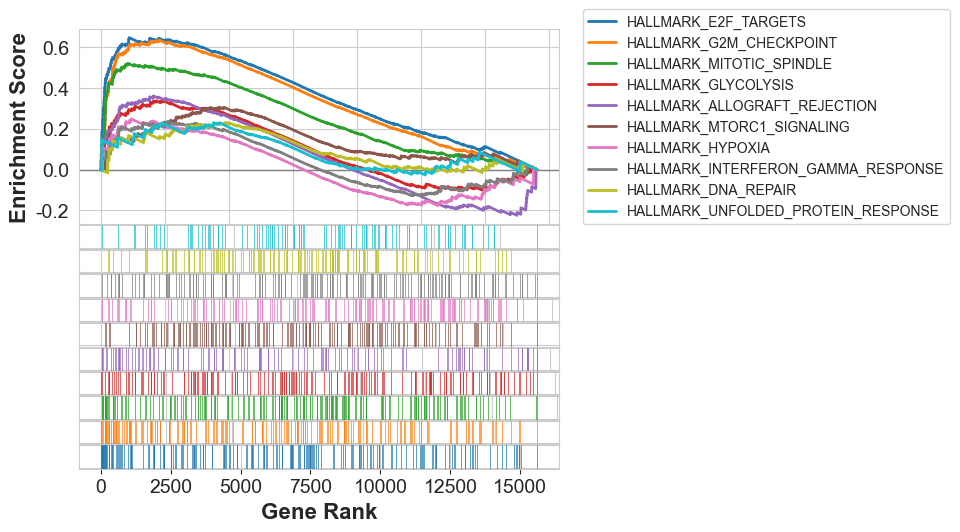

In [175]:
df = InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark

# Extract the number of genes in each set from the "Tag %" column
df.res2d["Gene_Count"] = (
    df.res2d["Tag %"]
    .str.extract(r"(\d+)/\d+")[0]  # Extract the number of genes found
    .astype(int)                    # Convert to integer
)

# Filter for pathways with NES < 0 and more than 20 genes
filtered_results = df.res2d[
    (df.res2d["NES"] > 0) &
    (df.res2d["Gene_Count"] > 10)
]

# Sort the results by "NOM p-val" in ascending order (smaller values indicate higher significance)
sorted_results = filtered_results.sort_values(by="NOM p-val", ascending=True)

# Select the top 5 pathways
top_upregulated = sorted_results.head(10)

# Extract and print the leading-edge genes and FDR for each pathway
print("Top 5 Upregulated Pathways (with NES < 0 and >20 genes):")
for index, row in top_upregulated.iterrows():
    pathway_name = row["Term"]
    leading_genes = row["Lead_genes"].split(",")  # Adjust delimiter if needed
    fdr_value = row["FDR q-val"]
    print(f"\nPathway: {pathway_name}")
    print(f"FDR q-value: {fdr_value}")
    print(f"Leading-edge genes: {', '.join(leading_genes)}")

# Plot the top 5 pathways
terms_to_plot = top_upregulated["Term"]
axs = df.plot(
    terms_to_plot,
    show_ranking=False,
    legend_kws={'loc': (1.05, 0)}
)

Top 5 Downregulated Pathways (with NES < 0 and >10 genes):

Pathway: HALLMARK_KRAS_SIGNALING_UP
FDR q-value: 1.0
NOM p-val: 1.0
Leading-edge genes: Btc;F13a1;Mmp9;Slpi;Il1b;F2rl1;Ngf;Snap91;Snap25;Igf2;Ace;Gucy1a1;Tspan1;Fcer1g;Kif5c;St6gal1;Ccnd2;Sema3b;Bpgm;Scn1b;Kcnn4;Fgf9;Ano1;Adam8;Plvap;Ptgs2;Plek2;Gypc;Cd37;C3ar1;Il33;Spon1;Id2;Gadd45g;Tnfrsf1b;Ank;Laptm5;Tspan7;G0s2;Dcbld2

Pathway: HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
FDR q-value: 0.8684644153151152
NOM p-val: 0.8684644153151152
Leading-edge genes: Sgcd;Spock1;Bdnf;Glipr1;Ptx3;Col12a1;Nnmt;Sfrp1;Fbn1;Dkk1;Col1a2;Loxl1;Fmod;Cd44;Gas1;Pcolce2;Cd59b;Thbs1;Pdlim4;Lama3;Cdh6;Mmp14;Anpep;Lrp1;Cap2;Fbln2;Dcn;Vegfc;Tpm2;Myl9;Gpc1;Sgcb;Sntb1;Il6;Acta2;Fas;Lox;Col8a2;Igfbp4;Snai2;Fbln1;Tgfbr3;Mgp;Igfbp2;Col3a1;Sdc1;Wnt5a;Eln;Pmp22;Lum;Nt5e;Ntm;Itgb5;Magee1;Efemp2;Col1a1;Pthlh;Id2;Notch2;Fzd8;Tgm2;Bgn

Pathway: HALLMARK_IL2_STAT5_SIGNALING
FDR q-value: 0.7012145449159446
NOM p-val: 0.7012145449159446
Leading-edge genes: Il1r2;Cdcp1

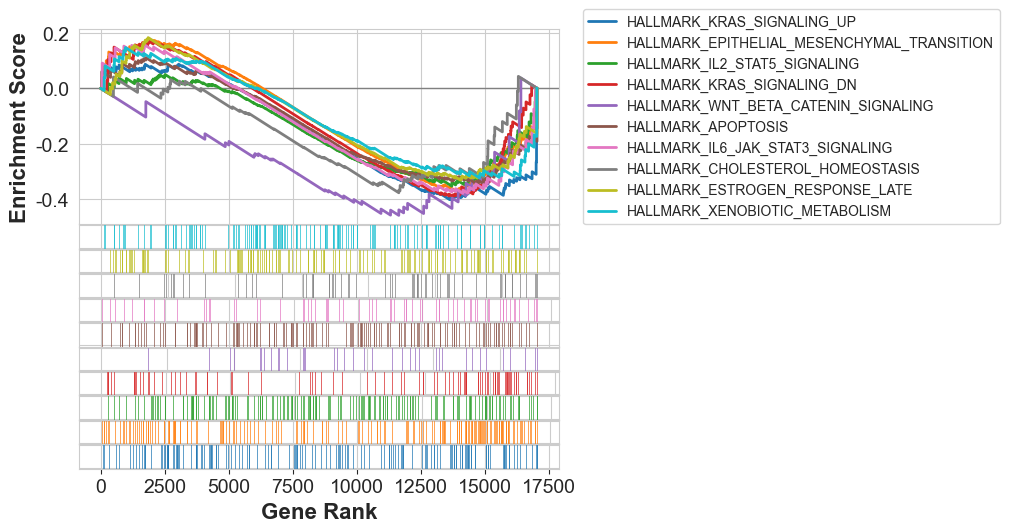

In [654]:
# Extract the number of genes in each set from the "Tag %" column
df.res2d["Gene_Count"] = (
    df.res2d["Tag %"]
    .str.extract(r"(\d+)/\d+")[0]  # Extract the number of genes found
    .astype(int)                    # Convert to integer
)

# Filter for pathways with NES < 0 and more than 10 genes
filtered_results = df.res2d[
    (df.res2d["NES"] < 0) &  # Focus on downregulated pathways
    (df.res2d["Gene_Count"] > 10)
]

# Sort the results by "NOM p-val" in ascending order (smaller values indicate higher significance)
sorted_results = filtered_results.sort_values(by="NOM p-val", ascending=True)

# Select the top 5 pathways
top_downregulated = sorted_results.head(10)

# Display results: Leading-edge genes and FDR for each pathway
print("Top 5 Downregulated Pathways (with NES < 0 and >10 genes):")
for index, row in top_downregulated.iterrows():
    pathway_name = row["Term"]
    leading_genes = row["Lead_genes"].split(",")  # Adjust delimiter if needed
    fdr_value = row["FDR q-val"]
    print(f"\nPathway: {pathway_name}")
    print(f"FDR q-value: {fdr_value}")
    print(f"NOM p-val: {fdr_value}")
    print(f"Leading-edge genes: {', '.join(leading_genes)}")

# Plot the top 5 pathways
terms_to_plot = top_downregulated["Term"]
axs = df.plot(
    terms_to_plot,
    show_ranking=False,
    legend_kws={'loc': (1.05, 0)}  # Adjust legend position if needed
)

In [176]:
InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark.res2d

Name                                        Term        ES       NES  \
0   prerank                        HALLMARK_E2F_TARGETS  0.645789  2.295426   
1   prerank                     HALLMARK_G2M_CHECKPOINT  0.634441  2.231097   
2   prerank                    HALLMARK_MITOTIC_SPINDLE  0.520388  1.824728   
3   prerank                HALLMARK_PANCREAS_BETA_CELLS -0.724939 -1.688401   
4   prerank                  HALLMARK_KRAS_SIGNALING_UP -0.400775 -1.332698   
5   prerank                 HALLMARK_HEDGEHOG_SIGNALING -0.517575 -1.316467   
6   prerank  HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION -0.371013 -1.252084   
7   prerank         HALLMARK_WNT_BETA_CATENIN_SIGNALING -0.457659 -1.238072   
8   prerank                  HALLMARK_KRAS_SIGNALING_DN -0.390356 -1.215365   
9   prerank                HALLMARK_ALLOGRAFT_REJECTION  0.360271  1.201428   
10  prerank                HALLMARK_IL2_STAT5_SIGNALING -0.352393 -1.194711   
11  prerank                         HALLMARK_GLYCOLYSIS  0.336684  1.184889   
12  prerank                          HALLMARK_APOPTOSIS -0.343233 -1.144224   
13  prerank            HALLMARK_IL6_JAK_STAT3_SIGNALING -0.378373 -1.128629   
14  prerank            HALLMARK_CHOLESTEROL_HOMEOSTASIS -0.376205 -1.120922   
15  prerank             HALLMARK_ESTROGEN_RESPONSE_LATE -0.330728 -1.097949   
16  prerank              HALLMARK_XENOBIOTIC_METABOLISM -0.322642 -1.082724   
17  prerank                   HALLMARK_MTORC1_SIGNALING  0.304999  1.058181   
18  prerank                        HALLMARK_COAGULATION -0.338965 -1.052419   
19  prerank                    HALLMARK_SPERMATOGENESIS -0.335161 -1.037113   
20  prerank                    HALLMARK_APICAL_JUNCTION -0.302409 -1.026181   
21  prerank                     HALLMARK_APICAL_SURFACE  -0.39093 -1.013646   
22  prerank              HALLMARK_INFLAMMATORY_RESPONSE -0.304145 -1.009309   
23  prerank                     HALLMARK_MYC_TARGETS_V2   0.34335  0.995325   
24  prerank                         HALLMARK_COMPLEMENT -0.298802 -0.994242   
25  prerank                         HALLMARK_MYOGENESIS  -0.29416 -0.972593   
26  prerank                       HALLMARK_ADIPOGENESIS -0.281248 -0.964543   
27  prerank                     HALLMARK_UV_RESPONSE_DN  -0.28021  -0.93219   
28  prerank    HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY -0.329435 -0.914489   
29  prerank              HALLMARK_FATTY_ACID_METABOLISM -0.270156 -0.896901   
30  prerank                            HALLMARK_HYPOXIA  0.248217  0.864372   
31  prerank                       HALLMARK_ANGIOGENESIS  0.306829  0.829199   
32  prerank          HALLMARK_INTERFERON_GAMMA_RESPONSE  0.236432  0.827738   
33  prerank                     HALLMARK_MYC_TARGETS_V1  0.232377  0.803087   
34  prerank                        HALLMARK_P53_PATHWAY  0.225938   0.79103   
35  prerank                         HALLMARK_DNA_REPAIR   0.23031  0.780603   
36  prerank            HALLMARK_ESTROGEN_RESPONSE_EARLY -0.230153  -0.77388   
37  prerank          HALLMARK_UNFOLDED_PROTEIN_RESPONSE  0.229507  0.747285   
38  prerank                  HALLMARK_ANDROGEN_RESPONSE -0.225031 -0.699499   
39  prerank          HALLMARK_INTERFERON_ALPHA_RESPONSE  -0.22349 -0.689648   
40  prerank            HALLMARK_TNFA_SIGNALING_VIA_NFKB  0.195098   0.67921   
41  prerank            HALLMARK_PI3K_AKT_MTOR_SIGNALING  0.194358  0.626648   
42  prerank               HALLMARK_BILE_ACID_METABOLISM -0.187682 -0.568567   
43  prerank                         HALLMARK_PEROXISOME  0.179065   0.55644   
44  prerank                     HALLMARK_UV_RESPONSE_UP  0.162797  0.549029   
45  prerank                    HALLMARK_HEME_METABOLISM  0.153062  0.533964   
46  prerank                 HALLMARK_TGF_BETA_SIGNALING -0.185829 -0.528971   
47  prerank          HALLMARK_OXIDATIVE_PHOSPHORYLATION   0.14815  0.520717   
48  prerank                    HALLMARK_NOTCH_SIGNALING   0.18153  0.484064   
49  prerank                  HALLMARK_PROTEIN_SECRETION -

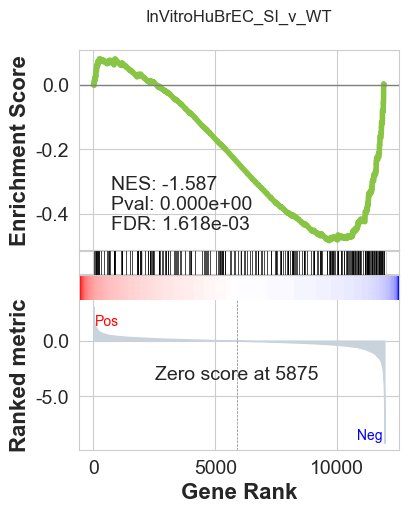

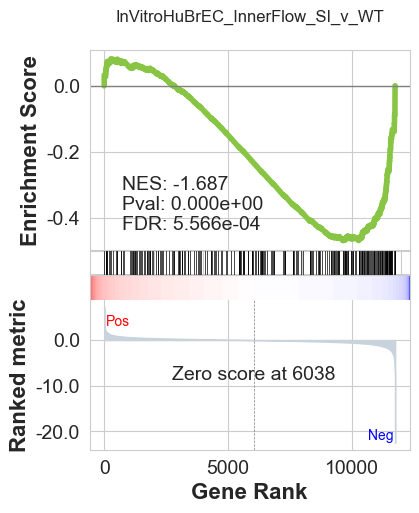

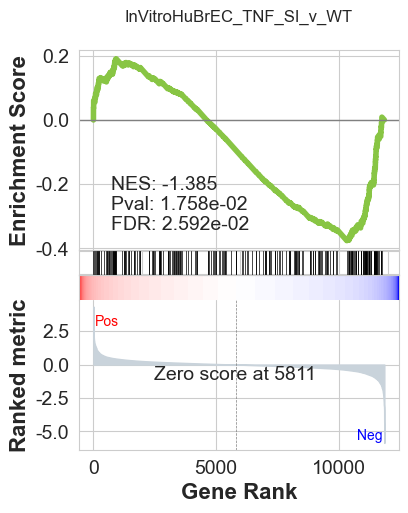

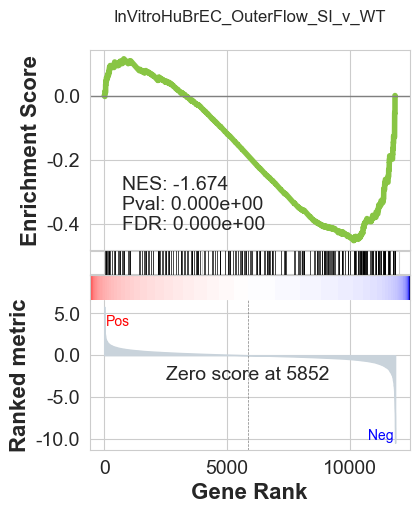

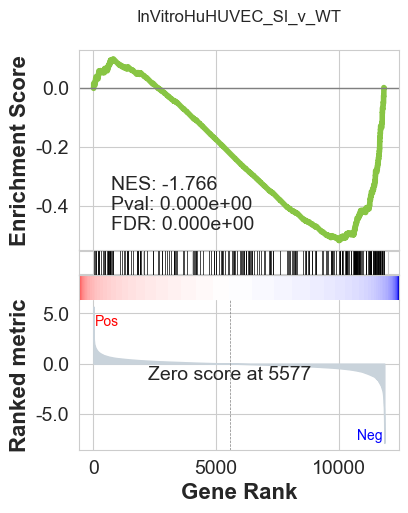

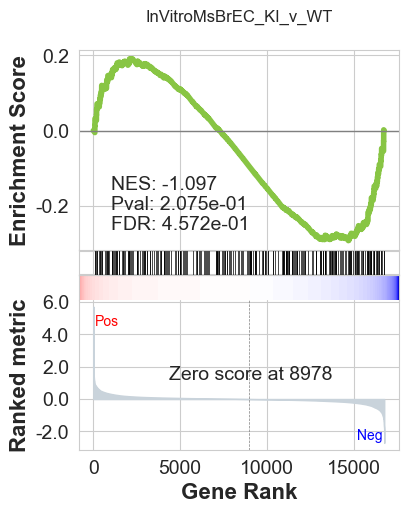

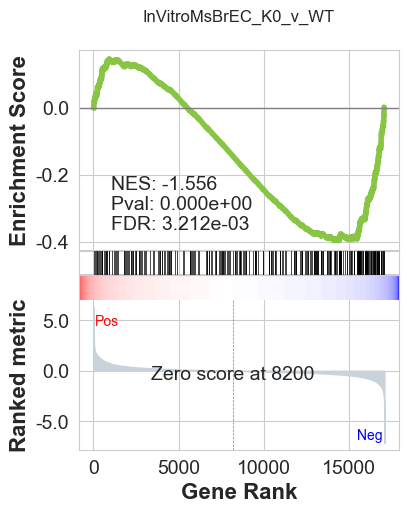

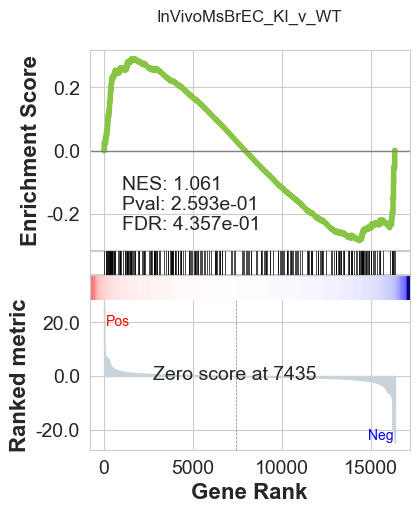

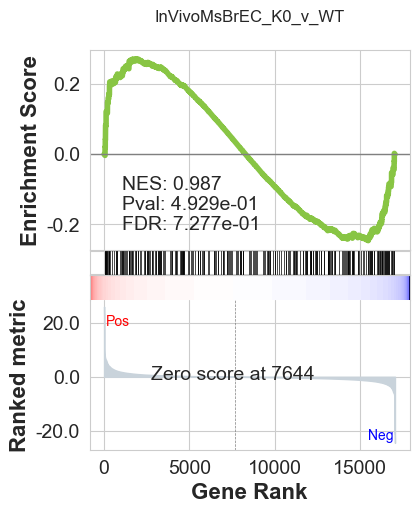

In [177]:
term_search = 'PMID38168276_Dementia_BrainEC_Down'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom2.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

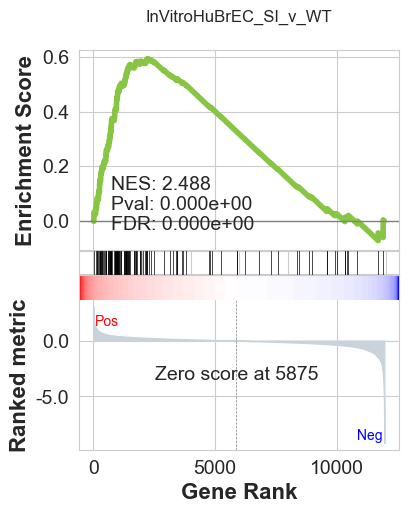

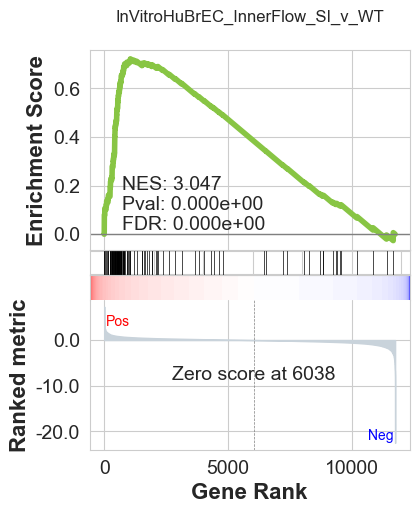

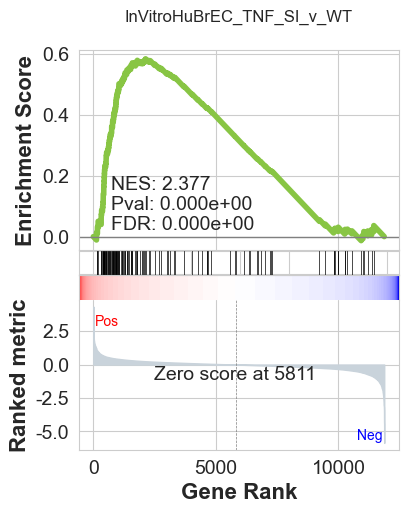

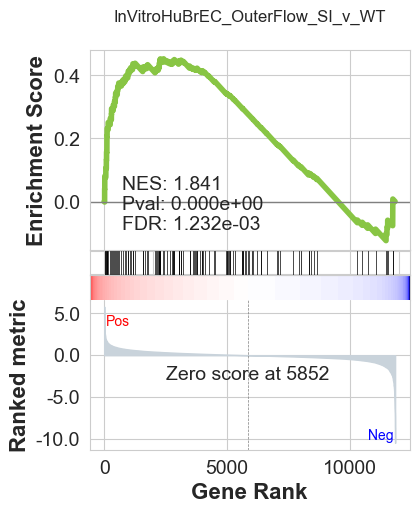

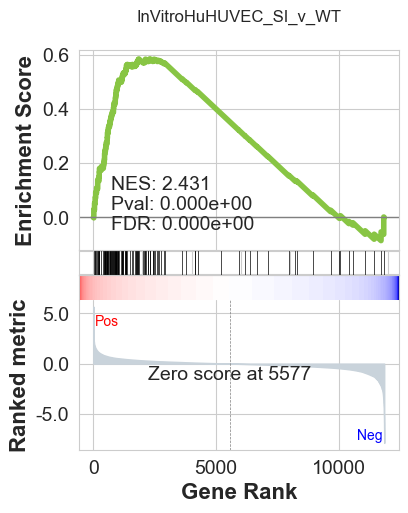

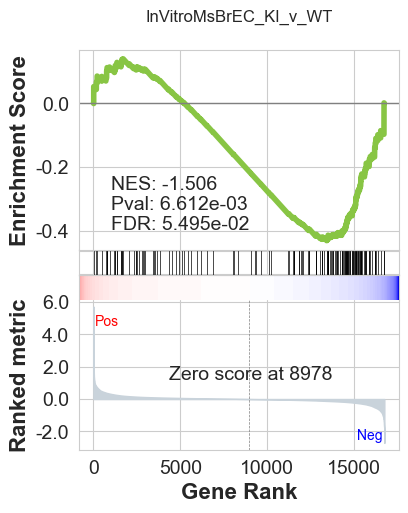

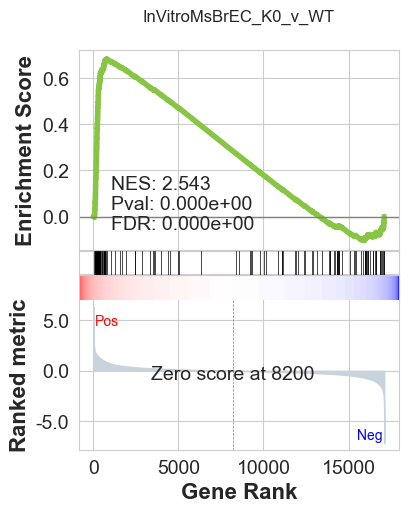

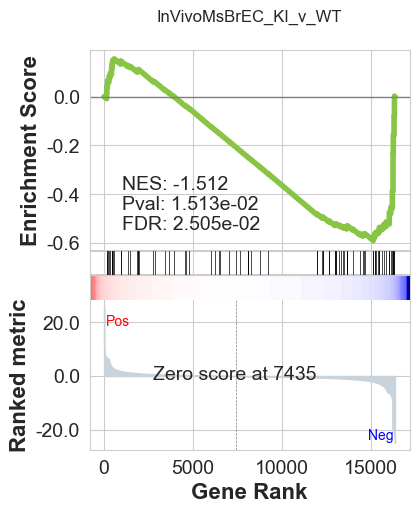

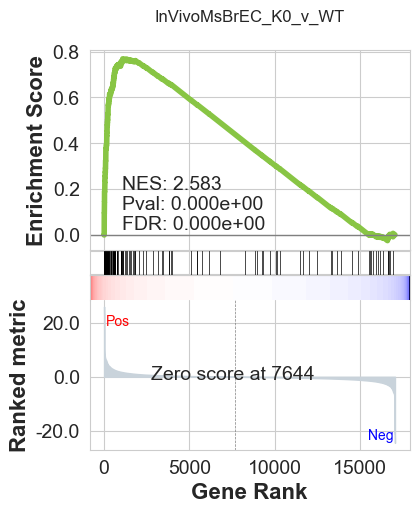

In [178]:
term_search = 'PMID28239661_KLF2KLF4_deletion_Up'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

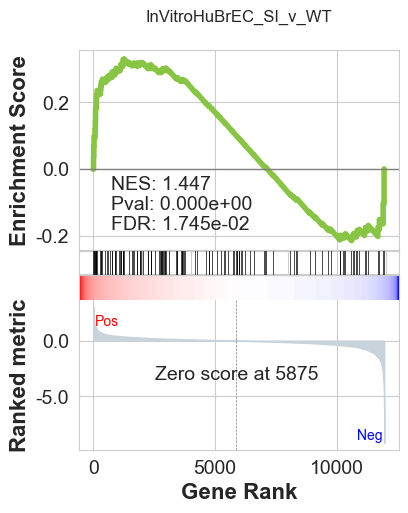

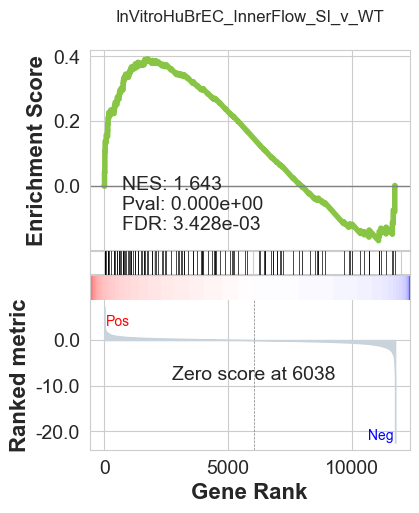

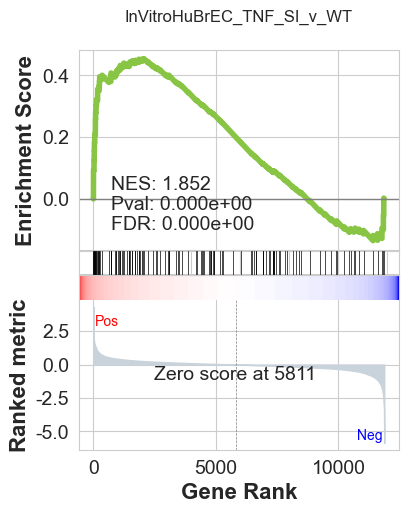

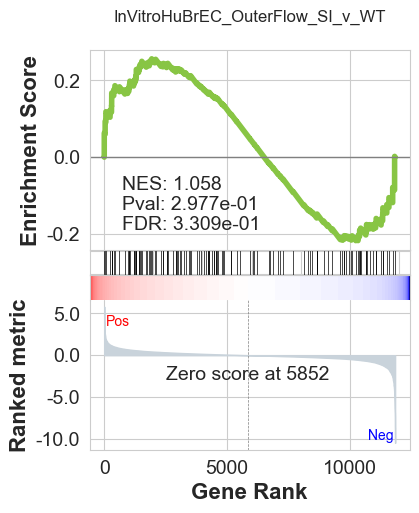

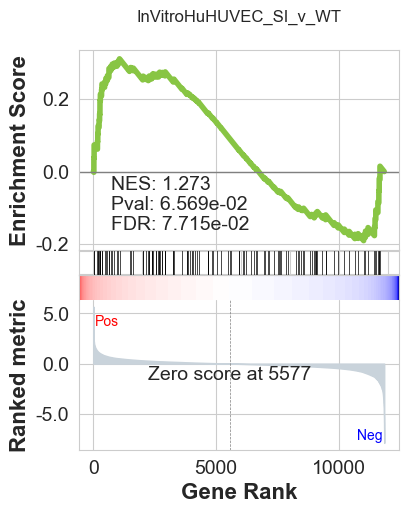

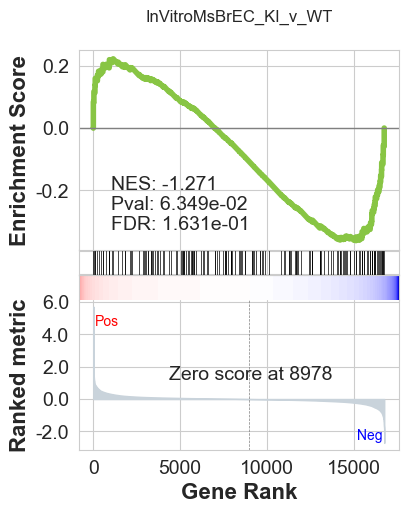

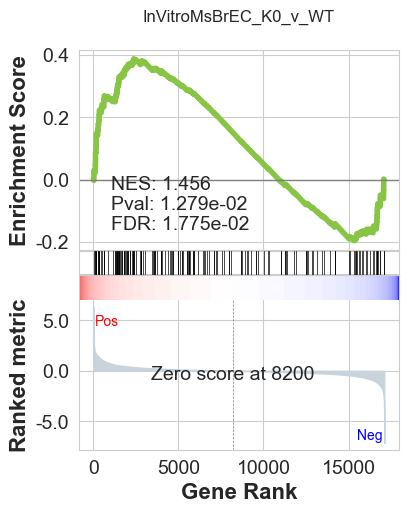

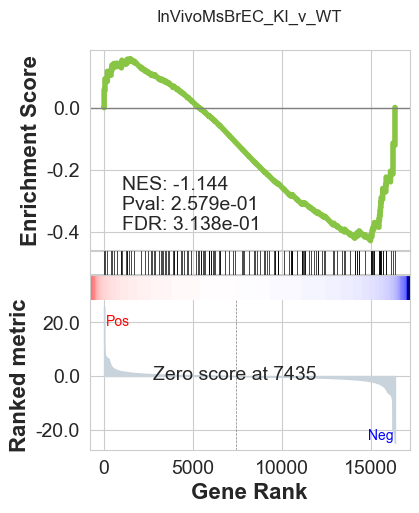

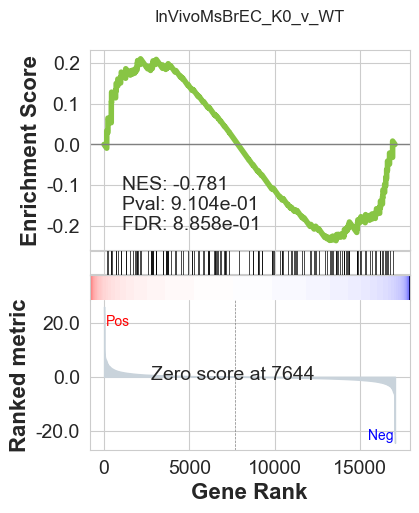

In [179]:
term_search = 'PMID34755601_bCatenin_BrainECms_Down'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

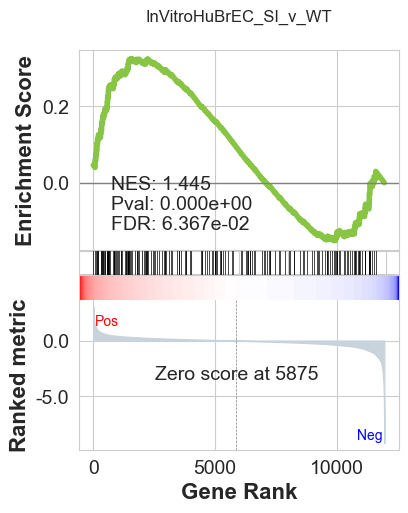

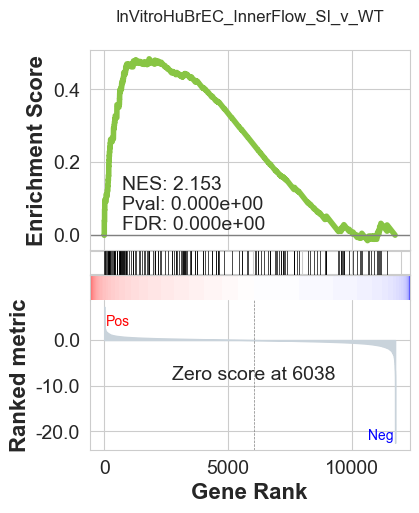

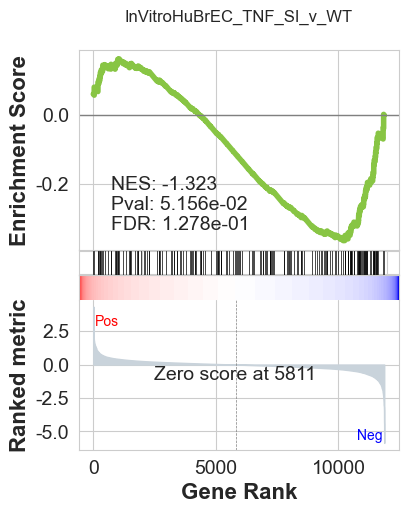

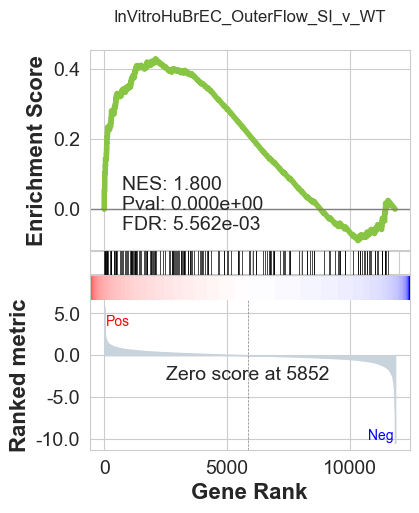

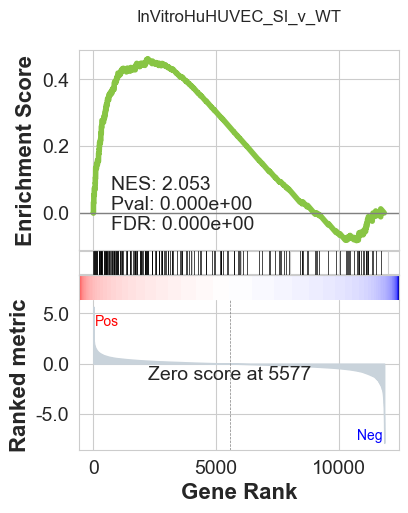

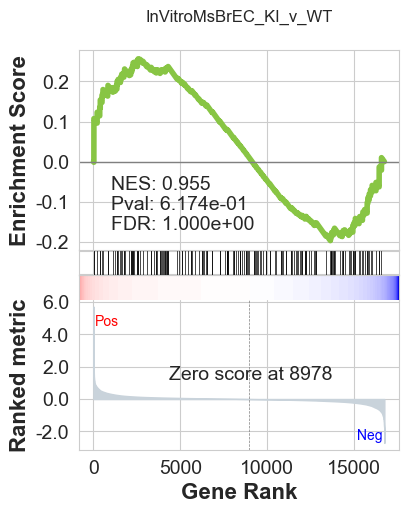

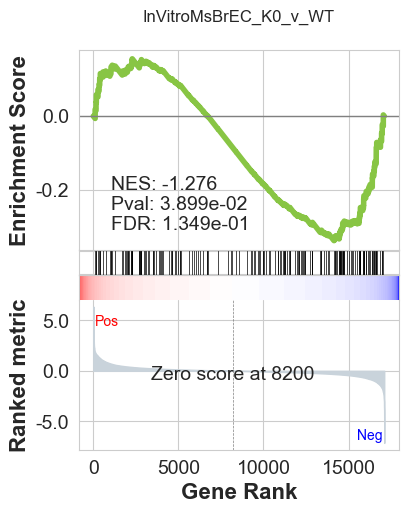

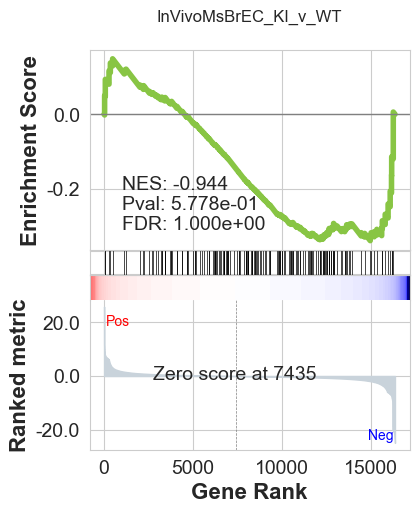

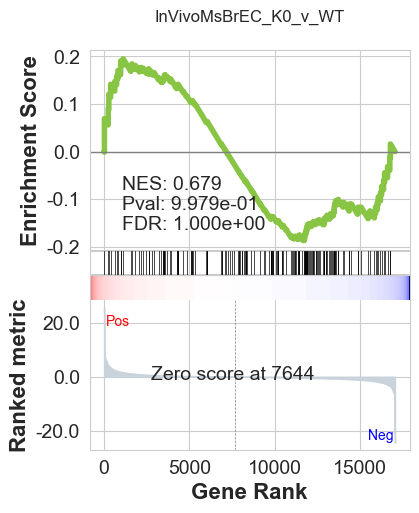

In [180]:
term_search = 'HALLMARK_TNFA_SIGNALING_VIA_NFKB'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_GSEA_Ashok/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_hallmark.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

# FPKM analysis

In [181]:
#Load RSEM FPKM Data
FPKM_Mus_TDP43 = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/294_Data_Analysis_TardbpRenewal/DESeq2_Data/RSEM_FPKM_MusCorrected.txt", sep="\t")
FPKM_Human_TDP43 = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/294_Data_Analysis_TardbpRenewal/DESeq2_Data/RSEM_FPKM_Human.txt", sep="\t")
#FPKM_Mus_Carotid1 = pd.read_excel("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/294_Data_Analysis_TardbpRenewal/RSEM_pme_FPKM_100bp_Rnd3_4.xlsx", index_col=0)
#FPKM_Mus_Carotid2 = pd.read_excel("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/294_Data_Analysis_TardbpRenewal/Round4_5_150bp_RSEM_Sept1_2016.xlsx", index_col=0)

# Trim the last row and the last column
FPKM_Mus_TDP43 = FPKM_Mus_TDP43.iloc[:-1, :-1]
FPKM_Human_TDP43 = FPKM_Human_TDP43.iloc[:-1, :-1]

# Trim the 'Gene' column to only keep the string before the first period
FPKM_Mus_TDP43['Gene'] = FPKM_Mus_TDP43['Gene'].str.split('.').str[0]

/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_11236/632521689.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_11236/632521689.py:3: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.


In [182]:
# Reset index to turn HumanGeneName from the index into a column
h2m_ENSEMBL_reset = h2m_ENSEMBL.reset_index()

# Merge FPKM_Human_TDP43 with h2m_ENSEMBL based on matching HumanGeneID and Gene
FPKM_Human_TDP43_indexed = FPKM_Human_TDP43.merge(h2m_ENSEMBL_reset[['HumanGeneID', 'HumanGeneName']], 
                                                  left_on='Gene', 
                                                  right_on='HumanGeneID')

# Set the index of the merged DataFrame to HumanGeneName
FPKM_Human_TDP43_indexed.set_index('HumanGeneName', inplace=True)

# Drop unnecessary columns if desired
FPKM_Human_TDP43_indexed.drop(columns=['HumanGeneID'], inplace=True)


In [183]:
# Reset index to turn MouseGeneName from the index into a column
m2h_ENSEMBL_reset = m2h_ENSEMBL.reset_index()

# Merge FPKM_Mouse_TDP43 with m2h_ENSEMBL based on matching MouseGeneID and Gene
FPKM_Mouse_TDP43_indexed = FPKM_Mus_TDP43.merge(m2h_ENSEMBL_reset[['MouseGeneID', 'MouseGeneName']], 
                                                left_on='Gene', 
                                                right_on='MouseGeneID')

# Set the index of the merged DataFrame to MouseGeneName
FPKM_Mouse_TDP43_indexed.set_index('MouseGeneName', inplace=True)

# Drop unnecessary columns if desired
FPKM_Mouse_TDP43_indexed.drop(columns=['MouseGeneID'], inplace=True)


In [184]:
# Create copy
FPKM_Mouse_All = FPKM_Mouse_TDP43_indexed.copy()


In [185]:
Key_RSEM_Mus_All = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/294_Data_Analysis_TardbpRenewal/Key_RSEM.txt", sep="\t")
Key_RSEM_Human = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/294_Data_Analysis_TardbpRenewal/Key_RSEM_human.txt", sep="\t")

In [186]:
columns_to_mean = [
    'InVivoTardbpBrECWT1_expression_pme_FPKM',
    'InVivoTardbpBrECWT2_expression_pme_FPKM',
    'InVivoTardbpBrECWT3_expression_pme_FPKM',
    'InVivoTardbpBrECWT4_expression_pme_FPKM',
    'InVivoTardbpBrECWT5_expression_pme_FPKM',
    'InVivoTardbpBrECWT6_expression_pme_FPKM'
]

# Verify column existence
missing_columns = [col for col in columns_to_mean if col not in FPKM_Mouse_All.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Ensure columns are numeric
    FPKM_Mouse_All[columns_to_mean] = FPKM_Mouse_All[columns_to_mean].apply(pd.to_numeric, errors='coerce')
    
    # Check for NaN values
    print("NaN counts per column:")
    print(FPKM_Mouse_All[columns_to_mean].isna().sum())
    
    # Calculate mean
    FPKM_Mouse_All['Mean_FPKM'] = FPKM_Mouse_All[columns_to_mean].mean(axis=1)
    print(FPKM_Mouse_All[['Mean_FPKM']].head())

NaN counts per column:
InVivoTardbpBrECWT1_expression_pme_FPKM    0
InVivoTardbpBrECWT2_expression_pme_FPKM    0
InVivoTardbpBrECWT3_expression_pme_FPKM    0
InVivoTardbpBrECWT4_expression_pme_FPKM    0
InVivoTardbpBrECWT5_expression_pme_FPKM    0
InVivoTardbpBrECWT6_expression_pme_FPKM    0
dtype: int64
               Mean_FPKM
MouseGeneName           
Gnai3          71.664517
Pbsn            0.003068
Cdc45           1.541505
H19             0.047054
Scml2           0.026406


In [187]:
# Sort by 'Mean_FPKM' in descending order
FPKM_Mouse_All_sorted = FPKM_Mouse_All.sort_values(by='Mean_FPKM', ascending=False)

# Keep only the first occurrence of each gene name in the index
FPKM_Mouse_All_deduplicated = FPKM_Mouse_All_sorted[~FPKM_Mouse_All_sorted.index.duplicated(keep='first')]

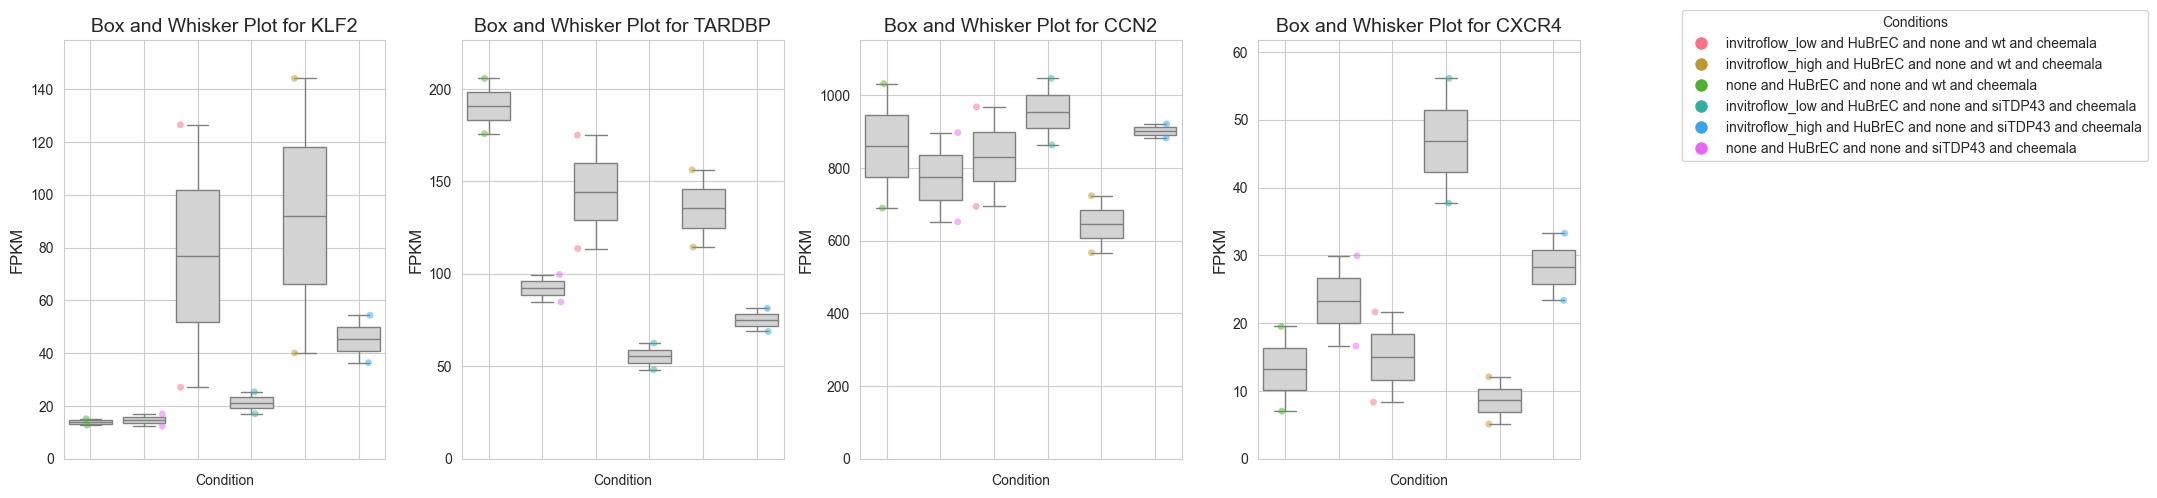

In [188]:
# Example of creating a combined conditions column
Key_RSEM_Human['Combined_Condition'] = (
    Key_RSEM_Human['flow'] + ' and ' + 
    Key_RSEM_Human['source'] + ' and ' + 
    Key_RSEM_Human['treatment'] + ' and ' + 
    Key_RSEM_Human['genotype'] + ' and ' + 
    Key_RSEM_Human['experiment']
)

# Define the conditions you want to keep
conditions_to_keep = [
    'none and HuBrEC and none and wt and cheemala',
    'none and HuBrEC and none and siTDP43 and cheemala',
    'invitroflow_low and HuBrEC and none and wt and cheemala',  
    'invitroflow_low and HuBrEC and none and siTDP43 and cheemala', 
    'invitroflow_high and HuBrEC and none and wt and cheemala',
    'invitroflow_high and HuBrEC and none and siTDP43 and cheemala',
#    'none and HuBrEC and TNF and wt and cheemala'
]

# Filter the Key_RSEM_Mus_All DataFrame
filtered_key = Key_RSEM_Human[Key_RSEM_Human['Combined_Condition'].isin(conditions_to_keep)]

# Get the matching column names
matching_columns = filtered_key['Column'].tolist()

# List of genes to plot
genes_to_plot = ['KLF2', 'TARDBP', 'CCN2', 'CXCR4']  # Replace with your actual gene names

# Create subplots for each gene, arranged side by side
n_genes = len(genes_to_plot)
fig, axes = plt.subplots(1, n_genes, figsize=(n_genes * 4, 5))

# Define the order for the conditions
condition_order = [
    'none and HuBrEC and none and wt and cheemala',
    'none and HuBrEC and none and siTDP43 and cheemala',
    'invitroflow_low and HuBrEC and none and wt and cheemala',  
    'invitroflow_low and HuBrEC and none and siTDP43 and cheemala', 
    'invitroflow_high and HuBrEC and none and wt and cheemala',
    'invitroflow_high and HuBrEC and none and siTDP43 and cheemala',
#    'none and HuBrEC and TNF and wt and cheemala'
]

# Create a color mapping for the conditions
unique_conditions = filtered_key['Combined_Condition'].unique()
color_palette = sns.color_palette("husl", len(unique_conditions))
condition_color_mapping = dict(zip(unique_conditions, color_palette))

for ax, gene in zip(axes, genes_to_plot):
    specific_gene_data = FPKM_Human_TDP43_indexed.loc[gene, matching_columns]
    
    # Convert the Series to a DataFrame for easier plotting
    specific_gene_df = specific_gene_data.reset_index()
    specific_gene_df.columns = ['Condition', 'Count']  # Rename columns for clarity

    # Update the Condition names to the Combined Conditions
    specific_gene_df['Condition'] = specific_gene_df['Condition'].map(
        {old: new for old, new in zip(filtered_key['Column'], filtered_key['Combined_Condition'])}
    )
    
    # Create boxplot for the specific gene with ordered conditions
    sns.boxplot(x='Condition', y='Count', data=specific_gene_df, 
                order=condition_order, color='lightgray', fliersize=0, ax=ax)
    
    # Create a colored stripplot for the specific gene
    sns.stripplot(x='Condition', y='Count', data=specific_gene_df, 
                  hue='Condition', palette=condition_color_mapping, 
                  alpha=0.5, jitter=True, ax=ax, dodge=True, order=condition_order)

    # Set y-axis limits from 0 to max for the specific gene
    ax.set_ylim(0, specific_gene_df['Count'].max() * 1.1)  # 10% above max for better visibility
    
    # Add title and labels for each subplot
    ax.set_title(f'Box and Whisker Plot for {gene}', fontsize=14)
    ax.set_ylabel('FPKM', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-tick labels
    ax.grid(True)

    # Remove x-tick labels for cleaner look
    ax.set_xticklabels([])

# Add a single color-coded legend for all plots
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in condition_color_mapping.values()]
fig.legend(handles, condition_color_mapping.keys(), title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

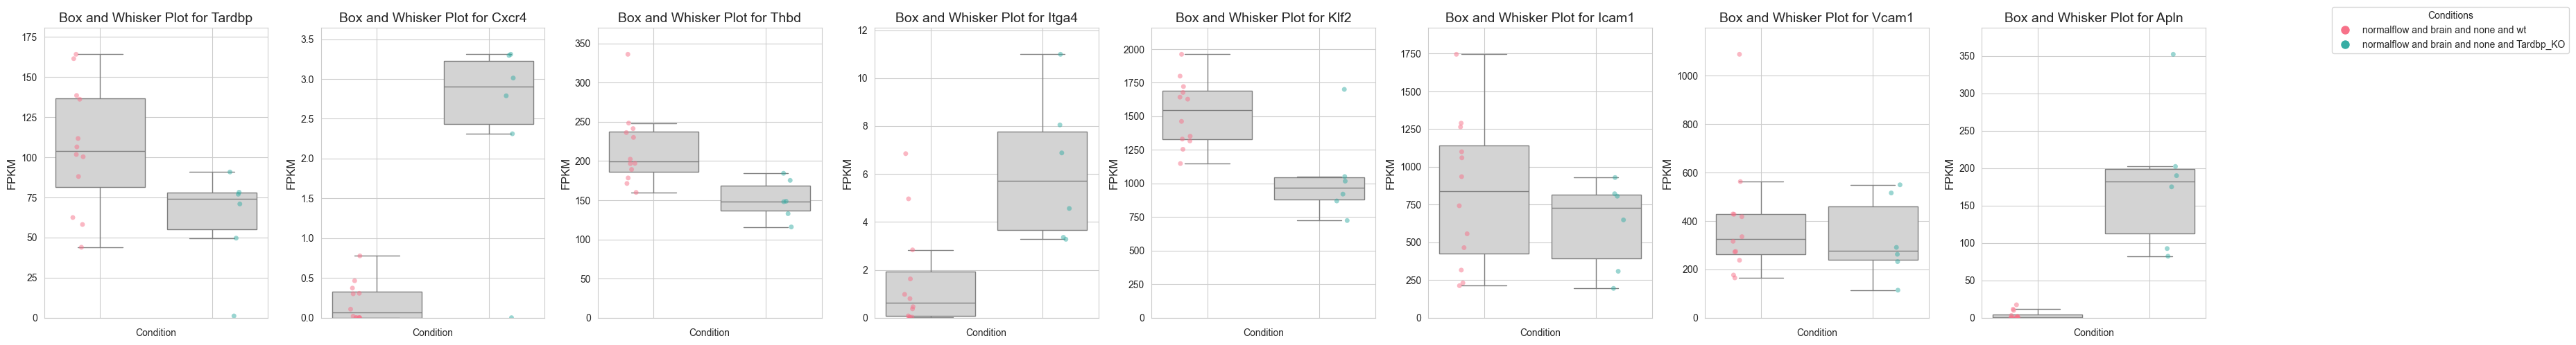

In [189]:
# Example of creating a combined conditions column
Key_RSEM_Mus_All['Combined_Condition'] = (
    Key_RSEM_Mus_All['flow'] + ' and ' + 
    Key_RSEM_Mus_All['source'] + ' and ' + 
    Key_RSEM_Mus_All['treatment'] + ' and ' + 
    Key_RSEM_Mus_All['genotype']
)

# Define the conditions you want to keep
conditions_to_keep = [
    'normalflow and brain and none and wt',
    'normalflow and brain and none and Tardbp_KO',
#    'invitroflow_low and brain and none and wt', 
#    'invitroflow_low and brain and none and Tardbp_KO',
#    'invitroflow_high and brain and none and wt',
#    'invitroflow_high and brain and none and Tardbp_KO',
#    'static and brain and none and wt'
#    'static and brain and none and Tardbp_KO'
]

# Filter the Key_RSEM_Mus_All DataFrame
filtered_key = Key_RSEM_Mus_All[Key_RSEM_Mus_All['Combined_Condition'].isin(conditions_to_keep)]

# Get the matching column names
matching_columns = filtered_key['Column'].tolist()

# List of genes to plot
genes_to_plot = ['Tardbp', 'Cxcr4', 'Thbd', 'Itga4', 'Klf2', 'Icam1', 'Vcam1', 'Apln']  # Replace with your actual gene names

# Create subplots for each gene, arranged side by side
n_genes = len(genes_to_plot)
fig, axes = plt.subplots(1, n_genes, figsize=(n_genes * 4, 5))

# Define the order for the conditions
condition_order = [
    'normalflow and brain and none and wt',
    'normalflow and brain and none and Tardbp_KO',
    # Add other conditions if needed
]

# Create a color mapping for the conditions
unique_conditions = filtered_key['Combined_Condition'].unique()
color_palette = sns.color_palette("husl", len(unique_conditions))
condition_color_mapping = dict(zip(unique_conditions, color_palette))

for ax, gene in zip(axes, genes_to_plot):
    # Get all rows for the specific gene
    specific_gene_data = FPKM_Mouse_All.loc[gene, matching_columns]
    
    # Convert to DataFrame to iterate through the rows (if it's a Series)
    specific_gene_df = specific_gene_data.reset_index()
    specific_gene_df.columns = ['Condition', 'Count']  # Rename columns for clarity

    # Update the Condition names to the Combined Conditions
    specific_gene_df['Condition'] = specific_gene_df['Condition'].map(
        {old: new for old, new in zip(filtered_key['Column'], filtered_key['Combined_Condition'])}
    )

    # Create boxplot for the specific gene with ordered conditions
    sns.boxplot(x='Condition', y='Count', data=specific_gene_df, 
                order=condition_order, color='lightgray', fliersize=0, ax=ax)
    
    # Create a colored stripplot for the specific gene
    sns.stripplot(x='Condition', y='Count', data=specific_gene_df, 
                  hue='Condition', palette=condition_color_mapping, 
                  alpha=0.5, jitter=True, ax=ax, dodge=True, order=condition_order)

    # Set y-axis limits from 0 to max for the specific gene
    ax.set_ylim(0, specific_gene_df['Count'].max() * 1.1)  # 10% above max for better visibility
    
    # Add title and labels for each subplot
    ax.set_title(f'Box and Whisker Plot for {gene}', fontsize=14)
    ax.set_ylabel('FPKM', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-tick labels
    ax.grid(True)

    # Remove x-tick labels for cleaner look
    ax.set_xticklabels([])

# Add a single color-coded legend for all plots
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in condition_color_mapping.values()]
fig.legend(handles, condition_color_mapping.keys(), title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


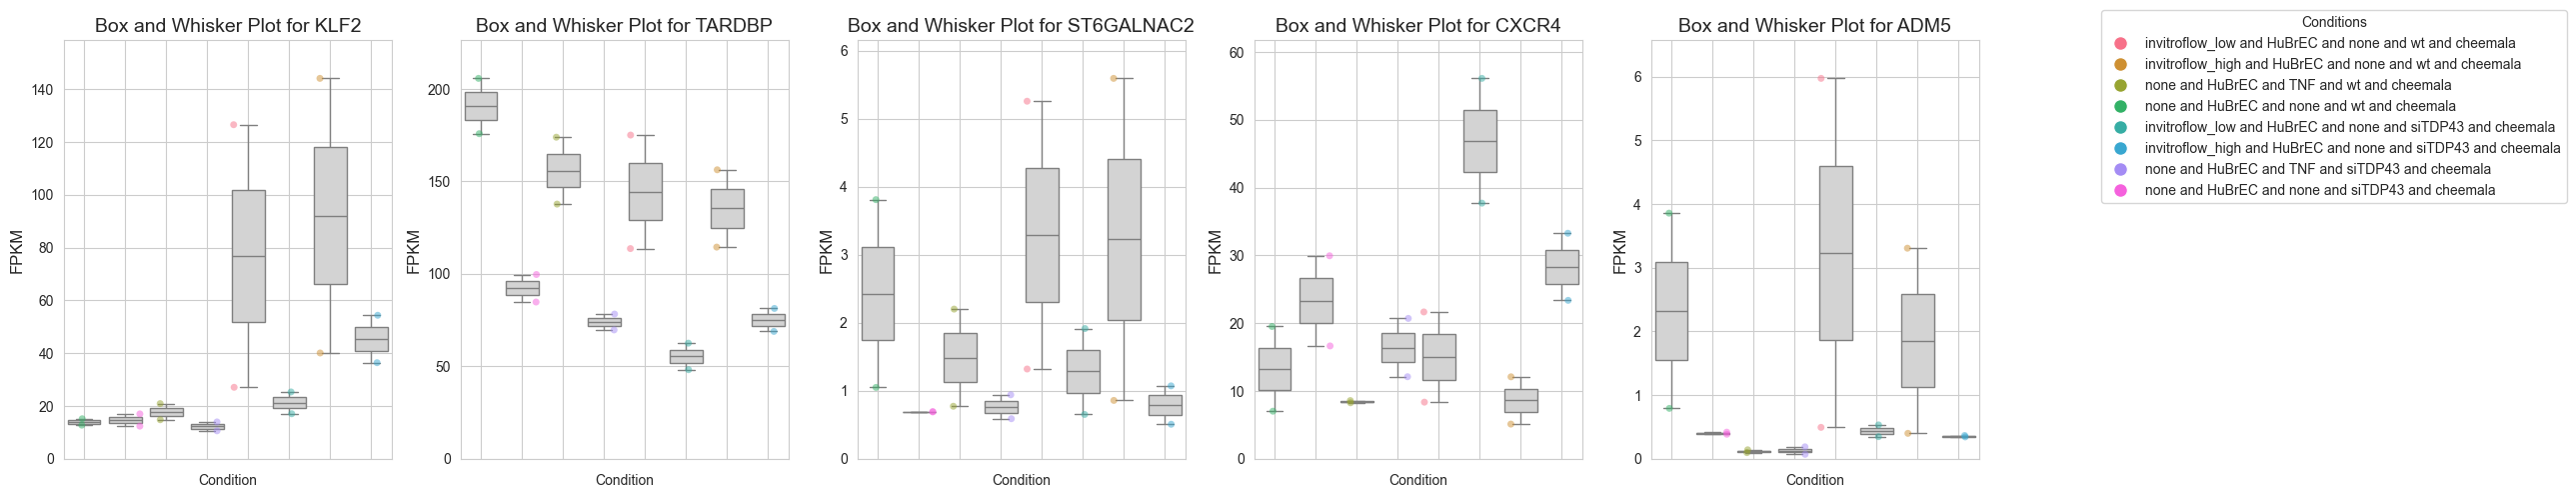

In [190]:
# Example of creating a combined conditions column
Key_RSEM_Human['Combined_Condition'] = (
    Key_RSEM_Human['flow'] + ' and ' + 
    Key_RSEM_Human['source'] + ' and ' + 
    Key_RSEM_Human['treatment'] + ' and ' + 
    Key_RSEM_Human['genotype'] + ' and ' + 
    Key_RSEM_Human['experiment']
)

# Define the conditions you want to keep
conditions_to_keep = [
    'none and HuBrEC and none and wt and cheemala',
    'none and HuBrEC and none and siTDP43 and cheemala',
    'none and HuBrEC and TNF and wt and cheemala',
    'none and HuBrEC and TNF and siTDP43 and cheemala',
    'invitroflow_low and HuBrEC and none and wt and cheemala',  
    'invitroflow_low and HuBrEC and none and siTDP43 and cheemala', 
    'invitroflow_high and HuBrEC and none and wt and cheemala',
    'invitroflow_high and HuBrEC and none and siTDP43 and cheemala'
]

# Filter the Key_RSEM_Mus_All DataFrame
filtered_key = Key_RSEM_Human[Key_RSEM_Human['Combined_Condition'].isin(conditions_to_keep)]

# Get the matching column names
matching_columns = filtered_key['Column'].tolist()

# List of genes to plot
genes_to_plot = ['KLF2', 'TARDBP', 'ST6GALNAC2', 'CXCR4', 'ADM5']  # Replace with your actual gene names

# Create subplots for each gene, arranged side by side
n_genes = len(genes_to_plot)
fig, axes = plt.subplots(1, n_genes, figsize=(n_genes * 4, 5))

# Define the order for the conditions
condition_order = [
    'none and HuBrEC and none and wt and cheemala',
    'none and HuBrEC and none and siTDP43 and cheemala',
    'none and HuBrEC and TNF and wt and cheemala',
    'none and HuBrEC and TNF and siTDP43 and cheemala',
    'invitroflow_low and HuBrEC and none and wt and cheemala',  
    'invitroflow_low and HuBrEC and none and siTDP43 and cheemala', 
    'invitroflow_high and HuBrEC and none and wt and cheemala',
    'invitroflow_high and HuBrEC and none and siTDP43 and cheemala'
]

# Create a color mapping for the conditions
unique_conditions = filtered_key['Combined_Condition'].unique()
color_palette = sns.color_palette("husl", len(unique_conditions))
condition_color_mapping = dict(zip(unique_conditions, color_palette))

for ax, gene in zip(axes, genes_to_plot):
    specific_gene_data = FPKM_Human_TDP43_indexed.loc[gene, matching_columns]
    
    # Convert the Series to a DataFrame for easier plotting
    specific_gene_df = specific_gene_data.reset_index()
    specific_gene_df.columns = ['Condition', 'Count']  # Rename columns for clarity

    # Update the Condition names to the Combined Conditions
    specific_gene_df['Condition'] = specific_gene_df['Condition'].map(
        {old: new for old, new in zip(filtered_key['Column'], filtered_key['Combined_Condition'])}
    )
    
    # Create boxplot for the specific gene with ordered conditions
    sns.boxplot(x='Condition', y='Count', data=specific_gene_df, 
                order=condition_order, color='lightgray', fliersize=0, ax=ax)
    
    # Create a colored stripplot for the specific gene
    sns.stripplot(x='Condition', y='Count', data=specific_gene_df, 
                  hue='Condition', palette=condition_color_mapping, 
                  alpha=0.5, jitter=True, ax=ax, dodge=True, order=condition_order)

    # Set y-axis limits from 0 to max for the specific gene
    ax.set_ylim(0, specific_gene_df['Count'].max() * 1.1)  # 10% above max for better visibility
    
    # Add title and labels for each subplot
    ax.set_title(f'Box and Whisker Plot for {gene}', fontsize=14)
    ax.set_ylabel('FPKM', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-tick labels
    ax.grid(True)

    # Remove x-tick labels for cleaner look
    ax.set_xticklabels([])

# Add a single color-coded legend for all plots
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in condition_color_mapping.values()]
fig.legend(handles, condition_color_mapping.keys(), title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

## Plotting KO down

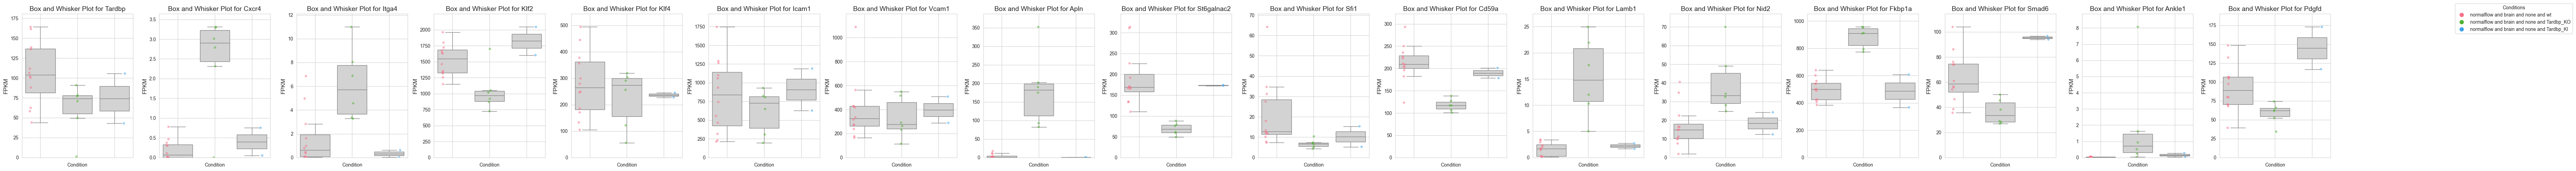

In [191]:
# Example of creating a combined conditions column
Key_RSEM_Mus_All['Combined_Condition'] = (
    Key_RSEM_Mus_All['flow'] + ' and ' + 
    Key_RSEM_Mus_All['source'] + ' and ' + 
    Key_RSEM_Mus_All['treatment'] + ' and ' + 
    Key_RSEM_Mus_All['genotype']
)

# Define the conditions you want to keep
conditions_to_keep = [
    'normalflow and brain and none and wt',
    'normalflow and brain and none and Tardbp_KO',
    'normalflow and brain and none and Tardbp_KI',
#    'invitroflow_low and brain and none and wt', 
#    'invitroflow_low and brain and none and Tardbp_KO',
#    'invitroflow_high and brain and none and wt',
#    'invitroflow_high and brain and none and Tardbp_KO',
#    'static and brain and none and wt'
#    'static and brain and none and Tardbp_KO'
]

# Filter the Key_RSEM_Mus_All DataFrame
filtered_key = Key_RSEM_Mus_All[Key_RSEM_Mus_All['Combined_Condition'].isin(conditions_to_keep)]

# Get the matching column names
matching_columns = filtered_key['Column'].tolist()

# List of genes to plot
genes_to_plot = ['Tardbp', 'Cxcr4', 'Itga4', 'Klf2', 'Klf4', 'Icam1', 'Vcam1', 'Apln', 'St6galnac2', 'Sfi1', 'Cd59a', 'Lamb1', 'Nid2', 'Fkbp1a', 'Smad6', 'Ankle1', 'Pdgfd']  # Replace with your actual gene names

# Create subplots for each gene, arranged side by side
n_genes = len(genes_to_plot)
fig, axes = plt.subplots(1, n_genes, figsize=(n_genes * 4, 5))

# Define the order for the conditions
condition_order = [
    'normalflow and brain and none and wt',
    'normalflow and brain and none and Tardbp_KO',
    'normalflow and brain and none and Tardbp_KI',
    # Add other conditions if needed
]

# Create a color mapping for the conditions
unique_conditions = filtered_key['Combined_Condition'].unique()
color_palette = sns.color_palette("husl", len(unique_conditions))
condition_color_mapping = dict(zip(unique_conditions, color_palette))

for ax, gene in zip(axes, genes_to_plot):
    # Get all rows for the specific gene
    specific_gene_data = FPKM_Mouse_All_deduplicated.loc[gene, matching_columns]
    
    # Convert to DataFrame to iterate through the rows (if it's a Series)
    specific_gene_df = specific_gene_data.reset_index()
    specific_gene_df.columns = ['Condition', 'Count']  # Rename columns for clarity

    # Update the Condition names to the Combined Conditions
    specific_gene_df['Condition'] = specific_gene_df['Condition'].map(
        {old: new for old, new in zip(filtered_key['Column'], filtered_key['Combined_Condition'])}
    )

    # Create boxplot for the specific gene with ordered conditions
    sns.boxplot(x='Condition', y='Count', data=specific_gene_df, 
                order=condition_order, color='lightgray', fliersize=0, ax=ax)
    
    # Create a colored stripplot for the specific gene
    sns.stripplot(x='Condition', y='Count', data=specific_gene_df, 
                  hue='Condition', palette=condition_color_mapping, 
                  alpha=0.5, jitter=True, ax=ax, dodge=True, order=condition_order)

    # Set y-axis limits from 0 to max for the specific gene
    ax.set_ylim(0, specific_gene_df['Count'].max() * 1.1)  # 10% above max for better visibility
    
    # Add title and labels for each subplot
    ax.set_title(f'Box and Whisker Plot for {gene}', fontsize=14)
    ax.set_ylabel('FPKM', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-tick labels
    ax.grid(True)

    # Remove x-tick labels for cleaner look
    ax.set_xticklabels([])

# Add a single color-coded legend for all plots
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in condition_color_mapping.values()]
fig.legend(handles, condition_color_mapping.keys(), title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


Plots have been saved to the folder: /Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission/Boxplots_Mus_KO_invivo


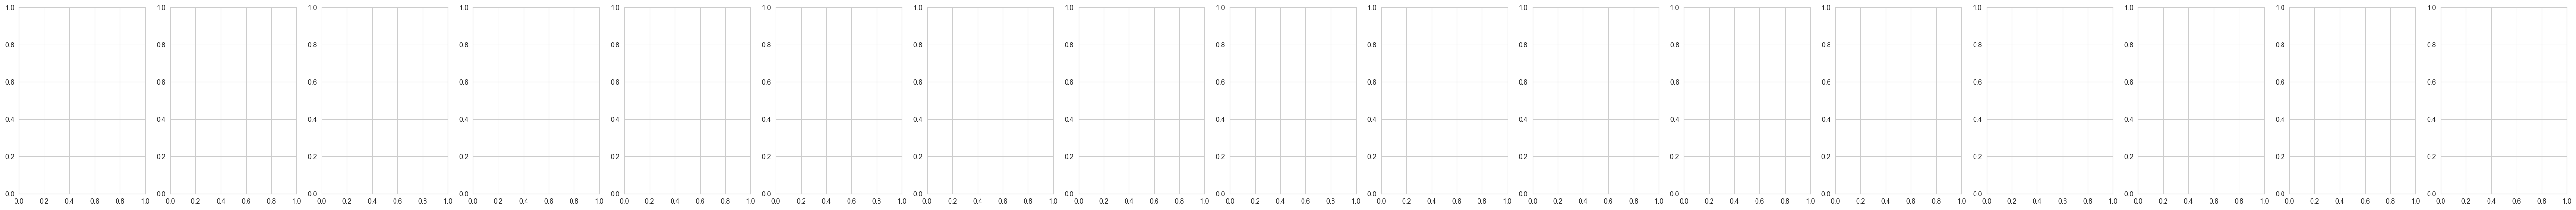

In [192]:
# Define the folder name to save the plots
output_folder = "/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission/Boxplots_Mus_KO_invivo"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)


# Example of creating a combined conditions column
Key_RSEM_Mus_All['Combined_Condition'] = (
    Key_RSEM_Mus_All['flow'] + ' and ' + 
    Key_RSEM_Mus_All['source'] + ' and ' + 
    Key_RSEM_Mus_All['treatment'] + ' and ' + 
    Key_RSEM_Mus_All['genotype']
)

# Define the conditions you want to keep
conditions_to_keep = [
    'normalflow and brain and none and wt',
    'normalflow and brain and none and Tardbp_KI',
    'normalflow and brain and none and Tardbp_KO',
#    'invitroflow_low and brain and none and wt', 
#    'invitroflow_low and brain and none and Tardbp_KO',
#    'invitroflow_high and brain and none and wt',
#    'invitroflow_high and brain and none and Tardbp_KO',
#    'static and brain and none and wt'
#    'static and brain and none and Tardbp_KO'
]

# Filter the Key_RSEM_Mus_All DataFrame
filtered_key = Key_RSEM_Mus_All[Key_RSEM_Mus_All['Combined_Condition'].isin(conditions_to_keep)]

# Get the matching column names
matching_columns = filtered_key['Column'].tolist()

# List of genes to plot
genes_to_plot = ['Tardbp', 'Cxcr4', 'Itga4', 'Klf2', 'Klf4', 'Icam1', 'Vcam1', 'Apln', 'St6galnac2', 'Sfi1', 'Cd59a', 'Lamb1', 'Nid2', 'Fkbp1a', 'Smad6', 'Ankle1', 'Pdgfd']  # Replace with your actual gene names

# Create subplots for each gene, arranged side by side
n_genes = len(genes_to_plot)
fig, axes = plt.subplots(1, n_genes, figsize=(n_genes * 4, 5))

# Define the order for the conditions
condition_order = [
    'normalflow and brain and none and wt',
    'normalflow and brain and none and Tardbp_KI',
    'normalflow and brain and none and Tardbp_KO',
    # Add other conditions if needed
]





# Iterate through each gene and save its plot
for gene in genes_to_plot:
    fig, ax = plt.subplots(figsize=(6, 5))

    # Get all rows for the specific gene
    specific_gene_data = FPKM_Mouse_All_deduplicated.loc[gene, matching_columns]
    
    # Convert to DataFrame to iterate through the rows (if it's a Series)
    specific_gene_df = specific_gene_data.reset_index()
    specific_gene_df.columns = ['Condition', 'Count']  # Rename columns for clarity

    # Update the Condition names to the Combined Conditions
    specific_gene_df['Condition'] = specific_gene_df['Condition'].map(
        {old: new for old, new in zip(filtered_key['Column'], filtered_key['Combined_Condition'])}
    )

    # Create boxplot for the specific gene with ordered conditions
    sns.boxplot(x='Condition', y='Count', data=specific_gene_df, 
                order=condition_order, color='lightgray', fliersize=0, ax=ax)
    
    # Create a colored stripplot for the specific gene
    sns.stripplot(x='Condition', y='Count', data=specific_gene_df, 
                  hue='Condition', palette=condition_color_mapping, 
                  alpha=0.5, jitter=True, ax=ax, dodge=True, order=condition_order)

    # Set y-axis limits from 0 to max for the specific gene
    ax.set_ylim(0, specific_gene_df['Count'].max() * 1.1)  # 10% above max for better visibility
    
    # Add title and labels for the plot
    ax.set_title(f'Box and Whisker Plot for {gene}', fontsize=14)
    ax.set_ylabel('FPKM', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-tick labels
    ax.grid(True)

    # Remove x-tick labels for cleaner look
    ax.set_xticklabels([])

    # Save the figure
    output_path = os.path.join(output_folder, f"{gene}_Boxplot.pdf")
    plt.savefig(output_path, bbox_inches='tight')
    plt.close(fig)  # Close the figure to save memory

print(f"Plots have been saved to the folder: {output_folder}")

## Plotting siTDP43 down

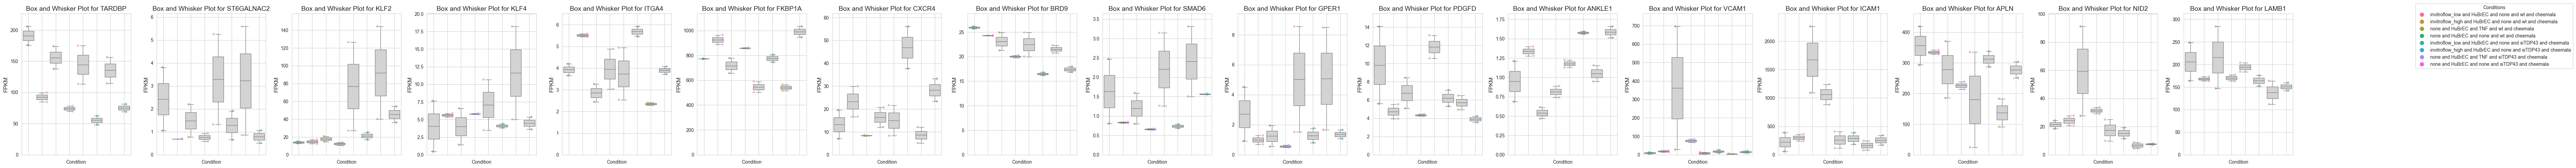

In [193]:
# Example of creating a combined conditions column
Key_RSEM_Human['Combined_Condition'] = (
    Key_RSEM_Human['flow'] + ' and ' + 
    Key_RSEM_Human['source'] + ' and ' + 
    Key_RSEM_Human['treatment'] + ' and ' + 
    Key_RSEM_Human['genotype'] + ' and ' + 
    Key_RSEM_Human['experiment']
)

# Define the conditions you want to keep
conditions_to_keep = [
    'none and HuBrEC and none and wt and cheemala',
    'none and HuBrEC and none and siTDP43 and cheemala',
    'none and HuBrEC and TNF and wt and cheemala',
    'none and HuBrEC and TNF and siTDP43 and cheemala',
    'invitroflow_low and HuBrEC and none and wt and cheemala',  
    'invitroflow_low and HuBrEC and none and siTDP43 and cheemala', 
    'invitroflow_high and HuBrEC and none and wt and cheemala',
    'invitroflow_high and HuBrEC and none and siTDP43 and cheemala'
]

# Filter the Key_RSEM_Mus_All DataFrame
filtered_key = Key_RSEM_Human[Key_RSEM_Human['Combined_Condition'].isin(conditions_to_keep)]

# Get the matching column names
matching_columns = filtered_key['Column'].tolist()

# List of genes to plot
genes_to_plot = ['TARDBP', 'ST6GALNAC2', 'KLF2', 'KLF4', 'ITGA4', 'FKBP1A', 'CXCR4', 'BRD9', 'SMAD6', 'GPER1', 'PDGFD', 'ANKLE1', 'VCAM1', 'ICAM1', 'APLN', 'NID2', 'LAMB1']  # Replace with your actual gene names

# Create subplots for each gene, arranged side by side
n_genes = len(genes_to_plot)
fig, axes = plt.subplots(1, n_genes, figsize=(n_genes * 4, 5))

# Define the order for the conditions
condition_order = [
    'none and HuBrEC and none and wt and cheemala',
    'none and HuBrEC and none and siTDP43 and cheemala',
    'none and HuBrEC and TNF and wt and cheemala',
    'none and HuBrEC and TNF and siTDP43 and cheemala',
    'invitroflow_low and HuBrEC and none and wt and cheemala',  
    'invitroflow_low and HuBrEC and none and siTDP43 and cheemala', 
    'invitroflow_high and HuBrEC and none and wt and cheemala',
    'invitroflow_high and HuBrEC and none and siTDP43 and cheemala'
]

# Create a color mapping for the conditions
unique_conditions = filtered_key['Combined_Condition'].unique()
color_palette = sns.color_palette("husl", len(unique_conditions))
condition_color_mapping = dict(zip(unique_conditions, color_palette))

for ax, gene in zip(axes, genes_to_plot):
    specific_gene_data = FPKM_Human_TDP43_indexed.loc[gene, matching_columns]
    
    # Convert the Series to a DataFrame for easier plotting
    specific_gene_df = specific_gene_data.reset_index()
    specific_gene_df.columns = ['Condition', 'Count']  # Rename columns for clarity

    # Update the Condition names to the Combined Conditions
    specific_gene_df['Condition'] = specific_gene_df['Condition'].map(
        {old: new for old, new in zip(filtered_key['Column'], filtered_key['Combined_Condition'])}
    )
    
    # Create boxplot for the specific gene with ordered conditions
    sns.boxplot(x='Condition', y='Count', data=specific_gene_df, 
                order=condition_order, color='lightgray', fliersize=0, ax=ax)
    
    # Create a colored stripplot for the specific gene
    sns.stripplot(x='Condition', y='Count', data=specific_gene_df, 
                  hue='Condition', palette=condition_color_mapping, 
                  alpha=0.5, jitter=True, ax=ax, dodge=True, order=condition_order)

    # Set y-axis limits from 0 to max for the specific gene
    ax.set_ylim(0, specific_gene_df['Count'].max() * 1.1)  # 10% above max for better visibility
    
    # Add title and labels for each subplot
    ax.set_title(f'Box and Whisker Plot for {gene}', fontsize=14)
    ax.set_ylabel('FPKM', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-tick labels
    ax.grid(True)

    # Remove x-tick labels for cleaner look
    ax.set_xticklabels([])

# Add a single color-coded legend for all plots
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in condition_color_mapping.values()]
fig.legend(handles, condition_color_mapping.keys(), title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

In [194]:
# Define font settings to ensure proper text export
matplotlib.rcParams['pdf.fonttype'] = 42  # Ensures text is saved as text, not outlines
matplotlib.rcParams['ps.fonttype'] = 42  # Same for PostScript output
matplotlib.rcParams['font.sans-serif'] = ['Arial']  # Use Arial or a font available on your system


# Define the folder name to save the plots
output_folder = "/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission/Boxplots_Human_siTDP43_invitro"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)


# Iterate through each gene and save its plot
for gene in genes_to_plot:
    fig, ax = plt.subplots(figsize=(6, 5))

    # Get all rows for the specific gene
    specific_gene_data = FPKM_Human_TDP43_indexed.loc[gene, matching_columns]
    
    # Convert to DataFrame to iterate through the rows (if it's a Series)
    specific_gene_df = specific_gene_data.reset_index()
    specific_gene_df.columns = ['Condition', 'Count']  # Rename columns for clarity

    # Update the Condition names to the Combined Conditions
    specific_gene_df['Condition'] = specific_gene_df['Condition'].map(
        {old: new for old, new in zip(filtered_key['Column'], filtered_key['Combined_Condition'])}
    )

    # Create boxplot for the specific gene with ordered conditions
    sns.boxplot(x='Condition', y='Count', data=specific_gene_df, 
                order=condition_order, color='lightgray', fliersize=0, ax=ax)
    
    # Create a colored stripplot for the specific gene
    sns.stripplot(x='Condition', y='Count', data=specific_gene_df, 
                  hue='Condition', palette=condition_color_mapping, 
                  alpha=0.5, jitter=True, ax=ax, dodge=True, order=condition_order)

    # Set y-axis limits from 0 to max for the specific gene
    ax.set_ylim(0, specific_gene_df['Count'].max() * 1.1)  # 10% above max for better visibility
    
    # Add title and labels for the plot
    ax.set_title(f'Box and Whisker Plot for {gene}', fontsize=14)
    ax.set_ylabel('FPKM', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-tick labels
    ax.grid(True)

    # Remove x-tick labels for cleaner look
    ax.set_xticklabels([])

    # Save the figure
    output_path = os.path.join(output_folder, f"{gene}_Boxplot.pdf")
    plt.savefig(output_path, bbox_inches='tight')
    plt.close(fig)  # Close the figure to save memory

print(f"Plots have been saved to the folder: {output_folder}")

Plots have been saved to the folder: /Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission/Boxplots_Human_siTDP43_invitro


## Plotting KO and KI down

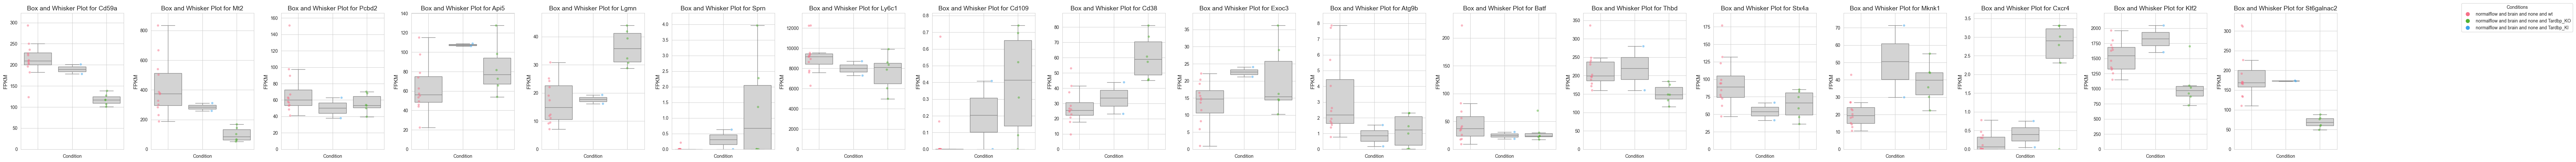

In [195]:
# Example of creating a combined conditions column
Key_RSEM_Mus_All['Combined_Condition'] = (
    Key_RSEM_Mus_All['flow'] + ' and ' + 
    Key_RSEM_Mus_All['source'] + ' and ' + 
    Key_RSEM_Mus_All['treatment'] + ' and ' + 
    Key_RSEM_Mus_All['genotype']
)

# Define the conditions you want to keep
conditions_to_keep = [
    'normalflow and brain and none and wt',
    'normalflow and brain and none and Tardbp_KI',
    'normalflow and brain and none and Tardbp_KO',
#    'invitroflow_low and brain and none and wt', 
#    'invitroflow_low and brain and none and Tardbp_KO',
#    'invitroflow_high and brain and none and wt',
#    'invitroflow_high and brain and none and Tardbp_KO',
#    'static and brain and none and wt'
#    'static and brain and none and Tardbp_KO'
]

# Filter the Key_RSEM_Mus_All DataFrame
filtered_key = Key_RSEM_Mus_All[Key_RSEM_Mus_All['Combined_Condition'].isin(conditions_to_keep)]

# Get the matching column names
matching_columns = filtered_key['Column'].tolist()

# List of genes to plot
genes_to_plot = ['Cd59a','Mt2','Pcbd2','Api5','Lgmn','Sprn','Ly6c1','Cd109','Cd38','Exoc3','Atg9b','Batf','Thbd','Stx4a','Mknk1','Cxcr4','Klf2','St6galnac2']  # Replace with your actual gene names

# Create subplots for each gene, arranged side by side
n_genes = len(genes_to_plot)
fig, axes = plt.subplots(1, n_genes, figsize=(n_genes * 4, 5))

# Define the order for the conditions
condition_order = [
    'normalflow and brain and none and wt',
    'normalflow and brain and none and Tardbp_KI',
    'normalflow and brain and none and Tardbp_KO',
    # Add other conditions if needed
]

# Create a color mapping for the conditions
unique_conditions = filtered_key['Combined_Condition'].unique()
color_palette = sns.color_palette("husl", len(unique_conditions))
condition_color_mapping = dict(zip(unique_conditions, color_palette))

for ax, gene in zip(axes, genes_to_plot):
    # Get all rows for the specific gene
    specific_gene_data = FPKM_Mouse_All_deduplicated.loc[gene, matching_columns]
    
    # Convert to DataFrame to iterate through the rows (if it's a Series)
    specific_gene_df = specific_gene_data.reset_index()
    specific_gene_df.columns = ['Condition', 'Count']  # Rename columns for clarity

    # Update the Condition names to the Combined Conditions
    specific_gene_df['Condition'] = specific_gene_df['Condition'].map(
        {old: new for old, new in zip(filtered_key['Column'], filtered_key['Combined_Condition'])}
    )

    # Create boxplot for the specific gene with ordered conditions
    sns.boxplot(x='Condition', y='Count', data=specific_gene_df, 
                order=condition_order, color='lightgray', fliersize=0, ax=ax)
    
    # Create a colored stripplot for the specific gene
    sns.stripplot(x='Condition', y='Count', data=specific_gene_df, 
                  hue='Condition', palette=condition_color_mapping, 
                  alpha=0.5, jitter=True, ax=ax, dodge=True, order=condition_order)

    # Set y-axis limits from 0 to max for the specific gene
    ax.set_ylim(0, specific_gene_df['Count'].max() * 1.1)  # 10% above max for better visibility
    
    # Add title and labels for each subplot
    ax.set_title(f'Box and Whisker Plot for {gene}', fontsize=14)
    ax.set_ylabel('FPKM', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-tick labels
    ax.grid(True)

    # Remove x-tick labels for cleaner look
    ax.set_xticklabels([])

# Add a single color-coded legend for all plots
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in condition_color_mapping.values()]
fig.legend(handles, condition_color_mapping.keys(), title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


Plots have been saved to the folder: /Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission/Boxplots_Mus_KO_KI_invivo


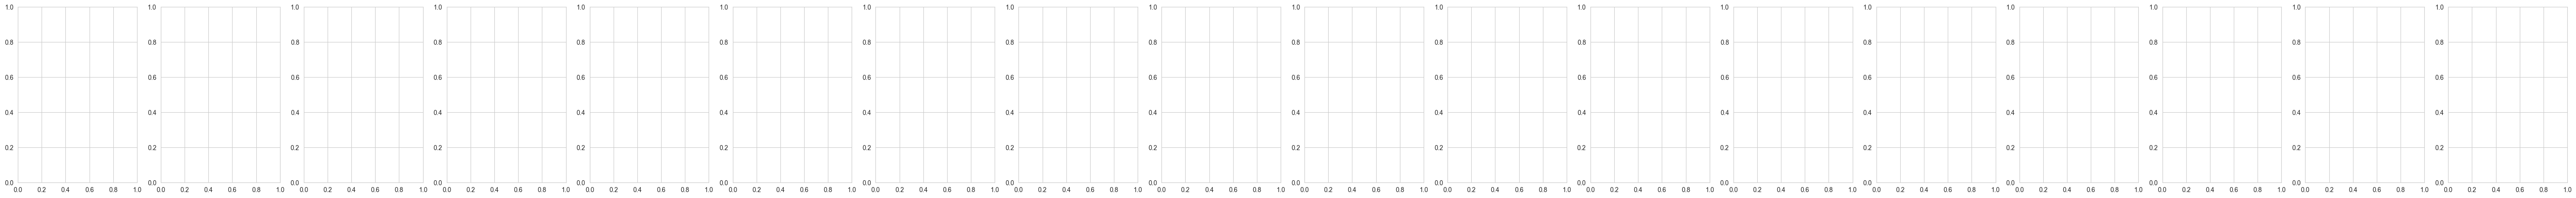

In [196]:
# Define font settings to ensure proper text export
matplotlib.rcParams['pdf.fonttype'] = 42  # Ensures text is saved as text, not outlines
matplotlib.rcParams['ps.fonttype'] = 42  # Same for PostScript output
matplotlib.rcParams['font.sans-serif'] = ['Arial']  # Use Arial or a font available on your system


# Define the folder name to save the plots
output_folder = "/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2024_Dec_Figs_Reubmission/Boxplots_Mus_KO_KI_invivo"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)


# Example of creating a combined conditions column
Key_RSEM_Mus_All['Combined_Condition'] = (
    Key_RSEM_Mus_All['flow'] + ' and ' + 
    Key_RSEM_Mus_All['source'] + ' and ' + 
    Key_RSEM_Mus_All['treatment'] + ' and ' + 
    Key_RSEM_Mus_All['genotype']
)

# Define the conditions you want to keep
conditions_to_keep = [
    'normalflow and brain and none and wt',
    'normalflow and brain and none and Tardbp_KI',
    'normalflow and brain and none and Tardbp_KO',
#    'invitroflow_low and brain and none and wt', 
#    'invitroflow_low and brain and none and Tardbp_KO',
#    'invitroflow_high and brain and none and wt',
#    'invitroflow_high and brain and none and Tardbp_KO',
#    'static and brain and none and wt'
#    'static and brain and none and Tardbp_KO'
]

# Filter the Key_RSEM_Mus_All DataFrame
filtered_key = Key_RSEM_Mus_All[Key_RSEM_Mus_All['Combined_Condition'].isin(conditions_to_keep)]

# Get the matching column names
matching_columns = filtered_key['Column'].tolist()

# List of genes to plot
genes_to_plot = ['Cd59a','Mt2','Pcbd2','Api5','Lgmn','Sprn','Ly6c1','Cd109','Cd38','Exoc3','Atg9b','Batf','Thbd','Stx4a','Mknk1','Cxcr4','Klf2','St6galnac2']  # Replace with your actual gene names

# Create subplots for each gene, arranged side by side
n_genes = len(genes_to_plot)
fig, axes = plt.subplots(1, n_genes, figsize=(n_genes * 4, 5))

# Define the order for the conditions
condition_order = [
    'normalflow and brain and none and wt',
    'normalflow and brain and none and Tardbp_KI',
    'normalflow and brain and none and Tardbp_KO',
    # Add other conditions if needed
]





# Iterate through each gene and save its plot
for gene in genes_to_plot:
    fig, ax = plt.subplots(figsize=(6, 5))

    # Get all rows for the specific gene
    specific_gene_data = FPKM_Mouse_All_deduplicated.loc[gene, matching_columns]
    
    # Convert to DataFrame to iterate through the rows (if it's a Series)
    specific_gene_df = specific_gene_data.reset_index()
    specific_gene_df.columns = ['Condition', 'Count']  # Rename columns for clarity

    # Update the Condition names to the Combined Conditions
    specific_gene_df['Condition'] = specific_gene_df['Condition'].map(
        {old: new for old, new in zip(filtered_key['Column'], filtered_key['Combined_Condition'])}
    )

    # Create boxplot for the specific gene with ordered conditions
    sns.boxplot(x='Condition', y='Count', data=specific_gene_df, 
                order=condition_order, color='lightgray', fliersize=0, ax=ax)
    
    # Create a colored stripplot for the specific gene
    sns.stripplot(x='Condition', y='Count', data=specific_gene_df, 
                  hue='Condition', palette=condition_color_mapping, 
                  alpha=0.5, jitter=True, ax=ax, dodge=True, order=condition_order)

    # Set y-axis limits from 0 to max for the specific gene
    ax.set_ylim(0, specific_gene_df['Count'].max() * 1.1)  # 10% above max for better visibility
    
    # Add title and labels for the plot
    ax.set_title(f'Box and Whisker Plot for {gene}', fontsize=14)
    ax.set_ylabel('FPKM', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-tick labels
    ax.grid(True)

    # Remove x-tick labels for cleaner look
    ax.set_xticklabels([])

    # Save the figure
    output_path = os.path.join(output_folder, f"{gene}_Boxplot.pdf")
    plt.savefig(output_path, bbox_inches='tight')
    plt.close(fig)  # Close the figure to save memory

print(f"Plots have been saved to the folder: {output_folder}")
